In [258]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
from ta.momentum import rsi
import pyodbc
import quantstats as qs
from Rolling_Functions_Final import * 

## Test for Seasonality

In [29]:
df = Rolling.get_data(['512890', '159967'])
df_seasonal_return = Rolling.single_window_table(df,[60], 2)
df_seasonal_return = df_seasonal_return.iloc[63:,:] 

Here at starting from the longest period


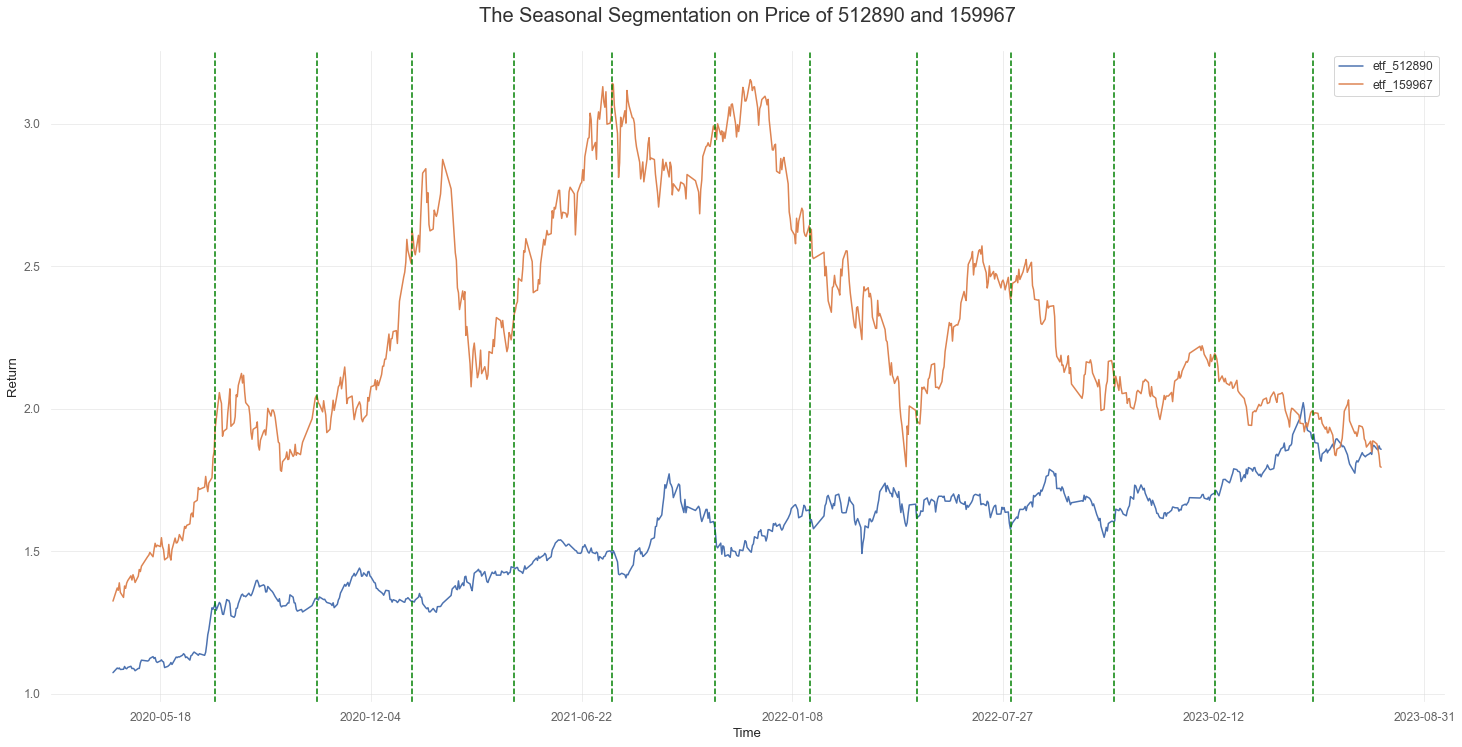

In [174]:
_ = plt.figure(figsize=(25, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(df_seasonal_return['etf_512890'].index),df_seasonal_return['etf_512890'].values)
_ = plt.plot(np.array(df_seasonal_return['etf_159967'].index),df_seasonal_return['etf_159967'] .values)

_ = plt.legend(['etf_512890', 'etf_159967']) 

for i in range(63, len(df_seasonal_return), 63):
    plt.axvline(x=df_seasonal_return.index[i], color='green', linestyle='--')

plt.title('The Seasonal Segmentation on Price of 512890 and 159967\n', fontsize=20)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))

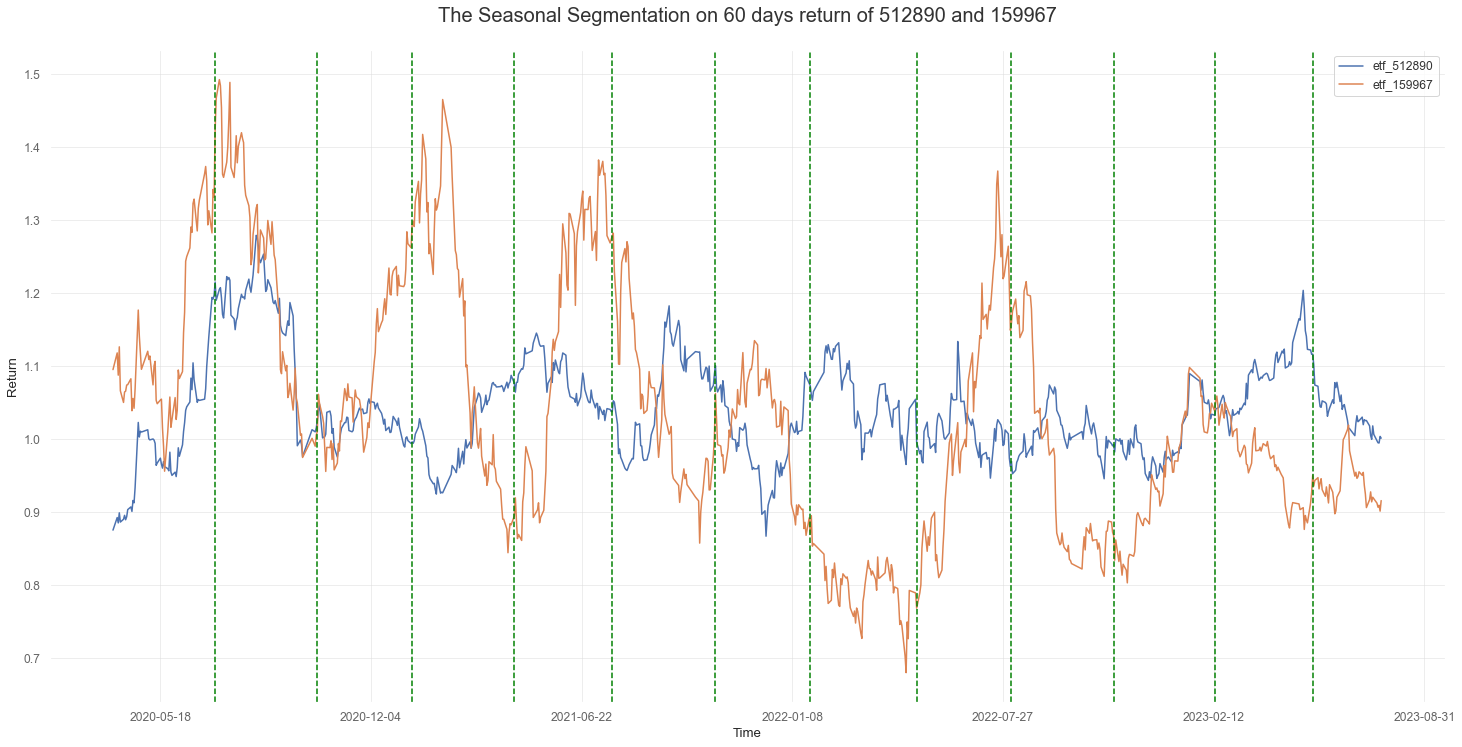

In [173]:
df_seasonal_return = df_seasonal_return.iloc[59:,:]

_ = plt.figure(figsize=(25, 12))
plt.xlabel('Time') 
plt.ylabel('Return')
plt.title('The Seasonal Segmentation on 60 days return of 512890 and 159967\n', fontsize=20)

_ = plt.plot(np.array(df_seasonal_return['etf_512890_day_return_60'].index),df_seasonal_return['etf_512890_day_return_60'].values)
_ = plt.plot(np.array(df_seasonal_return['etf_159967_day_return_60'].index),df_seasonal_return['etf_159967_day_return_60'] .values)

_ = plt.legend(['etf_512890', 'etf_159967']) 

for i in range(63, len(df_seasonal_return), 63):
    plt.axvline(x=df_seasonal_return.index[i], color='green', linestyle='--')


ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))

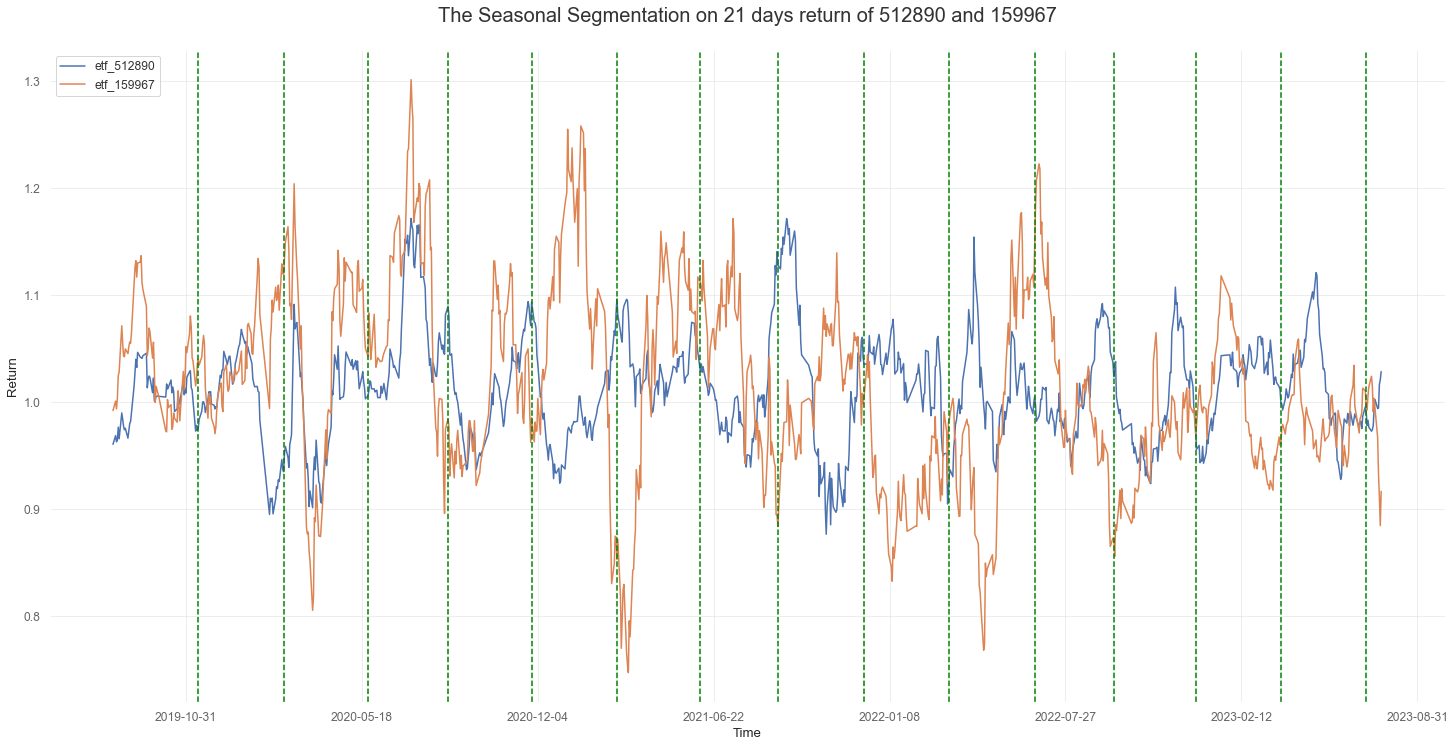

In [176]:
df_21 = Rolling.single_window_table(df,[21], 2)
df_21 = df_21.iloc[122:,:]

_ = plt.figure(figsize=(25, 12))
plt.xlabel('Time') 
plt.ylabel('Return')
plt.title('The Seasonal Segmentation on 21 days return of 512890 and 159967\n', fontsize=20)

_ = plt.plot(np.array(df_21['etf_512890_day_return_21'].index),df_21['etf_512890_day_return_21'].values)
_ = plt.plot(np.array(df_21['etf_159967_day_return_21'].index),df_21['etf_159967_day_return_21'] .values)

_ = plt.legend(['etf_512890', 'etf_159967']) 

for i in range(63, len(df_21), 63):
    plt.axvline(x=df_21.index[i], color='green', linestyle='--')


ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))

## -

## - 

## -

## Change an approach

In [1267]:
df = Rolling.get_data(['512890', '159967'])
new_df = df.iloc[3:,:]

## Dissect the DataFrame into different years
new_df_2019 = new_df.iloc[:238,:]
new_df_2020 = new_df.iloc[238:481,:]
new_df_2021 = new_df.iloc[481:724,:]
new_df_2022 = new_df.iloc[724:967,:]
new_df_2023 = new_df.iloc[967:,:]

Here at starting from the longest period


In [455]:
len(new_df_2019), len(new_df_2020), len(new_df_2021), len(new_df_2022)

(238, 243, 243, 243)

In [456]:
def compute_seasonal_return(list_of_dfs, step_num):
    quarter_divider = {1:[], 2:[], 3:[], 4:[]}
    etf_512890 = []
    etf_159967 = []
    for subject in list_of_dfs: 
        print('\n')
        print(f'_____________________Year of {str(subject.index[0])[:4]}_________________________')
        for i, date in enumerate(range(0, len(subject), step_num)):
            print('\n')
            if date+step_num > len(subject):
                sample_df = subject.iloc[date:,:]
                quarter_divider[i+1].append(sample_df.index)
                print(f'For {str(subject.index[date])[:4]} {i+1}th quarter, between {str(subject.index[date])[:10]} and {str(subject.index[len(subject)-1])[:10]}')
            else:
                sample_df = subject.iloc[date:date+step_num,:]
                quarter_divider[i+1].append(sample_df.index)
                print(f'For {str(subject.index[date])[:4]} {i+1}th quarter, between {str(subject.index[date])[:10]} and {str(subject.index[date+step_num])[:10]}')
            for i in range(int(len(subject.columns)/2)):
                target = sample_df.iloc[:,i]/sample_df.iloc[:,i][0]
                result = round(target[-1]/target[0],4)
                print(f'We have the return of {subject.columns[i]} as: {result}')
                if i == 0:
                    etf_512890.append(result)
                if i == 1:
                    etf_159967.append(result)
    return quarter_divider, etf_512890, etf_159967

In [457]:
list_of_dfs = [new_df_2019, new_df_2020, new_df_2021, new_df_2022, new_df_2023]
step_num = 63 ## The amount of trading days in one quarter

quarter_divider, etf_512890, etf_159967 = compute_seasonal_return(list_of_dfs, step_num)



_____________________Year of 2019_________________________


For 2019 1th quarter, between 2019-01-04 and 2019-04-18
We have the return of etf_512890 as: 1.226
We have the return of etf_159967 as: nan


For 2019 2th quarter, between 2019-04-18 and 2019-07-19
We have the return of etf_512890 as: 0.9292
We have the return of etf_159967 as: nan


For 2019 3th quarter, between 2019-07-19 and 2019-10-24
We have the return of etf_512890 as: 1.0004
We have the return of etf_159967 as: 1.1008


For 2019 4th quarter, between 2019-10-24 and 2019-12-31
We have the return of etf_512890 as: 1.0622
We have the return of etf_159967 as: 1.0573


_____________________Year of 2020_________________________


For 2020 1th quarter, between 2020-01-02 and 2020-04-09
We have the return of etf_512890 as: 0.8853
We have the return of etf_159967 as: 1.1178


For 2020 2th quarter, between 2020-04-09 and 2020-07-14
We have the return of etf_512890 as: 1.2111
We have the return of etf_159967 as: 1.4807


For 202

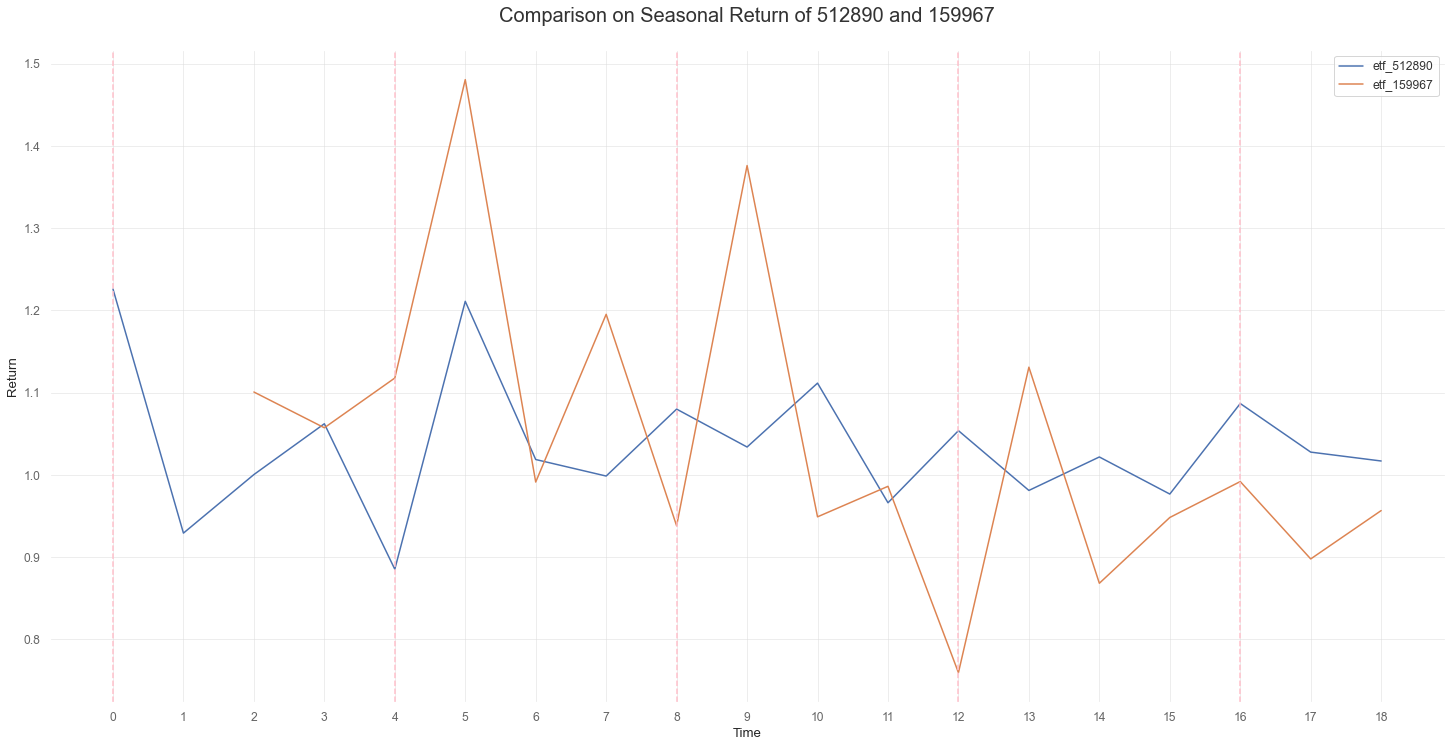

In [458]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have defined etf_512890, etf_159967, and custom_labels

plt.figure(figsize=(25, 12))
plt.xlabel('Time') 
plt.ylabel('Return')
plt.title('Comparison on Seasonal Return of 512890 and 159967\n', fontsize=20)

plot_df = pd.DataFrame()
plot_df['etf_512890'] = etf_512890
plot_df['etf_159967'] = etf_159967
# plot_df['custom_labels'] = custom_labels
# plot_df.set_index('custom_labels', inplace=True)

# Plot the data using numerical index for x-axis values
plt.plot(range(len(plot_df)), plot_df['etf_512890'].values)
plt.plot(range(len(plot_df)), plot_df['etf_159967'].values)

# Set custom labels for x-axis tick marks
plt.xticks(range(len(plot_df)), plot_df.index)

plt.legend(['etf_512890', 'etf_159967']) 

for i in range(0, len(plot_df), 4):
    plt.axvline(x=i, color='pink', linestyle='--')

ax = plt.gca()
# ax.xaxis.set_major_locator(ticker.MultipleLocator(200))

plt.show()


## - 

## -

## -  

## New Rolling Strategy on Seasonality

In [459]:
df = Rolling.get_data(['512890', '159967'])
new_df = df.iloc[3:,:]

Here at starting from the longest period


In [460]:
list_of_dfs = [new_df_2019, new_df_2020, new_df_2021, new_df_2022, new_df_2023]
step_num = 63 ## The amount of trading days in one quarter

quarter_divider, etf_512890, etf_159967 = compute_seasonal_return(list_of_dfs, step_num)



_____________________Year of 2019_________________________


For 2019 1th quarter, between 2019-01-04 and 2019-04-18
We have the return of etf_512890 as: 1.226
We have the return of etf_159967 as: nan


For 2019 2th quarter, between 2019-04-18 and 2019-07-19
We have the return of etf_512890 as: 0.9292
We have the return of etf_159967 as: nan


For 2019 3th quarter, between 2019-07-19 and 2019-10-24
We have the return of etf_512890 as: 1.0004
We have the return of etf_159967 as: 1.1008


For 2019 4th quarter, between 2019-10-24 and 2019-12-31
We have the return of etf_512890 as: 1.0622
We have the return of etf_159967 as: 1.0573


_____________________Year of 2020_________________________


For 2020 1th quarter, between 2020-01-02 and 2020-04-09
We have the return of etf_512890 as: 0.8853
We have the return of etf_159967 as: 1.1178


For 2020 2th quarter, between 2020-04-09 and 2020-07-14
We have the return of etf_512890 as: 1.2111
We have the return of etf_159967 as: 1.4807


For 202

In [1454]:
column_name  = ['Seasonal_Return', 'signal_512890', 'signal_159967']
seasonal_df = pd.DataFrame(columns=column_name)

target_num = 2
position_change = []

for i in range(len(quarter_divider[1])):
    for key, value in quarter_divider.items():
        try:
            target_index = quarter_divider[key][i]
            position_change.append(quarter_divider[key][i][0])
        
        except IndexError:
        ## Deal with senario when 2023 does not have its full Q3 and Q4 info
            continue
        target_df = pd.DataFrame(index = target_index, columns=column_name)
        # Fill the DataFrame with 0 values
        target_df.fillna(0, inplace=True)
        target_df['Seasonal_Return'] = [0]*len(target_df)
        target_df['signal_512890'] = [0]*len(target_df)
        target_df['signal_159967'] = [0]*len(target_df)
        if key == 1 or key == 3:
            target_df['Seasonal_Return'] = new_df.loc[target_index].iloc[:,2]
            target_df['signal_512890']  = [1]*len(target_df)

        else:
            target_df['Seasonal_Return'] = new_df.loc[target_index].iloc[:,3]
            target_df['signal_159967'] = [1]*len(target_df)
        seasonal_df = pd.concat([seasonal_df, target_df], axis=0)


seasonal_df['arr'] = seasonal_df['Seasonal_Return'] + 1
#-----------------------modified------------------------------------#
## Minus seasonal position change trasnsaction cost

# for row_time in [51, 112, 157, 238, 296, 355, 421, 481, 539, 599, 662, 723, 1025, 1083]:
#     seasonal_df.loc[seasonal_df.index[row_time], 'arr'] -= 0.003

seasonal_df[f'Seasonal_result'] = np.cumprod(seasonal_df['arr'], axis=0)*100
seasonal_df[f'Seasonal_result'] = (100/seasonal_df[f'Seasonal_result'].values[0]) * seasonal_df[f'Seasonal_result'] 



In [1446]:
seasonal_df

Seasonal_Return signal_512890 signal_159967       arr  \
2019-01-04         0.000800             1             0  1.000800   
2019-01-10         0.000100             1             0  1.000100   
2019-01-11         0.000200             1             0  1.000200   
2019-01-17        -0.000500             1             0  0.999500   
2019-01-18         0.004698             1             0  1.004698   
...                     ...           ...           ...       ...   
2023-08-03         0.001460             1             0  1.001460   
2023-08-04         0.001770             1             0  1.001770   
2023-08-07        -0.006443             1             0  0.993557   
2023-08-08        -0.000523             1             0  0.999477   
2023-08-09        -0.006593             1             0  0.993407   

            Seasonal_result  
2019-01-04       100.000000  
2019-01-10       100.009994  
2019-01-11       100.029982  
2019-01-17        99.980012  
2019-01-18       100.449730  
...                     ...  
2023-08-03       415.931332  
2023-08-04       416.667418  
2023-08-07       413.982872  
2023-08-08       413.766377  
2023-08-09       411.038532  

[1113 rows x 5 columns]

In [1447]:
DataFrame = seasonal_df
position_num1 = 1
position_num2 = 3


if position_num1 < 100 and position_num2 < 100:
    position_count_df = DataFrame.iloc[:,position_num1:position_num2]
    DataFrame['position_change'] = position_count_df.diff().abs().sum(axis=1)
    DataFrame['position_change'] = DataFrame['position_change']/2
    count = DataFrame['position_change'].sum()
    print(f'This strategy changes {int(count/len(DataFrame)*252)} positions annually and the total Position change is {count}')

This strategy changes 4 positions annually and the total Position change is 18.0


In [1451]:
mask = DataFrame['position_change'] != 0
fees_days = DataFrame.loc[mask].index
for row_time in fees_days:
            DataFrame.loc[row_time, 'arr'] -= 0.003

In [1452]:
DataFrame['new'] = np.cumprod(DataFrame['arr'], axis=0)*100
DataFrame['new'] = (100/DataFrame['new'].values[0]) * DataFrame['new'] 

In [1453]:
DataFrame

Seasonal_Return signal_512890 signal_159967       arr  \
2019-01-04         0.000800             1             0  1.000800   
2019-01-10         0.000100             1             0  1.000100   
2019-01-11         0.000200             1             0  1.000200   
2019-01-17        -0.000500             1             0  0.999500   
2019-01-18         0.004698             1             0  1.004698   
...                     ...           ...           ...       ...   
2023-08-03         0.001460             1             0  1.001460   
2023-08-04         0.001770             1             0  1.001770   
2023-08-07        -0.006443             1             0  0.993557   
2023-08-08        -0.000523             1             0  0.999477   
2023-08-09        -0.006593             1             0  0.993407   

            Seasonal_result position_change         new  
2019-01-04       100.000000             0.0  100.000000  
2019-01-10       100.009994             0.0  100.009994  
2019-01-11       100.029982             0.0  100.029982  
2019-01-17        99.980012             0.0   99.980012  
2019-01-18       100.449730             0.0  100.449730  
...                     ...             ...         ...  
2023-08-03       415.931332             0.0  395.279959  
2023-08-04       416.667418             0.0  395.979497  
2023-08-07       413.982872             0.0  393.428242  
2023-08-08       413.766377             0.0  393.222496  
2023-08-09       411.038532             0.0  390.630091  

[1113 rows x 7 columns]

In [2078]:
def position_change_count(DataFrame, position_num1, position_num2, modified_arr_name, return_column_name):
    if position_num1 < 100 and position_num2 < 100:
        position_count_df = DataFrame.iloc[:,position_num1:position_num2]
        DataFrame['position_change'] = position_count_df.diff().abs().sum(axis=1)
        DataFrame['position_change'] = DataFrame['position_change']/2
        count = DataFrame['position_change'].sum()
        print(f'This strategy changes {int(count/len(DataFrame)*252)} positions annually and the total Position change is {count}')
        mask = DataFrame['position_change'] != 0
        fees_days = DataFrame.loc[mask].index
        for row_time in fees_days:
            DataFrame.loc[row_time, modified_arr_name] -= 0.003

        DataFrame[return_column_name] = np.cumprod(DataFrame[modified_arr_name], axis=0)*100
        DataFrame[return_column_name] = (100/DataFrame[return_column_name].values[0]) * DataFrame[return_column_name] 

    final_return = DataFrame[return_column_name][-1]
    annual_return = 100*((final_return/100)**(1/(len(DataFrame)/252))-1)
    print(f'The final return after fees is {round(final_return,2)}% which is {round(annual_return,2)}% annually')
    print(f'Additional return: {round(final_return-110,2)}%')
    print(f'Additional annual return: {round(annual_return-3.89,2)}%')

    DataFrame['Previous_Peak'] = DataFrame[return_column_name].cummax()
    DataFrame['Drawdown'] = DataFrame[return_column_name] / DataFrame['Previous_Peak'] - 1
    max_drawdown = round(DataFrame['Drawdown'].min(),4)
    print(f'Max Drawdown: {round(100*max_drawdown,4)}%')
    annualized_volatility = np.sqrt(252) * DataFrame[modified_arr_name].std()
    print(f'Annualized Volatility: {100*round(annualized_volatility,2)}%')
    print(f'Sharpe: {round(Test.get_Sharpe(DataFrame, return_column_name),4)}')
    print(f'Win Rate: {round(100*round(len(DataFrame.loc[DataFrame[modified_arr_name]>1])/len(DataFrame),4),4)}%\n')
    return DataFrame

In [1416]:
target_df.fillna(0, inplace=True)
target_df

Seasonal_Return  signal_512890  signal_159967
EndDate                                                  
2023-07-13         0.014895              1            0.0
2023-07-14         0.002357              1            0.0
2023-07-17        -0.006947              1            0.0
2023-07-18        -0.001722              1            0.0
2023-07-19         0.007762              1            0.0
2023-07-20        -0.005670              1            0.0
2023-07-21        -0.000646              1            0.0
2023-07-24         0.000754              1            0.0
2023-07-25         0.018610              1            0.0
2023-07-26        -0.002007              1            0.0
2023-07-27         0.001905              1            0.0
2023-07-28         0.015526              1            0.0
2023-07-31         0.008736              1            0.0
2023-08-01         0.002268              1            0.0
2023-08-02        -0.013270              1            0.0
2023-08-03         0.001460              1            0.0
2023-08-04         0.001770              1            0.0
2023-08-07        -0.006443              1            0.0
2023-08-08        -0.000523              1            0.0
2023-08-09        -0.006593              1            0.0

In [1377]:
seasonal_df.index

DatetimeIndex(['2019-01-04', '2019-01-10', '2019-01-11', '2019-01-17',
               '2019-01-18', '2019-01-21', '2019-01-22', '2019-01-23',
               '2019-01-24', '2019-01-25',
               ...
               '2023-07-27', '2023-07-28', '2023-07-31', '2023-08-01',
               '2023-08-02', '2023-08-03', '2023-08-04', '2023-08-07',
               '2023-08-08', '2023-08-09'],
              dtype='datetime64[ns]', length=1113, freq=None)

In [1120]:
seasonal_df = seasonal_df.iloc[122:,:]

In [1121]:
seasonal_df[f'Seasonal_result'] = (100/seasonal_df[f'Seasonal_result'].values[0]) * seasonal_df[f'Seasonal_result']
seasonal_df

Seasonal_Return       arr  Seasonal_result
2019-07-15         0.009012  1.009012       100.000000
2019-07-16        -0.001344  0.998656        99.865553
2019-07-17         0.000577  1.000577        99.923173
2019-07-18        -0.015762  0.984238        98.348219
2019-07-19         0.010713  1.010713        99.401794
...                     ...       ...              ...
2023-08-03         0.001460  1.001460       318.446788
2023-08-04         0.001770  1.001770       319.010352
2023-08-07        -0.006443  0.993557       316.955001
2023-08-08        -0.000523  0.999477       316.789247
2023-08-09        -0.006593  0.993407       314.700745

[991 rows x 3 columns]

In [1122]:
Test.get_Sharpe(seasonal_df, 'Seasonal_result')

1.3799147044045603

### Starting from the same beginning

In [464]:
seasonal_df = seasonal_df.iloc[122:,:]
seasonal_df[f'Seasonal_result'] = (100/seasonal_df[f'Seasonal_result'].values[0]) * seasonal_df[f'Seasonal_result'] 

df_21 = df_21.iloc[103:,:]
df_21[f'signal_return_21'] = (100/df_21[f'signal_return_21'].values[0]) * df_21[f'signal_return_21'] 

In [465]:
data_plot = df_21.copy()
data_plot['etf_512890_return'] = data_plot['etf_512890']*(100/data_plot.loc[:,"etf_512890"][0])
data_plot['etf_159967_return'] = data_plot['etf_159967']*(100/data_plot.loc[:,"etf_159967"][0])

In [466]:
round(Test.get_Sharpe(data_plot, "etf_159967_return"),4)

0.3438

In [581]:
df_21[f'adj_signal_return_21'] = (100/df_21[f'adj_signal_return_21'].values[0]) * df_21[f'adj_signal_return_21'] 

In [588]:
data_plot = df_21[['etf_512890_day_return', 'etf_159967_day_return']]

data_plot['etf_512890_return'] = np.cumprod(data_plot['etf_512890_day_return']+1, axis=0)*100
data_plot['etf_512890_return'] = data_plot['etf_512890_return']/data_plot['etf_512890_return'][0]*100

data_plot['etf_159967_return'] = np.cumprod(data_plot['etf_159967_day_return']+1, axis=0)*100
data_plot['etf_159967_return'] = data_plot['etf_159967_return']/data_plot['etf_159967_return'][0]*100

In [589]:
data_plot

etf_512890_day_return  etf_159967_day_return  etf_512890_return  \
EndDate                                                                       
2019-07-15               0.002644               0.009012         100.000000   
2019-07-16               0.001055              -0.001344         100.105467   
2019-07-17               0.000088               0.000577         100.114256   
2019-07-18              -0.008428              -0.015762          99.270522   
2019-07-19               0.010713               0.010643         100.333978   
...                           ...                    ...                ...   
2023-08-03               0.001460               0.002224         168.852171   
2023-08-04               0.001770               0.022191         169.150993   
2023-08-07              -0.006443              -0.004939         168.061171   
2023-08-08              -0.000523              -0.007363         167.973282   
2023-08-09              -0.006593              -0.008187         166.865882   

            etf_159967_return  
EndDate                        
2019-07-15         100.000000  
2019-07-16          99.865553  
2019-07-17          99.923173  
2019-07-18          98.348219  
2019-07-19          99.394987  
...                       ...  
2023-08-03         173.100932  
2023-08-04         176.942284  
2023-08-07         176.068376  
2023-08-08         174.771920  
2023-08-09         173.341016  

[991 rows x 4 columns]

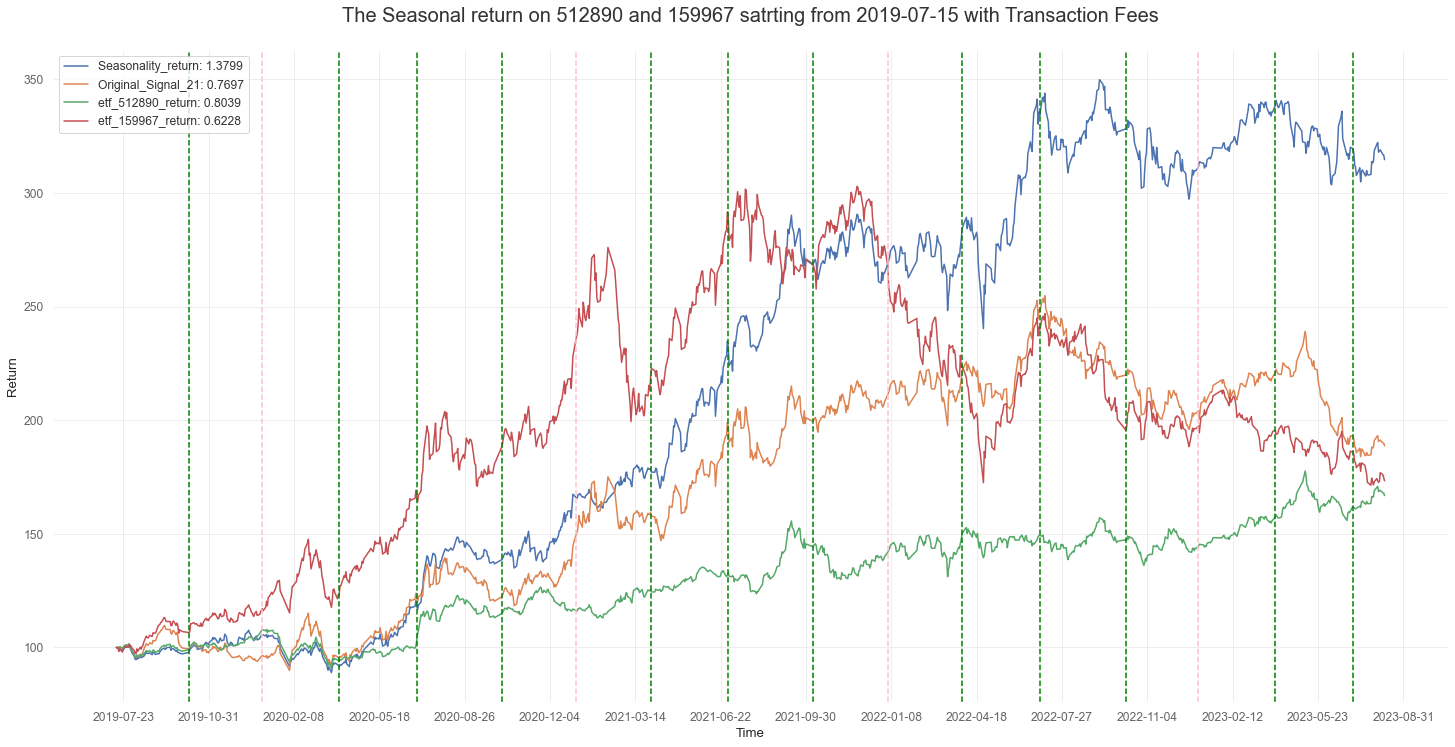

In [1123]:
_ = plt.figure(figsize=(25, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(seasonal_df['Seasonal_result'].index),seasonal_df['Seasonal_result'].values)
_ = plt.plot(np.array(df_21['adj_signal_return_21'].index),df_21['adj_signal_return_21'] .values)
_ = plt.plot(np.array(data_plot['etf_512890_return'].index),data_plot['etf_512890_return'] .values)
_ = plt.plot(np.array(data_plot['etf_159967_return'].index),data_plot['etf_159967_return'] .values)

# _ = plt.legend([f'Seasonality_return: {round(Test.get_Sharpe(seasonal_df, "Seasonal_result"),4)}', 
#                 f'Original_Signal_21: {round(Test.get_Sharpe(df_21, "adj_signal_return_21"),4)}', 
#                 f'etf_512890_return: {round(Test.get_Sharpe(data_plot, "etf_512890_return"),4)}', 
#                 f'etf_159967_return: {round(Test.get_Sharpe(data_plot, "etf_159967_return"),4)}']) 

_ = plt.legend([f'Seasonality_return: {round(Test.get_Sharpe(seasonal_df, "Seasonal_result"),4)}', 
                f'Original_Signal_21: {round(Test.get_Sharpe(df_21, "adj_signal_return_21"),4)}', 
                f'etf_512890_return: 0.8039', 
                f'etf_159967_return: 0.6228']) 


for i in [116, 359, 602, 845]:
    plt.axvline(x=seasonal_df.index[i], color='pink', linestyle='--')
for i in [55, 174, 233, 299, 417, 477, 541, 660, 719, 784, 904, 963]:
    plt.axvline(x=seasonal_df.index[i], color='green', linestyle='--')


plt.title('The Seasonal return on 512890 and 159967 satrting from 2019-07-15 with Transaction Fees\n', fontsize=20)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

## 50 / 50 Treat

In [599]:
seasonal_df

Seasonal_Return       arr  Seasonal_result  Previous_Peak  \
2019-07-15         0.009012  1.009012       100.000000     100.000000   
2019-07-16        -0.001344  0.998656        99.865553     100.000000   
2019-07-17         0.000577  1.000577        99.923173     100.000000   
2019-07-18        -0.015762  0.984238        98.348219     100.000000   
2019-07-19         0.010713  1.010713        99.401794     100.000000   
...                     ...       ...              ...            ...   
2023-08-03         0.001460  1.001460       307.165420     339.556296   
2023-08-04         0.001770  1.001770       307.709019     339.556296   
2023-08-07        -0.006443  0.993557       305.726482     339.556296   
2023-08-08        -0.000523  0.999477       305.566600     339.556296   
2023-08-09        -0.006593  0.993407       303.552086     339.556296   

            Drawdown      arr1   arr_avg  Seasonal_result_avg  
2019-07-15  0.000000  1.002644  1.005828           100.000000  
2019-07-16 -0.001344  1.001055  0.999855            99.985510  
2019-07-17 -0.000768  1.000088  1.000332           100.018744  
2019-07-18 -0.016518  0.991572  0.987905            98.809049  
2019-07-19 -0.005982  1.010713  1.010713            99.867561  
...              ...       ...       ...                  ...  
2023-08-03 -0.095392  1.001460  1.001460           272.198149  
2023-08-04 -0.093791  1.001770  1.001770           272.679866  
2023-08-07 -0.099629  0.993557  0.993557           270.923017  
2023-08-08 -0.100100  0.999477  0.999477           270.781336  
2023-08-09 -0.106033  0.993407  0.993407           268.996151  

[991 rows x 8 columns]

In [597]:
seasonal_df['arr1'] = df_21['arr']
seasonal_df['arr_avg'] = (seasonal_df['arr'] + seasonal_df['arr1']) *(1/2)
seasonal_df['Seasonal_result_avg'] = np.cumprod(seasonal_df['arr_avg'], axis=0)*100
seasonal_df['Seasonal_result_avg'] = (100/seasonal_df['Seasonal_result_avg'].values[0]) * seasonal_df['Seasonal_result_avg'] 

In [600]:
Test.get_Sharpe(seasonal_df, 'Seasonal_result_avg')

1.2407332354127316

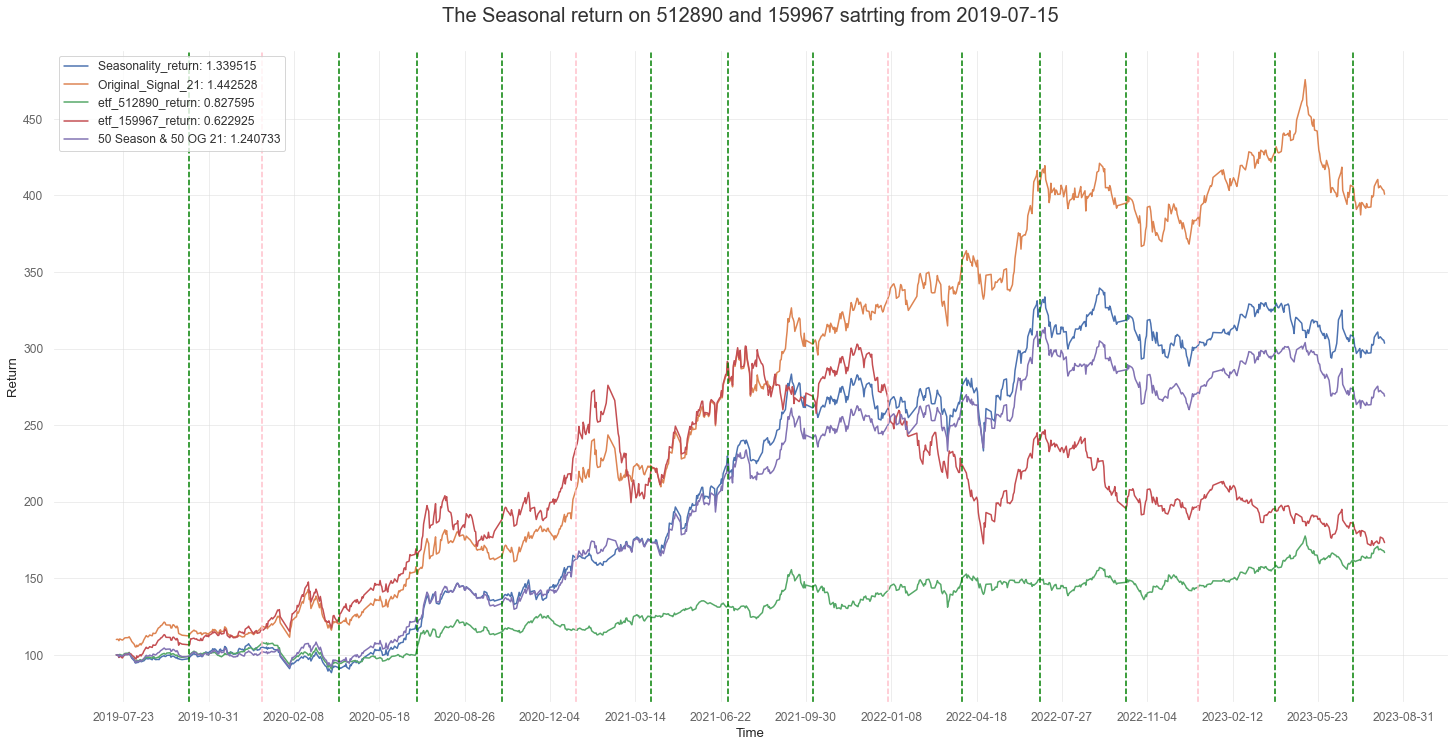

In [601]:
_ = plt.figure(figsize=(25, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(seasonal_df['Seasonal_result'].index),seasonal_df['Seasonal_result'].values)
_ = plt.plot(np.array(df_21['signal_return_21'].index),df_21['signal_return_21'] .values)
_ = plt.plot(np.array(data_plot['etf_512890_return'].index),data_plot['etf_512890_return'] .values)
_ = plt.plot(np.array(data_plot['etf_159967_return'].index),data_plot['etf_159967_return'] .values)
_ = plt.plot(np.array(seasonal_df['Seasonal_result_avg'].index),seasonal_df['Seasonal_result_avg'].values)

_ = plt.legend([f'Seasonality_return: {round(Test.get_Sharpe(seasonal_df, "Seasonal_result"),6)}', 
                f'Original_Signal_21: {round(Test.get_Sharpe(df_21, "signal_return_21"),6)}', 
                f'etf_512890_return: {round(Test.get_Sharpe(data_plot, "etf_512890_return"),6)}', 
                f'etf_159967_return: {round(Test.get_Sharpe(data_plot, "etf_159967_return"),6)}',
                f'50 Season & 50 OG 21: {round(Test.get_Sharpe(seasonal_df, "Seasonal_result_avg"),6)}']) 


for i in [116, 359, 602, 845]:
    plt.axvline(x=seasonal_df.index[i], color='pink', linestyle='--')
for i in [55, 174, 233, 299, 417, 477, 541, 660, 719, 784, 904, 963]:
    plt.axvline(x=seasonal_df.index[i], color='green', linestyle='--')


plt.title('The Seasonal return on 512890 and 159967 satrting from 2019-07-15\n', fontsize=20)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

In [491]:
seasonal_df

Seasonal_Return       arr  Seasonal_result      arr1   arr_avg  \
2019-07-15         0.009012  1.009012       100.000000  1.002644  1.002644   
2019-07-16        -0.001344  0.998656        99.865553  1.001055  1.001055   
2019-07-17         0.000577  1.000577        99.923173  1.000088  1.000088   
2019-07-18        -0.015762  0.984238        98.348219  0.991572  0.991572   
2019-07-19         0.010713  1.010713        99.401794  1.010713  1.010713   
...                     ...       ...              ...       ...       ...   
2023-07-17        -0.006947  0.993053       319.316305  0.993053  0.993053   
2023-07-18        -0.001722  0.998278       318.766470  0.998278  0.998278   
2023-07-19         0.007762  1.007762       321.240725  1.007762  1.007762   
2023-07-20        -0.005670  0.994330       319.419399  0.994330  0.994330   
2023-07-21        -0.000646  0.999354       319.213211  0.999354  0.999354   

            Seasonal_result_avg  
2019-07-15           100.000000  
2019-07-16           100.105467  
2019-07-17           100.114256  
2019-07-18            99.270522  
2019-07-19           100.333978  
...                         ...  
2023-07-17           356.484907  
2023-07-18           355.871072  
2023-07-19           358.633331  
2023-07-20           356.600001  
2023-07-21           356.369813  

[978 rows x 6 columns]

In [487]:
df_21

etf_512890  etf_159967  etf_512890_day_return  \
EndDate                                                     
2019-07-15      1.1378      1.0413               0.002644   
2019-07-16      1.1390      1.0399               0.001055   
2019-07-17      1.1391      1.0405               0.000088   
2019-07-18      1.1295      1.0241              -0.008428   
2019-07-19      1.1416      1.0350               0.010713   
...                ...         ...                    ...   
2023-07-17      1.8584      1.8760              -0.006947   
2023-07-18      1.8552      1.8570              -0.001722   
2023-07-19      1.8696      1.8359               0.007762   
2023-07-20      1.8590      1.7970              -0.005670   
2023-07-21      1.8578      1.7948              -0.000646   

            etf_159967_day_return  etf_512890_day_return_21  \
EndDate                                                       
2019-07-15               0.009012                  1.031925   
2019-07-16              -0.001344                  1.020884   
2019-07-17               0.000577                  1.003701   
2019-07-18              -0.015762                  0.993229   
2019-07-19               0.010643                  1.003869   
...                           ...                       ...   
2023-07-17              -0.004986                  0.994222   
2023-07-18              -0.010128                  0.994745   
2023-07-19              -0.011362                  1.016971   
2023-07-20              -0.021189                  1.020980   
2023-07-21              -0.001224                  1.028796   

            etf_159967_day_return_21  signal_512890  signal_159967  \
EndDate                                                              
2019-07-15                       NaN            1.0            0.0   
2019-07-16                       NaN            1.0            0.0   
2019-07-17                       NaN            1.0            0.0   
2019-07-18                       NaN            1.0            0.0   
2019-07-19                       NaN            1.0            0.0   
...                              ...            ...            ...   
2023-07-17                  0.967010            1.0            0.0   
2023-07-18                  0.932557            1.0            0.0   
2023-07-19                  0.911162            1.0            0.0   
2023-07-20                  0.884829            1.0            0.0   
2023-07-21                  0.916884            1.0            0.0   

            signal_return_21       arr  
EndDate                                 
2019-07-15        100.000000  1.002644  
2019-07-16        100.105467  1.001055  
2019-07-17        100.114256  1.000088  
2019-07-18         99.270522  0.991572  
2019-07-19        100.333978  1.010713  
...                      ...       ...  
2023-07-17        356.484907  0.993053  
2023-07-18        355.871072  0.998278  
2023-07-19        358.633331  1.007762  
2023-07-20        356.600001  0.994330  
2023-07-21        356.369813  0.999354  

[978 rows x 10 columns]

##  - 

## - 

## -

## Test on longer period witn 510880 and 159915

In [616]:
## Get the return of using the OG_rolling_windows_21

df_longer = Rolling.get_data(['510880', '159915'])
df_longer_21 = Rolling.single_window_table(df_longer, [21], 2)

Here at starting from the longest period


In [ ]:
## Test the seasonal strategy
# ⼀三季度持有 510880，⼆四季度持有 159915，轮动策略




In [617]:
def compute_seasonal_return(list_of_dfs, step_num):
    quarter_divider = {1:[], 2:[], 3:[], 4:[]}
    etf_512890 = []
    etf_159967 = []
    for subject in list_of_dfs: 
        print('\n')
        print(f'_____________________Year of {str(subject.index[0])[:4]}_________________________')
        for i, date in enumerate(range(0, len(subject), step_num)):
            print('\n')
            if date+step_num > len(subject):
                sample_df = subject.iloc[date:,:]
                quarter_divider[i+1].append(sample_df.index)
                print(f'For {str(subject.index[date])[:4]} {i+1}th quarter, between {str(subject.index[date])[:10]} and {str(subject.index[len(subject)-1])[:10]}')
            else:
                sample_df = subject.iloc[date:date+step_num,:]
                quarter_divider[i+1].append(sample_df.index)
                print(f'For {str(subject.index[date])[:4]} {i+1}th quarter, between {str(subject.index[date])[:10]} and {str(subject.index[date+step_num])[:10]}')
            for i in range(int(len(subject.columns)/2)):
                target = sample_df.iloc[:,i]/sample_df.iloc[:,i][0]
                result = round(target[-1]/target[0],4)
                print(f'We have the return of {subject.columns[i]} as: {result}')
                if i == 0:
                    etf_512890.append(result)
                if i == 1:
                    etf_159967.append(result)
    return quarter_divider, etf_512890, etf_159967

In [618]:
df_longer_2007 = df_longer.iloc[3:249,:]
df_longer_2008 = df_longer.iloc[249:496,:]
df_longer_2009 = df_longer.iloc[496:740,:]
df_longer_2010 = df_longer.iloc[740:982,:]
df_longer_2011 = df_longer.iloc[982:1227,:]
df_longer_2012 = df_longer.iloc[1227:1473,:]
df_longer_2013 = df_longer.iloc[1473:1713,:]
df_longer_2014 = df_longer.iloc[1713:1958,:]
df_longer_2015 = df_longer.iloc[1958:2202,:]
df_longer_2016 = df_longer.iloc[2202:2447,:]
df_longer_2017 = df_longer.iloc[2447:2693,:]
df_longer_2018 = df_longer.iloc[2693:2940,:]
df_longer_2019 = df_longer.iloc[2940:3186,:]
df_longer_2020 = df_longer.iloc[3186:3429,:]
df_longer_2021 = df_longer.iloc[3429:3672,:]
df_longer_2022 = df_longer.iloc[3672:3915,:]
df_longer_2023 = df_longer.iloc[3915:,:]

In [619]:
list_of_dfs = [df_longer_2007, df_longer_2008, df_longer_2009, df_longer_2010, df_longer_2011,
               df_longer_2012, df_longer_2013, df_longer_2014, df_longer_2015, df_longer_2016,
               df_longer_2017, df_longer_2018, df_longer_2019, df_longer_2020, df_longer_2021,
               df_longer_2022, df_longer_2023]
step_num = 63 ## The amount of trading days in one quarter

quarter_divider, etf_510880, etf_159915 = compute_seasonal_return(list_of_dfs, step_num)



_____________________Year of 2007_________________________


For 2007 1th quarter, between 2007-01-05 and 2007-04-10
We have the return of etf_510880 as: 1.4337
We have the return of etf_159915 as: nan


For 2007 2th quarter, between 2007-04-10 and 2007-07-12
We have the return of etf_510880 as: 1.1504
We have the return of etf_159915 as: nan


For 2007 3th quarter, between 2007-07-12 and 2007-10-15
We have the return of etf_510880 as: 1.5403
We have the return of etf_159915 as: nan


For 2007 4th quarter, between 2007-10-15 and 2007-12-31
We have the return of etf_510880 as: 1.3604
We have the return of etf_159915 as: nan


_____________________Year of 2008_________________________


For 2008 1th quarter, between 2008-01-02 and 2008-04-08
We have the return of etf_510880 as: 0.6716
We have the return of etf_159915 as: nan


For 2008 2th quarter, between 2008-04-08 and 2008-07-09
We have the return of etf_510880 as: 0.7675
We have the return of etf_159915 as: nan


For 2008 3th quart

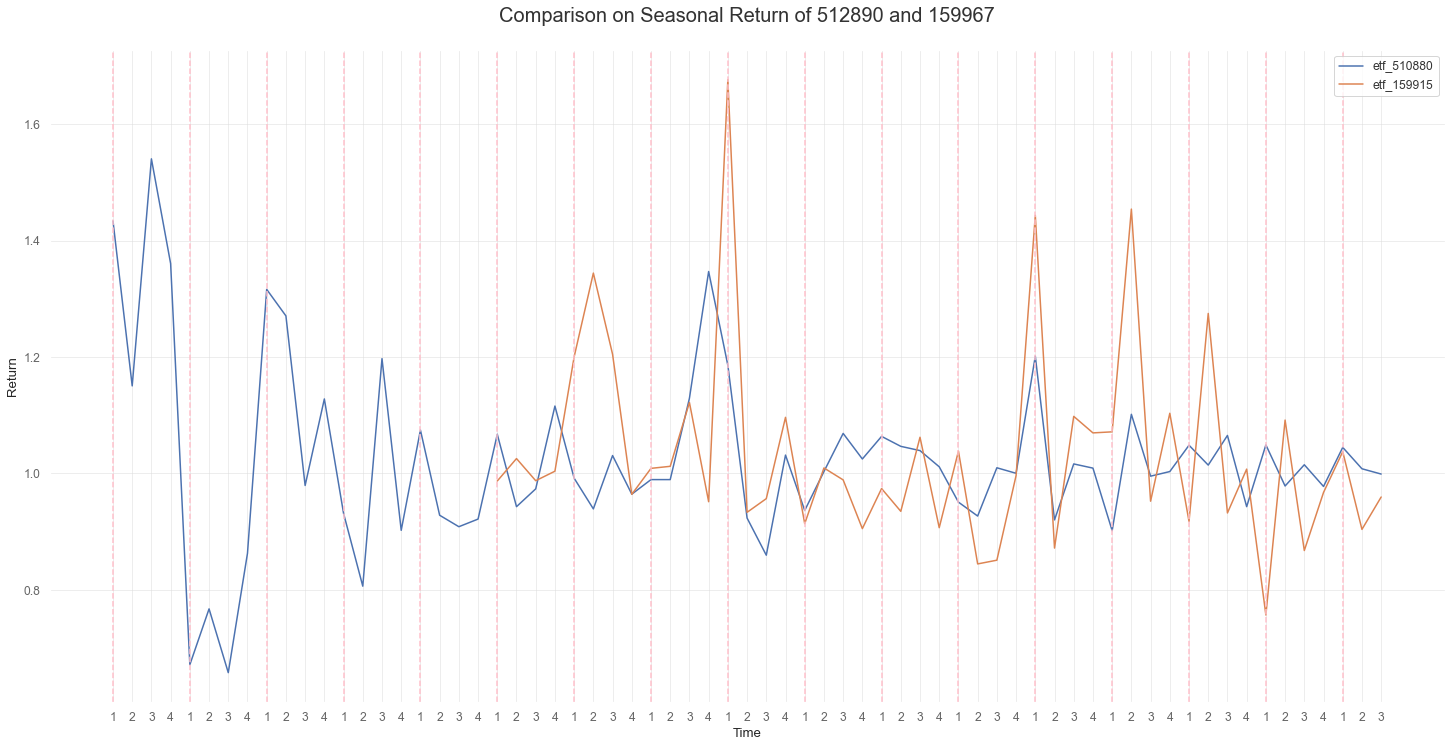

In [586]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have defined etf_512890, etf_159967, and custom_labels
# custom_labels = ['2007-1','2007-1','2007-3','2007-1',
#                  '2008-1','2008-2','2008-3','2008-4',
#                  '2009-1','2009-2','2009-3','2009-4',
#                  '2010-1','2010-2','2010-3','2010-4',
#                  '2011-1','2011-2','2011-3','2011-4',
#                  '2012-1','2012-2','2012-3','2012-4',
#                  '2013-1','2013-2','2013-3','2013-4',
#                  '2014-1','2014-2','2014-3','2014-4',
#                  '2015-1','2015-2','2015-3','2015-4',
#                  '2016-1','2016-2','2016-3','2016-4',
#                  '2017-1','2017-2','2017-3','2017-4',
#                  '2018-1','2018-2','2018-3','2018-4',
#                  '2019-1','2019-2','2019-3','2019-4',
#                  '2020-1','2020-2','2020-3','2020-4',
#                  '2021-1','2021-2','2021-3','2021-4',
#                  '2022-1','2022-2','2022-3','2022-4',
#                  '2023-1','2023-2','2023-3']

custom_labels = ['1','2','3','4',
                 '1','2','3','4',
                '1','2','3','4',
               '1','2','3','4',
                '1','2','3','4',
                 '1','2','3','4',
                 '1','2','3','4',
                 '1','2','3','4',
                '1','2','3','4',
                '1','2','3','4',
                 '1','2','3','4',
               '1','2','3','4',
                '1','2','3','4',
                 '1','2','3','4',
                '1','2','3','4',
                    '1','2','3','4',
                    '1','2','3']


plt.figure(figsize=(25, 12))
plt.xlabel('Time') 
plt.ylabel('Return')
plt.title('Comparison on Seasonal Return of 512890 and 159967\n', fontsize=20)

plot_df = pd.DataFrame()
plot_df['etf_510880'] = etf_510880
plot_df['etf_159915'] = etf_159915
plot_df['custom_labels'] = custom_labels
plot_df.set_index('custom_labels', inplace=True)

# Plot the data using numerical index for x-axis values
plt.plot(range(len(plot_df)), plot_df['etf_510880'].values)
plt.plot(range(len(plot_df)), plot_df['etf_159915'].values)

# Set custom labels for x-axis tick marks
plt.xticks(range(len(plot_df)), plot_df.index)

plt.legend(['etf_510880', 'etf_159915']) 

for i in range(0, len(plot_df), 4):
    plt.axvline(x=i, color='pink', linestyle='--')

ax = plt.gca()
# ax.xaxis.set_major_locator(ticker.MultipleLocator(200))

plt.show()


In [620]:
column_name  = ['Seasonal_Return']
seasonal_df = pd.DataFrame(columns=column_name)

target_num = 2

for i in range(len(quarter_divider[1])):
    for key, value in quarter_divider.items():
        # print(key,i)
        try:
            target_index = quarter_divider[key][i]
        except IndexError:
            continue
        if key == 1 or key == 3:
            target_df = df_longer.loc[target_index].iloc[:,2]
        else:
            target_df = df_longer.loc[target_index].iloc[:,3]
        seasonal_df = pd.concat([seasonal_df, target_df], axis=0)

seasonal_df['Seasonal_Return'] = seasonal_df[0]
seasonal_df.drop(0, axis=1, inplace=True)

seasonal_df['arr'] = seasonal_df['Seasonal_Return'] + 1
seasonal_df[f'Seasonal_result'] = np.cumprod(seasonal_df['arr'], axis=0)*100
seasonal_df[f'Seasonal_result'] = (100/seasonal_df[f'Seasonal_result'].values[0]) * seasonal_df[f'Seasonal_result'] 

In [622]:
df_longer_21 = df_longer_21.iloc[1184:,:]
seasonal_df = seasonal_df.iloc[1203:,:]

seasonal_df[f'Seasonal_result'] = (100/seasonal_df[f'Seasonal_result'].values[0]) * seasonal_df[f'Seasonal_result'] 
df_longer_21[f'signal_return_21'] = (100/df_longer_21[f'signal_return_21'].values[0]) * df_longer_21[f'signal_return_21'] 


In [625]:

data_plot = df_longer_21.copy()
data_plot['etf_510880_return'] = data_plot['etf_510880']*(100/data_plot.loc[:,"etf_510880"][0])
data_plot['etf_159915_return'] = data_plot['etf_159915']*(100/data_plot.loc[:,"etf_159915"][0])

In [628]:
seasonal_df['arr1'] = df_longer_21['arr']
seasonal_df['arr_avg'] = (seasonal_df['arr'] + seasonal_df['arr1']) *(1/2)
seasonal_df['Seasonal_result_avg'] = np.cumprod(seasonal_df['arr_avg'], axis=0)*100
seasonal_df['Seasonal_result_avg'] = (100/seasonal_df['Seasonal_result_avg'].values[0]) * seasonal_df['Seasonal_result_avg'] 

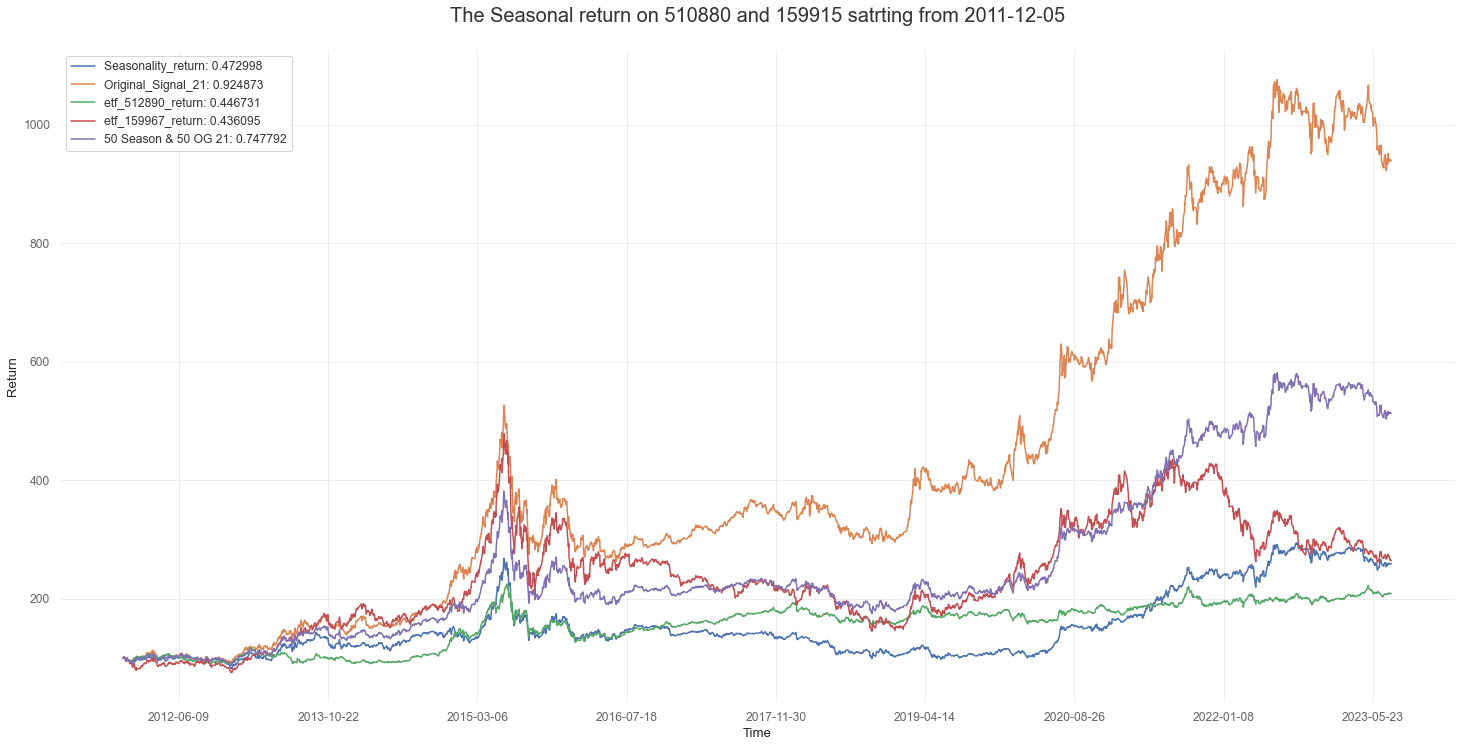

In [632]:
_ = plt.figure(figsize=(25, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(seasonal_df['Seasonal_result'].index),seasonal_df['Seasonal_result'].values)
_ = plt.plot(np.array(df_longer_21['signal_return_21'].index),df_longer_21['signal_return_21'] .values)
_ = plt.plot(np.array(data_plot['etf_510880_return'].index),data_plot['etf_510880_return'] .values)
_ = plt.plot(np.array(data_plot['etf_159915_return'].index),data_plot['etf_159915_return'] .values)
_ = plt.plot(np.array(seasonal_df['Seasonal_result_avg'].index),seasonal_df['Seasonal_result_avg'].values)

_ = plt.legend([f'Seasonality_return: {round(Test.get_Sharpe(seasonal_df, "Seasonal_result"),6)}', 
                f'Original_Signal_21: {round(Test.get_Sharpe(df_longer_21, "signal_return_21"),6)}', 
                f'etf_512890_return: {round(Test.get_Sharpe(data_plot, "etf_510880_return"),6)}', 
                f'etf_159967_return: {round(Test.get_Sharpe(data_plot, "etf_159915_return"),6)}',
                f'50 Season & 50 OG 21: {round(Test.get_Sharpe(seasonal_df, "Seasonal_result_avg"),6)}']) 


# for i in [116, 359, 602, 845]:
#     plt.axvline(x=seasonal_df.index[i], color='pink', linestyle='--')
# for i in [55, 174, 233, 299, 417, 477, 541, 660, 719, 784, 904, 963]:
#     plt.axvline(x=seasonal_df.index[i], color='green', linestyle='--')


plt.title('The Seasonal return on 510880 and 159915 satrting from 2011-12-05\n', fontsize=20)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(500))

In [5]:
df = Rolling.get_data(['510880', '159915'])

Here at starting from the longest period


In [9]:
df.iloc[1300:,:]

etf_510880  etf_159915  etf_510880_day_return  \
EndDate                                                     
2012-04-25      1.3680      0.7854               0.004405   
2012-04-26      1.3650      0.7814              -0.002193   
2012-04-27      1.3610      0.7893              -0.002930   
2012-05-02      1.3830      0.7988               0.016165   
2012-05-03      1.3840      0.8055               0.000723   
...                ...         ...                    ...   
2023-07-19      2.7178      2.4329               0.003730   
2023-07-20      2.7097      2.4088              -0.002980   
2023-07-21      2.7119      2.4171               0.000812   
2023-07-24      2.7104      2.3990              -0.000553   
2023-07-25      2.7402      2.4503               0.010995   

            etf_159915_day_return  
EndDate                            
2012-04-25               0.001275  
2012-04-26              -0.005093  
2012-04-27               0.010110  
2012-05-02               0.012036  
2012-05-03               0.008388  
...                           ...  
2023-07-19              -0.010614  
2023-07-20              -0.009906  
2023-07-21               0.003446  
2023-07-24              -0.007488  
2023-07-25               0.021384  

[2750 rows x 4 columns]

In [10]:

cnxn_jydb = pyodbc.connect('Driver={SQL Server};Server=192.168.0.144;Database=jydb;uid=zxing;pwd=zxing321')

def read_jydb(sql_query):
    return pd.read_sql(sql_query, cnxn_jydb)

def get_etf_daybar(secucode, begindate, enddate):
    sql_query = f"""
    SELECT b.[SecuCode] as 'secucode'
          ,[TradingDay] as 'tradingday'
          ,[OpenPrice] as 'open'
          ,[HighPrice] as 'high'
          ,[LowPrice] as 'low'
          ,[ClosePrice] as 'close'
          ,[TurnoverVolume] as 'volume'
          ,[TurnoverValue] as 'turnover'
          ,[PrevClosePrice] as 'prev_close'
    FROM [jydb].[dbo].QT_FundsPerformanceHis a ,SecuMain b
    where b.SecuCode = '{secucode}' and (TradingDay between '{begindate}' and '{enddate}') 
    and b.InnerCode = a.InnerCode and b.SecuCategory = 8
    order by TradingDay asc
    """

    df = read_jydb(sql_query)
    df['str_date'] = df['tradingday'].apply(lambda x: x.strftime('%Y%m%d'))
    df.set_index('tradingday', inplace=True, drop=True)
    return df

In [12]:
check = get_etf_daybar('510880', 20100204, 20230726)

In [18]:
check.iloc[500:,:]

secucode   open   high    low  close      volume     turnover  \
tradingday                                                                 
2012-03-02   510880  1.969  1.990  1.969  1.990    286.2294    5679295.0   
2012-03-05   510880  1.991  2.000  1.976  1.980    278.3104    5535117.0   
2012-03-06   510880  1.974  1.978  1.946  1.951    339.6373    6649571.0   
2012-03-07   510880  1.943  1.949  1.934  1.935    187.5900    3641262.0   
2012-03-08   510880  1.939  1.960  1.939  1.952    347.0480    6775612.0   
...             ...    ...    ...    ...    ...         ...          ...   
2023-07-19   510880  2.965  2.988  2.965  2.987   4730.9100  140887349.0   
2023-07-20   510880  2.987  2.996  2.972  2.978   4156.9153  124019111.0   
2023-07-21   510880  2.974  2.984  2.967  2.978   3775.4200  112343994.0   
2023-07-24   510880  2.970  2.988  2.961  2.976   5746.0100  170934718.0   
2023-07-25   510880  2.993  3.019  2.993  3.018  10762.9214  324197418.0   

            prev_close  str_date  
tradingday                        
2012-03-02       1.969  20120302  
2012-03-05       1.990  20120305  
2012-03-06       1.980  20120306  
2012-03-07       1.951  20120307  
2012-03-08       1.935  20120308  
...                ...       ...  
2023-07-19       2.968  20230719  
2023-07-20       2.987  20230720  
2023-07-21       2.978  20230721  
2023-07-24       2.978  20230724  
2023-07-25       2.976  20230725  

[2771 rows x 9 columns]

## -

## -

## -

## Modified Seasonality and Rolling

The concept is based on:
<br>
<br>
During the first and third quarter, if the 21 return of 159967 is larger than 512890's by 5 percent, we choose to switch to 512890, other time we choose 159967
<br>
<br>
During the second and fourth quarter, if the 21 return of 512890 is larger than 159967's by 5 percent, we choose to switch to 159967, other time we choose 512890

In [812]:
df = Rolling.get_data(['512890', '159967'])
new_df = df.iloc[3:,:]

Here at starting from the longest period


In [176]:
list_of_dfs = [new_df_2019, new_df_2020, new_df_2021, new_df_2022, new_df_2023]
step_num = 63 ## The amount of trading days in one quarter

quarter_divider, etf_512890, etf_159967 = compute_seasonal_return(list_of_dfs, step_num)



_____________________Year of 2019_________________________


For 2019 1th quarter, between 2019-01-04 and 2019-04-18
We have the return of etf_512890 as: 1.226
We have the return of etf_159967 as: nan


For 2019 2th quarter, between 2019-04-18 and 2019-07-19
We have the return of etf_512890 as: 0.9292
We have the return of etf_159967 as: nan


For 2019 3th quarter, between 2019-07-19 and 2019-10-24
We have the return of etf_512890 as: 1.0004
We have the return of etf_159967 as: 1.1008


For 2019 4th quarter, between 2019-10-24 and 2019-12-31
We have the return of etf_512890 as: 1.0622
We have the return of etf_159967 as: 1.0573


_____________________Year of 2020_________________________


For 2020 1th quarter, between 2020-01-02 and 2020-04-09
We have the return of etf_512890 as: 0.8853
We have the return of etf_159967 as: 1.1178


For 2020 2th quarter, between 2020-04-09 and 2020-07-14
We have the return of etf_512890 as: 1.2111
We have the return of etf_159967 as: 1.4807


For 202

----

In [813]:
return_21 = Rolling.single_window_table(new_df, [21], 2)

In [1184]:
## Mask Condition created for two suggested conditions 

## 1
mod_1 = return_21[return_21.loc[:,'etf_512890_day_return_21'] - return_21.loc[:,'etf_159967_day_return_21'] > -0.05]
mod_1_dates = mod_1.index


## 2
mod_2 = return_21[return_21.loc[:,'etf_512890_day_return_21'] - return_21.loc[:,'etf_159967_day_return_21'] > 0.05]
mod_2_dates = mod_2.index

- Sort out the dates that needed to be changed

In [1188]:

q13_same = []
for q1 in quarter_divider[1]:
    common_index = mod_1_dates.intersection(q1)
    q13_same.append(common_index)
for q3 in quarter_divider[3]:
    common_index = mod_1_dates.intersection(q3)
    q13_same.append(common_index)
# q13_same = [dt + timedelta(days=1) for dt in q13_same]

q24_same = []
for q2 in quarter_divider[2]:
    common_index = mod_2_dates.intersection(q2)
    q24_same.append(common_index)
for q4 in quarter_divider[4]:
    common_index = mod_2_dates.intersection(q4)
    q24_same.append(common_index)
# q24_same = [dt + timedelta(days=1) for dt in q24_same]

In [195]:

## Get Alternative Return for Q13
## Selective days HOLDING 512890
mod_13 = pd.DataFrame()
for dates in q13_same:
    target_df = new_df.loc[dates].iloc[:,2]
    mod_13 = pd.concat([mod_13, target_df], axis=0)




## Get Alternative Return for Q24
## Selective days HOLDING 512890
mod_24 = pd.DataFrame()
for dates in q24_same:
    target_df = new_df.loc[dates].iloc[:,2]
    mod_24 = pd.concat([mod_24, target_df], axis=0)
    

In [605]:
column_name  = ['Seasonal_Return']
seasonal_df2 = pd.DataFrame(columns=column_name)

target_num = 2

for i in range(len(quarter_divider[1])):
    for key, value in quarter_divider.items():
        # print(key,i)
        try:
            target_index = quarter_divider[key][i]
        
        except IndexError:
        ## Deal with senario when 2023 does not have its full Q3 and Q4 info
            continue
        ## For each Quarter, always start off by holding 159967
        target_df = new_df.loc[target_index].iloc[:,3]
        print(f'This is Quarter {key} at round {i}')
        ## For each Quarter, modify the days that needs to hold 512890
        if key == 1 or key == 3:
            # print(mod_13.index)
            # print(change_df)
            # print('\n')
            # print(change_df.index)
            for date in mod_13.index:
                # print(mod_13.iloc[str(date)[:10], 0])
                if str(date)[:10] in target_df.index:
                    
                    target_df[str(date)[:10]] = mod_13.loc[str(date)[:10], 0]
                    print("We are here")
                # try:
                #     target_df[str(date)[:10]] = mod_13.iloc[str(date)[:10], 0]
                # except:
                #     continue
        else:
            # change_df = target_df[target_df.index.isin(mod_24.index)]
            for date in mod_24.index:
                if str(date)[:10] in target_df.index:
                    target_df[str(date)[:10]] = mod_24.loc[str(date)[:10], 0]
                    print("We are here")
        #         try:
        #             target_df[str(date)[:10]] = mod_24.iloc[str(date)[:10], 0]
        #         except:
        #             continue
        seasonal_df2 = pd.concat([seasonal_df2, target_df], axis=0)

seasonal_df2['Seasonal_Return'] = seasonal_df2[0]
seasonal_df2.drop(0, axis=1, inplace=True)

seasonal_df2['arr'] = seasonal_df2['Seasonal_Return'] + 1
seasonal_df2 = seasonal_df2.iloc[122:,:]

seasonal_df2[f'Seasonal_result'] = np.cumprod(seasonal_df2['arr'], axis=0)*100
seasonal_df2[f'Seasonal_result'] = (100/seasonal_df2[f'Seasonal_result'].values[0]) * seasonal_df2[f'Seasonal_result'] 



This is Quarter 1 at round 0
This is Quarter 2 at round 0
This is Quarter 3 at round 0
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
This is Quarter 4 at round 0
This is Quarter 1 at round 1
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
We are here
This is Quarter 2 at round 1
This is Quarter 3 at round 1
We are here
We are here
We are here
We are here
We ar

In [624]:
(len(mod_1_dates) + len(mod_2_dates))/len(seasonal_df2)*365

331.48335015136223

In [616]:
seasonal_df2

Seasonal_Return       arr  Seasonal_result   mod_arr  \
2019-07-15         0.009012  1.009012       100.000000  1.009012   
2019-07-16        -0.001344  0.998656        99.865553  0.998656   
2019-07-17         0.000577  1.000577        99.923173  1.000577   
2019-07-18        -0.015762  0.984238        98.348219  0.984238   
2019-07-19         0.010643  1.010643        99.394987  1.010643   
...                     ...       ...              ...       ...   
2023-08-03         0.002224  1.002224       656.344335  1.002224   
2023-08-04         0.022191  1.022191       670.909535  1.022191   
2023-08-07        -0.004939  0.995061       667.595952  0.995061   
2023-08-08        -0.007363  0.992637       662.680197  0.992637   
2023-08-09        -0.008187  0.991813       657.254660  0.991813   

            Seasonal_result_mod  
2019-07-15           100.000000  
2019-07-16            99.865553  
2019-07-17            99.923173  
2019-07-18            98.348219  
2019-07-19            99.394987  
...                         ...  
2023-08-03           610.810546  
2023-08-04           624.365288  
2023-08-07           621.281584  
2023-08-08           616.706859  
2023-08-09           611.657717  

[991 rows x 5 columns]

In [625]:
sum(seasonal_df2['arr']>=1)/len(seasonal_df2)

0.557013118062563

In [626]:
annualized_return = round(np.power(seasonal_df2['Seasonal_result'][-1]/100,365/len(seasonal_df2))*100-100,2)
print(f"Annualized Return: {round(annualized_return, 2)}%")

Annualized Return: 100.07%


In [629]:
seasonal_df2['Previous_Peak'] = seasonal_df2['Seasonal_result'].cummax()
seasonal_df2['Drawdown'] = seasonal_df2['Seasonal_result'] / seasonal_df2['Previous_Peak'] - 1
max_drawdown = round(seasonal_df2['Drawdown'].min(),4)
max_drawdown

-0.1586

In [630]:
annualized_volatility = np.sqrt(252) * seasonal_df2['arr'].std()
print(f'Annualized Volatility: {round(annualized_volatility,2)}')

Annualized Volatility: 0.24


In [612]:
seasonal_df2['mod_arr'] = seasonal_df2['arr']

#-----------------------modified------------------------------------#
## Minus seasonal position change trasnsaction cost
OG_list = [51, 112, 157, 238, 296, 355, 421, 481, 539, 599, 662, 723, 1025, 1083]
substracted_list = [x - 123 for x in OG_list if x > 123]
for row_time in substracted_list:
    seasonal_df2.loc[seasonal_df2.index[row_time], 'mod_arr'] -= 0.006

seasonal_df2[f'Seasonal_result_mod'] = np.cumprod(seasonal_df2['mod_arr'], axis=0)*100
seasonal_df2[f'Seasonal_result_mod'] = (100/seasonal_df2[f'Seasonal_result_mod'].values[0]) * seasonal_df2[f'Seasonal_result_mod'] 

In [252]:
df = Rolling.get_data(['512890', '159967'])
df_21 = Rolling.single_window_table(df,[21], 2)
df_21 = df_21.loc[seasonal_df2.index]
df_21[f'signal_return_21'] = (100/df_21[f'signal_return_21'].values[0]) * df_21[f'signal_return_21'] 

Here at starting from the longest period


In [253]:
data_plot = df_21.copy()
data_plot['etf_512890_return'] = data_plot['etf_512890']*(100/data_plot.loc[:,"etf_512890"][0])
data_plot['etf_159967_return'] = data_plot['etf_159967']*(100/data_plot.loc[:,"etf_159967"][0])

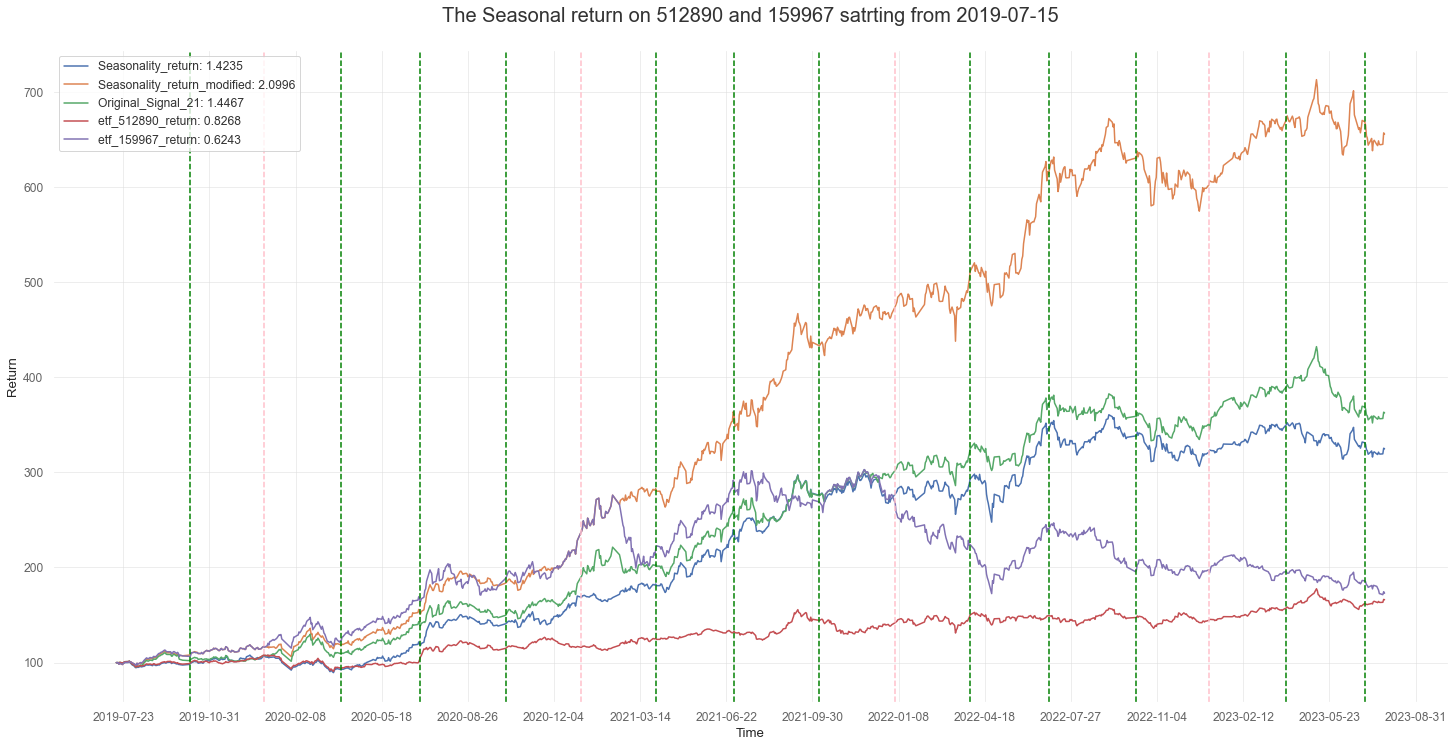

In [254]:
_ = plt.figure(figsize=(25, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(seasonal_df['Seasonal_result'].index),seasonal_df['Seasonal_result'].values)
_ = plt.plot(np.array(seasonal_df2['Seasonal_result'].index),seasonal_df2['Seasonal_result'].values)
_ = plt.plot(np.array(df_21['signal_return_21'].index),df_21['signal_return_21'] .values)
_ = plt.plot(np.array(data_plot['etf_512890_return'].index),data_plot['etf_512890_return'] .values)
_ = plt.plot(np.array(data_plot['etf_159967_return'].index),data_plot['etf_159967_return'] .values)

_ = plt.legend([f'Seasonality_return: {round(Test.get_Sharpe(seasonal_df, "Seasonal_result"),4)}', 
                f'Seasonality_return_modified: {round(Test.get_Sharpe(seasonal_df2, "Seasonal_result"),4)}', 
                f'Original_Signal_21: {round(Test.get_Sharpe(df_21, "signal_return_21"),4)}', 
                f'etf_512890_return: {round(Test.get_Sharpe(data_plot, "etf_512890_return"),4)}', 
                f'etf_159967_return: {round(Test.get_Sharpe(data_plot, "etf_159967_return"),4)}']) 


for i in [116, 359, 602, 845]:
    plt.axvline(x=seasonal_df.index[i], color='pink', linestyle='--')
for i in [55, 174, 233, 299, 417, 477, 541, 660, 719, 784, 904, 963]:
    plt.axvline(x=seasonal_df.index[i], color='green', linestyle='--')


plt.title('The Seasonal return on 512890 and 159967 satrting from 2019-07-15\n', fontsize=20)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

In [187]:
seasonal_df2

Seasonal_Return       arr  Seasonal_result
2019-07-15         0.009012  1.009012       100.000000
2019-07-16        -0.001344  0.998656        99.865553
2019-07-17         0.000577  1.000577        99.923173
2019-07-18        -0.015762  0.984238        98.348219
2019-07-19         0.010643  1.010643        99.394987
...                     ...       ...              ...
2023-07-20        -0.021189  0.978811       172.572746
2023-07-21        -0.001224  0.998776       172.361471
2023-07-24        -0.005460  0.994540       171.420340
2023-07-25         0.018319  1.018319       174.560645
2023-07-26        -0.009573  0.990427       172.889657

[981 rows x 3 columns]

In [634]:
(len(mod_1_dates)+len(mod_2_dates))/len(seasonal_df2)*365

331.48335015136223

In [635]:
seasonal_df2

Seasonal_Return       arr  Seasonal_result   mod_arr  \
2019-07-15         0.009012  1.009012       100.000000  1.009012   
2019-07-16        -0.001344  0.998656        99.865553  0.998656   
2019-07-17         0.000577  1.000577        99.923173  1.000577   
2019-07-18        -0.015762  0.984238        98.348219  0.984238   
2019-07-19         0.010643  1.010643        99.394987  1.010643   
...                     ...       ...              ...       ...   
2023-08-03         0.002224  1.002224       656.344335  1.002224   
2023-08-04         0.022191  1.022191       670.909535  1.022191   
2023-08-07        -0.004939  0.995061       667.595952  0.995061   
2023-08-08        -0.007363  0.992637       662.680197  0.992637   
2023-08-09        -0.008187  0.991813       657.254660  0.991813   

            Seasonal_result_mod  Previous_Peak  Drawdown  
2019-07-15           100.000000     100.000000  0.000000  
2019-07-16            99.865553     100.000000 -0.001344  
2019-07-17            99.923173     100.000000 -0.000768  
2019-07-18            98.348219     100.000000 -0.016518  
2019-07-19            99.394987     100.000000 -0.006050  
...                         ...            ...       ...  
2023-08-03           610.810546     712.820658 -0.079229  
2023-08-04           624.365288     712.820658 -0.058796  
2023-08-07           621.281584     712.820658 -0.063445  
2023-08-08           616.706859     712.820658 -0.070341  
2023-08-09           611.657717     712.820658 -0.077952  

[991 rows x 7 columns]

In [638]:
for row_time in mod_1_dates:
    seasonal_df2.loc[row_time, 'mod_arr'] -= 0.006
for row_time in mod_2_dates:
    seasonal_df2.loc[row_time, 'mod_arr'] -= 0.006

In [639]:
seasonal_df2[f'Seasonal_result_mod'] = np.cumprod(seasonal_df2['mod_arr'], axis=0)*100
seasonal_df2[f'Seasonal_result_mod'] = (100/seasonal_df2[f'Seasonal_result_mod'].values[0]) * seasonal_df2[f'Seasonal_result_mod'] 

In [640]:
seasonal_df2

Seasonal_Return       arr  Seasonal_result   mod_arr  \
2019-07-15         0.009012  1.009012       100.000000  1.009012   
2019-07-16        -0.001344  0.998656        99.865553  0.998656   
2019-07-17         0.000577  1.000577        99.923173  1.000577   
2019-07-18        -0.015762  0.984238        98.348219  0.984238   
2019-07-19         0.010643  1.010643        99.394987  1.010643   
...                     ...       ...              ...       ...   
2023-08-03         0.002224  1.002224       656.344335  1.002224   
2023-08-04         0.022191  1.022191       670.909535  1.022191   
2023-08-07        -0.004939  0.995061       667.595952  0.995061   
2023-08-08        -0.007363  0.992637       662.680197  0.992637   
2023-08-09        -0.008187  0.991813       657.254660  0.991813   

            Seasonal_result_mod  Previous_Peak  Drawdown  
2019-07-15           100.000000     100.000000  0.000000  
2019-07-16            99.865553     100.000000 -0.001344  
2019-07-17            99.923173     100.000000 -0.000768  
2019-07-18            98.348219     100.000000 -0.016518  
2019-07-19            99.394987     100.000000 -0.006050  
...                         ...            ...       ...  
2023-08-03             0.052998     712.820658 -0.079229  
2023-08-04             0.054174     712.820658 -0.058796  
2023-08-07             0.053907     712.820658 -0.063445  
2023-08-08             0.053510     712.820658 -0.070341  
2023-08-09             0.053072     712.820658 -0.077952  

[991 rows x 7 columns]

In [643]:
seasonal_df2['Previous_Peak'] = seasonal_df2['Seasonal_result_mod'].cummax()
seasonal_df2['Drawdown'] = seasonal_df2['Seasonal_result_mod'] / seasonal_df2['Previous_Peak'] - 1
max_drawdown = round(seasonal_df2['Drawdown'].min(),4)
max_drawdown

-0.9995

In [644]:
annualized_volatility = np.sqrt(252) * seasonal_df2['mod_arr'].std()
print(f'Annualized Volatility: {round(annualized_volatility,2)}')

Annualized Volatility: 0.28


In [645]:
annualized_return = round(np.power(seasonal_df2['Seasonal_result_mod'][-1]/100,365/len(seasonal_df2))*100-100,2)
print(f"Annualized Return: {round(annualized_return, 2)}%")

Annualized Return: -93.78%


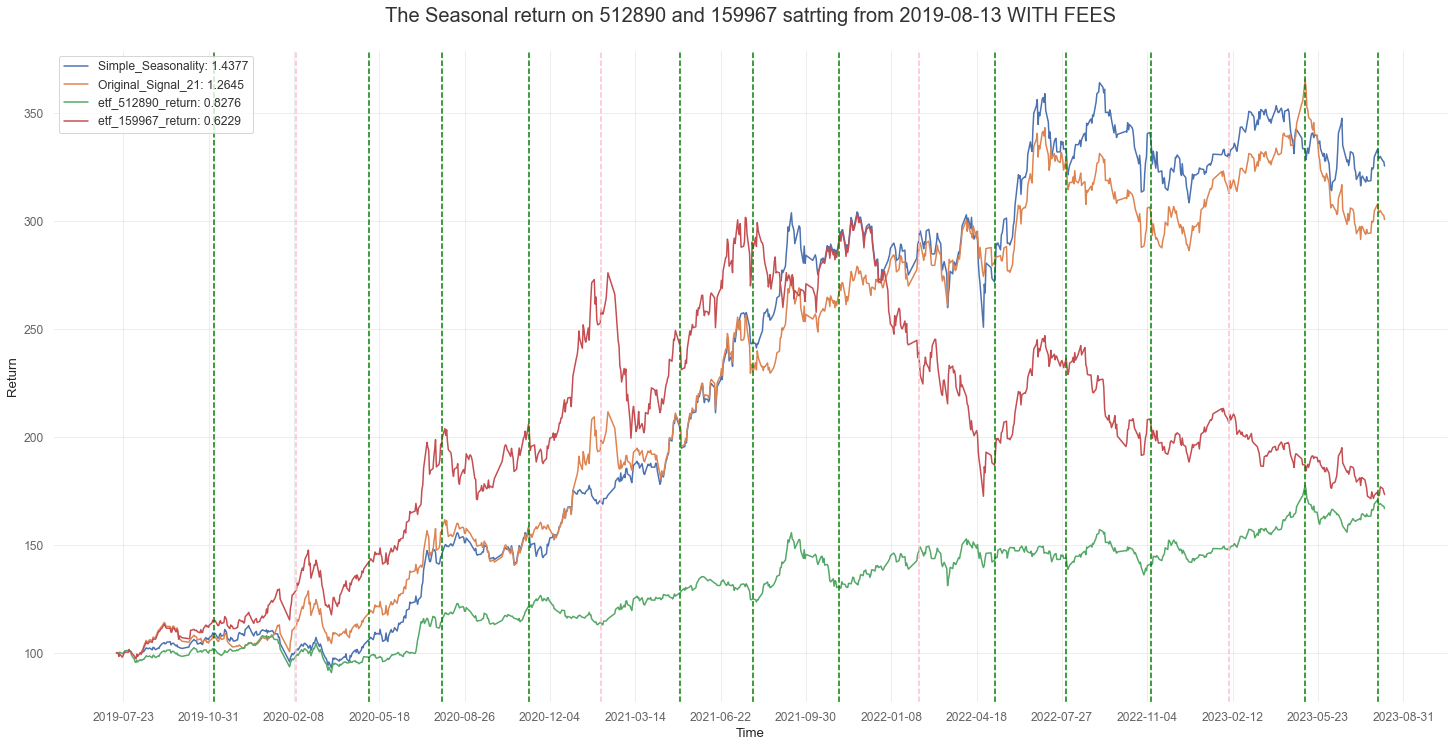

In [1815]:
_ = plt.figure(figsize=(25, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(seasonal_df['Seasonal_result'].index),seasonal_df['Seasonal_result'].values)
_ = plt.plot(np.array(df_21_count['signal_return_21'].index),df_21_count['signal_return_21'] .values)
_ = plt.plot(np.array(data_plot['etf_512890_return'].index),data_plot['etf_512890_return'] .values)
_ = plt.plot(np.array(data_plot['etf_159967_return'].index),data_plot['etf_159967_return'] .values)

_ = plt.legend([f'Simple_Seasonality: {round(Test.get_Sharpe(seasonal_df, "Seasonal_result"),4)}', 
                f'Original_Signal_21: {round(Test.get_Sharpe(df_21_count, "signal_return_21"),4)}', 
                f'etf_512890_return: {round(Test.get_Sharpe(data_plot, "etf_512890_return"),4)}', 
                f'etf_159967_return: {round(Test.get_Sharpe(data_plot, "etf_159967_return"),4)}']) 


for i in [116, 359, 602, 845]:
    plt.axvline(x=seasonal_df.index[i], color='pink', linestyle='--')
for i in [55, 174, 233, 299, 417, 477, 541, 660, 719, 784, 904, 963]:
    plt.axvline(x=seasonal_df.index[i], color='green', linestyle='--')


plt.title('The Seasonal return on 512890 and 159967 satrting from 2019-08-13 WITH FEES\n', fontsize=20)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

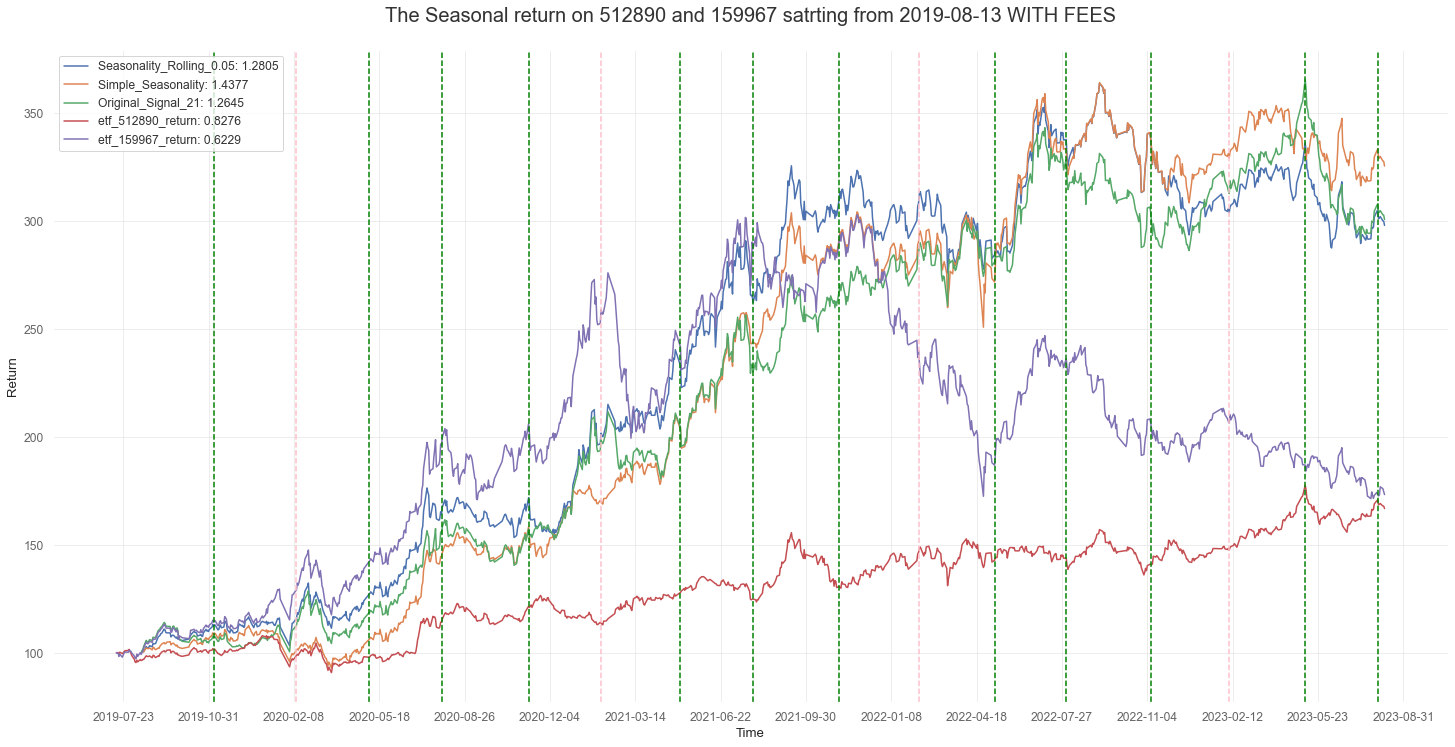

In [1814]:
_ = plt.figure(figsize=(25, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(df_5['Seasonal_result'].index),df_5['Seasonal_result'].values)
_ = plt.plot(np.array(seasonal_df['Seasonal_result'].index),seasonal_df['Seasonal_result'].values)
_ = plt.plot(np.array(df_21_count['signal_return_21'].index),df_21_count['signal_return_21'] .values)
_ = plt.plot(np.array(data_plot['etf_512890_return'].index),data_plot['etf_512890_return'] .values)
_ = plt.plot(np.array(data_plot['etf_159967_return'].index),data_plot['etf_159967_return'] .values)

_ = plt.legend([f'Seasonality_Rolling_0.05: {round(Test.get_Sharpe(df_5, "Seasonal_result"),4)}', 
                f'Simple_Seasonality: {round(Test.get_Sharpe(seasonal_df, "Seasonal_result"),4)}',
                f'Original_Signal_21: {round(Test.get_Sharpe(df_21_count, "signal_return_21"),4)}', 
                f'etf_512890_return: {round(Test.get_Sharpe(data_plot, "etf_512890_return"),4)}', 
                f'etf_159967_return: {round(Test.get_Sharpe(data_plot, "etf_159967_return"),4)}']) 


for i in [116, 359, 602, 845]:
    plt.axvline(x=seasonal_df.index[i], color='pink', linestyle='--')
for i in [55, 174, 233, 299, 417, 477, 541, 660, 719, 784, 904, 963]:
    plt.axvline(x=seasonal_df.index[i], color='green', linestyle='--')


plt.title('The Seasonal return on 512890 and 159967 satrting from 2019-08-13 WITH FEES\n', fontsize=20)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

### 3%

In [1194]:
mod_1 = return_21[return_21.loc[:,'etf_512890_day_return_21'] - return_21.loc[:,'etf_159967_day_return_21'] > -0.03]
mod_1_dates = mod_1.index 

## 2
mod_2 = return_21[return_21.loc[:,'etf_512890_day_return_21'] - return_21.loc[:,'etf_159967_day_return_21'] > 0.03]
mod_2_dates = mod_2.index

In [1195]:
q13_same = []
for q1 in quarter_divider[1]:
    common_index = mod_1_dates.intersection(q1)
    q13_same.append(common_index)
for q3 in quarter_divider[3]:
    common_index = mod_1_dates.intersection(q3)
    q13_same.append(common_index)

q24_same = []
for q2 in quarter_divider[2]:
    common_index = mod_2_dates.intersection(q2)
    q24_same.append(common_index)
for q4 in quarter_divider[4]:
    common_index = mod_2_dates.intersection(q4)
    q24_same.append(common_index)

In [1214]:

## Get Alternative Return for Q13
## Selective days HOLDING 512890
mod_13 = pd.DataFrame()
for dates in q13_same:
    if len(dates) > 0:
        index_list = []
        for date in dates:
            index_location = new_df.index.get_loc(date)
            index_list.append(index_location+1)
        target_df = new_df.iloc[index_list].iloc[:,2]
        mod_13 = pd.concat([mod_13, target_df], axis=0)




    # print(dates)
    # index_location = new_df.index.get_loc(dates)
    # print(index_location)
    # target_df = new_df.loc[dates].iloc[:,2]
    # mod_13 = pd.concat([mod_13, target_df], axis=0)




## Get Alternative Return for Q24
## Selective days HOLDING 512890
mod_24 = pd.DataFrame()
for dates in q24_same:
    target_df = new_df.loc[dates].iloc[:,2]
    mod_24 = pd.concat([mod_24, target_df], axis=0)
    

In [881]:
column_name  = ['Seasonal_Return']
seasonal_df3 = pd.DataFrame(columns=column_name)

target_num = 2

for i in range(len(quarter_divider[1])):
    for key, value in quarter_divider.items():
        # print(key,i)
        try:
            target_index = quarter_divider[key][i]
        
        except IndexError:
        ## Deal with senario when 2023 does not have its full Q3 and Q4 info
            continue
        ## For each Quarter, always start off by holding 159967
        target_df = new_df.loc[target_index].iloc[:,3]

        ## Execution criteria for first and thrid quarter
        if key == 1 or key == 3:
            for date in mod_13.index:
                if str(date)[:10] in target_df.index:
                    target_df[str(date)[:10]] = mod_13.loc[str(date)[:10], 0]
        
        ## Execution criteria for second and fourth quarter
        else:
            for date in mod_24.index:
                if str(date)[:10] in target_df.index:
                    target_df[str(date)[:10]] = mod_24.loc[str(date)[:10], 0]
        seasonal_df3 = pd.concat([seasonal_df3, target_df], axis=0)
        print(seasonal_df3)
print(seasonal_df3)
seasonal_df3['Seasonal_Return'] = seasonal_df3[0]
seasonal_df3.drop(0, axis=1, inplace=True)

seasonal_df3['arr'] = seasonal_df3['Seasonal_Return'] + 1
seasonal_df3 = seasonal_df3.iloc[122:,:]

seasonal_df3[f'Seasonal_result'] = np.cumprod(seasonal_df3['arr'], axis=0)*100
seasonal_df3[f'Seasonal_result'] = (100/seasonal_df3[f'Seasonal_result'].values[0]) * seasonal_df3[f'Seasonal_result'] 



           Seasonal_Return   0
2019-01-04             NaN NaN
2019-01-10             NaN NaN
2019-01-11             NaN NaN
2019-01-17             NaN NaN
2019-01-18             NaN NaN
...                    ...  ..
2019-04-11             NaN NaN
2019-04-12             NaN NaN
2019-04-15             NaN NaN
2019-04-16             NaN NaN
2019-04-17             NaN NaN

[63 rows x 2 columns]
           Seasonal_Return         0
2019-01-04             NaN       NaN
2019-01-10             NaN       NaN
2019-01-11             NaN       NaN
2019-01-17             NaN       NaN
2019-01-18             NaN       NaN
...                    ...       ...
2019-07-12             NaN       NaN
2019-07-15             NaN  0.009012
2019-07-16             NaN -0.001344
2019-07-17             NaN  0.000577
2019-07-18             NaN -0.015762

[126 rows x 2 columns]
           Seasonal_Return         0
2019-01-04             NaN       NaN
2019-01-10             NaN       NaN
2019-01-11             NaN

### Function on Seasonal Return including Position counts

In [1892]:
def create_seasonal_rolling(window_list, number):

    df = Rolling.get_data(window_list)
    new_df = df.iloc[3:,:]
    return_21 = Rolling.single_window_table(new_df, [21], 2)

    ## Mask Condition created for two suggested conditions 
    
    ## 1
    mod_1 = return_21[return_21.loc[:,'etf_512890_day_return_21'] - return_21.loc[:,'etf_159967_day_return_21'] > -number]
    # mod_1_dates = mod_1.index + DateOffset(days=1)
    mod_1_dates = mod_1.index


    ## 2
    mod_2 = return_21[return_21.loc[:,'etf_512890_day_return_21'] - return_21.loc[:,'etf_159967_day_return_21'] > number]
    # mod_2_dates = mod_2.index + DateOffset(days=1)
    mod_2_dates = mod_2.index 

    ## Get the senarios for Holding 512890 during Q1 and Q3 
    q13_same = []
    for q1 in quarter_divider[1]:
        common_index = mod_1_dates.intersection(q1)
        q13_same.append(common_index)
    for q3 in quarter_divider[3]:
        common_index = mod_1_dates.intersection(q3)
        q13_same.append(common_index)
    # q13_same = [dt + timedelta(days=1) for dt in q13_same]

    ## Get the senarios for Holding 512890 during Q2 and Q4
    q24_same = []
    for q2 in quarter_divider[2]:
        common_index = mod_2_dates.intersection(q2)
        q24_same.append(common_index)
    for q4 in quarter_divider[4]:
        common_index = mod_2_dates.intersection(q4)
        q24_same.append(common_index)
    # q24_same = [dt + timedelta(days=1) for dt in q24_same]


    ## Get Alternative Return for Q13
    ## Selective days HOLDING 512890
    # mod_13 = pd.DataFrame()
    # for dates in q13_same:
    #     target_df = new_df.loc[dates].iloc[:,2]
    #     mod_13 = pd.concat([mod_13, target_df], axis=0)
    mod_13 = pd.DataFrame()
    missing_spot_13 = []
    for dates in q13_same:
        if len(dates) > 0:
            index_list = []
            for date in dates:
                index_location = new_df.index.get_loc(date)
                index_list.append(index_location+1)
            missing_spot_13.append(dates[0])
            target_df = new_df.iloc[index_list].iloc[:,2]
            mod_13 = pd.concat([mod_13, target_df], axis=0)
    



    ## Get Alternative Return for Q24
    ## Selective days HOLDING 512890
    # mod_24 = pd.DataFrame()
    # for dates in q24_same:
    #     target_df = new_df.loc[dates].iloc[:,2]
    #     mod_24 = pd.concat([mod_24, target_df], axis=0)
    mod_24 = pd.DataFrame()
    missing_spot_24 = []
    for dates in q24_same:
        if len(dates) > 0:
            index_list = []
            for date in dates:
                index_location = new_df.index.get_loc(date)
                index_list.append(index_location+1)
            missing_spot_24.append(dates[0])
            target_df = new_df.iloc[index_list].iloc[:,2]
            mod_24 = pd.concat([mod_24, target_df], axis=0)

    column_name  = ['Seasonal_Return']

    seasonal_df2 = pd.DataFrame(columns=column_name)
    seasonal_df2['signal_512890'] = [0] * len(seasonal_df2)
    seasonal_df2['signal_159967'] = [1] * len(seasonal_df2)

    target_num = 2

    for i in range(len(quarter_divider[1])):
        for key, value in quarter_divider.items():
            # print(key,i)
            try:
                target_index = quarter_divider[key][i]
            
            except IndexError:
            ## Deal with senario when 2023 does not have its full Q3 and Q4 info
                continue
            ## For each Quarter, initilaize the df holding 159967
            target_df = pd.DataFrame()
            target_df['Seasonal_Return'] = new_df.loc[target_index].iloc[:,3]
            target_df['signal_512890'] = [0] * len(target_df)
            target_df['signal_159967'] = [1] * len(target_df)
            # print(target_df.index[0])


            if key == 1 or key == 3:
                ## Add in 512890 values on given conditions during Q1 and Q3
                mask = target_df.index.intersection(mod_13.index)
                if len(mod_13) > 0:
                    target_df.loc[mask, 'Seasonal_Return'] = mod_13.loc[mask][0]
                    target_df.loc[mask, 'signal_512890'] += 1
                    target_df.loc[mask, 'signal_159967'] -= 1

            else:
                ## Add in 512890 values on given conditions during Q2 and Q4
                mask = target_df.index.intersection(mod_24.index)
                if len(mod_24) > 0:
                    ## Condition when mod_24 is empty
                    target_df.loc[mask, 'Seasonal_Return'] = mod_24.loc[mask][0]
                    target_df.loc[mask, 'signal_512890'] += 1
                    target_df.loc[mask, 'signal_159967'] -= 1

            seasonal_df2 = pd.concat([seasonal_df2, target_df], axis=0)
    #-------------------fix the missing spot------------------------#
    df = Rolling.get_data(['512890', '159967'])
    df_seasonal_return = Rolling.single_window_table(df,[21], 2)

    for spot in missing_spot_13:
        # print(spot)
        num = df_seasonal_return.index.get_loc(spot)
        giv_line = df_seasonal_return.iloc[num-1]
        if giv_line.etf_512890_day_return_21 - giv_line.etf_159967_day_return_21 > -number:
            seasonal_df2.loc[spot, 'Seasonal_Return'] = df_seasonal_return.iloc[num].etf_512890_day_return 
            seasonal_df2.loc[spot, 'signal_512890'] += 1
            seasonal_df2.loc[spot, 'signal_159967'] -= 1

        # giv_line = df_seasonal_return.iloc[num-2]
        # if giv_line.etf_512890_day_return_21 - giv_line.etf_159967_day_return_21 > -number:
        #     location = seasonal_df2.index.get_loc(spot)
        #     seasonal_df2.loc[seasonal_df2.index[location-1], 'Seasonal_Return'] = giv_line.etf_512890_day_return 
        
    for spot in missing_spot_24:
        num = df_seasonal_return.index.get_loc(spot)
        giv_line = df_seasonal_return.iloc[num-1]
        if giv_line.etf_512890_day_return_21 - giv_line.etf_159967_day_return_21 > number:
            seasonal_df2.loc[spot, 'Seasonal_Return'] = df_seasonal_return.iloc[num].etf_512890_day_return 
            seasonal_df2.loc[spot, 'signal_512890'] += 1
            seasonal_df2.loc[spot, 'signal_159967'] -= 1
        
        # giv_line = df_seasonal_return.iloc[num-2]
        # if giv_line.etf_512890_day_return_21 - giv_line.etf_159967_day_return_21 > -number:
        #     location = seasonal_df2.index.get_loc(spot)
        #     seasonal_df2.loc[seasonal_df2.index[location-1], 'Seasonal_Return'] = giv_line.etf_512890_day_return 

    
    #---------------------------------------------------------------#
    seasonal_df2['arr'] = seasonal_df2['Seasonal_Return'] + 1
    seasonal_df2 = seasonal_df2.iloc[143:,:]

    seasonal_df2[f'Seasonal_result'] = np.cumprod(seasonal_df2['arr'], axis=0)*100
    seasonal_df2[f'Seasonal_result'] = (100/seasonal_df2[f'Seasonal_result'].values[0]) * seasonal_df2[f'Seasonal_result'] 
    return seasonal_df2

In [1893]:
## Create seasonal_df

column_name  = ['Seasonal_Return', 'signal_512890', 'signal_159967']
seasonal_df = pd.DataFrame(columns=column_name)

target_num = 2
position_change = []

for i in range(len(quarter_divider[1])):
    for key, value in quarter_divider.items():
        try:
            target_index = quarter_divider[key][i]
            position_change.append(quarter_divider[key][i][0])
        
        except IndexError:
        ## Deal with senario when 2023 does not have its full Q3 and Q4 info
            continue
        target_df = pd.DataFrame(index = target_index, columns=column_name)
        # Fill the DataFrame with 0 values
        target_df.fillna(0, inplace=True)
        target_df['Seasonal_Return'] = [0]*len(target_df)
        target_df['signal_512890'] = [0]*len(target_df)
        target_df['signal_159967'] = [0]*len(target_df)
        if key == 1 or key == 3:
            target_df['Seasonal_Return'] = new_df.loc[target_index].iloc[:,2]
            target_df['signal_512890']  = [1]*len(target_df)

        else:
            target_df['Seasonal_Return'] = new_df.loc[target_index].iloc[:,3]
            target_df['signal_159967'] = [1]*len(target_df)
        seasonal_df = pd.concat([seasonal_df, target_df], axis=0)


seasonal_df['arr'] = seasonal_df['Seasonal_Return'] + 1
#-----------------------modified------------------------------------#
## Minus seasonal position change trasnsaction cost

# for row_time in [51, 112, 157, 238, 296, 355, 421, 481, 539, 599, 662, 723, 1025, 1083]:
#     seasonal_df.loc[seasonal_df.index[row_time], 'arr'] -= 0.003

seasonal_df[f'Seasonal_result'] = np.cumprod(seasonal_df['arr'], axis=0)*100
seasonal_df[f'Seasonal_result'] = (100/seasonal_df[f'Seasonal_result'].values[0]) * seasonal_df[f'Seasonal_result'] 

seasonal_df = seasonal_df.iloc[-len(df_high):,:]
seasonal_df['Seasonal_result'] = seasonal_df['Seasonal_result']/seasonal_df['Seasonal_result'][0]*100

In [2079]:
def position_change_count(DataFrame, position_num1, position_num2, modified_arr_name, return_column_name):
    if position_num1 < 100 and position_num2 < 100:
        position_count_df = DataFrame.iloc[:,position_num1:position_num2]
        # if rolling:
        #     DataFrame[position_num1] = DataFrame[position_num1].shift(1).fillna(0)
        #     DataFrame[position_num2] = DataFrame[position_num2].shift(1).fillna(0)
        DataFrame['position_change'] = position_count_df.diff().abs().sum(axis=1)
        DataFrame['position_change'] = DataFrame['position_change']/2

        count = DataFrame['position_change'].sum()
        print(f'This strategy changes {int(count/len(DataFrame)*252)} positions annually and the total Position change is {count}')
        mask = DataFrame['position_change'] != 0
        fees_days = DataFrame.loc[mask].index
        for row_time in fees_days:
            DataFrame.loc[row_time, modified_arr_name] -= 0.003

        DataFrame[return_column_name] = np.cumprod(DataFrame[modified_arr_name], axis=0)*100
        DataFrame[return_column_name] = (100/DataFrame[return_column_name].values[0]) * DataFrame[return_column_name] 

    final_return = DataFrame[return_column_name][-1]
    annual_return = 100*((final_return/100)**(1/(len(DataFrame)/252))-1)
    print(f'The final return after fees is {round(final_return,2)}% which is {round(annual_return,2)}% annually')
    print(f'Additional return: {round(final_return-110,2)}%')
    print(f'Additional annual return: {round(annual_return-3.89,2)}%')

    DataFrame['Previous_Peak'] = DataFrame[return_column_name].cummax()
    DataFrame['Drawdown'] = DataFrame[return_column_name] / DataFrame['Previous_Peak'] - 1
    max_drawdown = round(DataFrame['Drawdown'].min(),4)
    print(f'Max Drawdown: {round(100*max_drawdown,4)}%')
    annualized_volatility = np.sqrt(252) * DataFrame[modified_arr_name].std()
    print(f'Annualized Volatility: {100*round(annualized_volatility,2)}%')
    print(f'Sharpe: {round(Test.get_Sharpe(DataFrame, return_column_name),4)}')
    print(f'Win Rate: {round(100*round(len(DataFrame.loc[DataFrame[modified_arr_name]>1])/len(DataFrame),4),4)}%\n')
    return DataFrame

In [1895]:
position_num1 = 1
position_num2 = 3
modified_arr_name = 'arr'
return_column_name = 'Seasonal_result'

seasonal_df_count = position_change_count(seasonal_df, position_num1, position_num2, modified_arr_name, return_column_name)

This strategy changes 4 positions annually and the total Position change is 16.0
The final return after fees is 325.54% which is 35.88% annually
Additional return: 215.54%
Additional annual return: 31.99%
Max Drawdown: -17.55%
Annualized Volatility: 23.0%
Sharpe: 1.4377
Win Rate: 53.92%



In [1896]:
number = 0.5
window_list = ['512890', '159967']
position_num1 = -4
position_num2 = -2
modified_arr_name = 'arr'
return_column_name = 'Seasonal_result'

df_high = position_change_count(create_seasonal_rolling(window_list, number), position_num1, position_num2, modified_arr_name, return_column_name)

Here at starting from the longest period
Here at starting from the longest period
This strategy changes 4 positions annually and the total Position change is 16.0
The final return after fees is 325.54% which is 35.88% annually
Additional return: 215.54%
Additional annual return: 31.99%
Max Drawdown: -17.55%
Annualized Volatility: 23.0%
Sharpe: 1.4377
Win Rate: 53.92%



In [1898]:
window_list = ['512890', '159967']
df = Rolling.single_window_table(Rolling.get_data(window_list, "euqal"), [21], 2).iloc[124:,:]
df['signal_return_21'] = df['signal_return_21']/df['signal_return_21'][0]*100
print(df['signal_return_21'][-1])

Here at starting from the longest period
373.51511314575026


In [1899]:
## Original Strategy Rolling Windows 21
position_num1 = -4
position_num2 = -2
modified_arr_name = 'arr'
return_column_name = 'signal_return_21'
df = df.iloc[:len(df_0),:]

df_21_count = position_change_count(df, position_num1, position_num2, modified_arr_name, return_column_name)

This strategy changes 19 positions annually and the total Position change is 75.0
The final return after fees is 300.77% which is 33.12% annually
Additional return: 190.77%
Additional annual return: 29.23%
Max Drawdown: -20.25%
Annualized Volatility: 25.0%
Sharpe: 1.2645
Win Rate: 52.99%



In [1900]:
window_list = ['512890', '159967']
position_num1 = -4
position_num2 = -2
modified_arr_name = 'arr'
return_column_name = 'Seasonal_result'

number = 0
df_0 = position_change_count(create_seasonal_rolling(window_list, number), position_num1, position_num2, modified_arr_name, return_column_name)

Here at starting from the longest period
Here at starting from the longest period
This strategy changes 19 positions annually and the total Position change is 75.0
The final return after fees is 300.77% which is 33.12% annually
Additional return: 190.77%
Additional annual return: 29.23%
Max Drawdown: -20.25%
Annualized Volatility: 25.0%
Sharpe: 1.2645
Win Rate: 52.99%



In [1901]:
number = 0.01
df_1 = position_change_count(create_seasonal_rolling(window_list, number), position_num1, position_num2, modified_arr_name, return_column_name)

Here at starting from the longest period
Here at starting from the longest period
This strategy changes 21 positions annually and the total Position change is 81.0
The final return after fees is 257.98% which is 27.92% annually
Additional return: 147.98%
Additional annual return: 24.03%
Max Drawdown: -23.11%
Annualized Volatility: 25.0%
Sharpe: 1.1057
Win Rate: 52.58%



In [1902]:
number = 0.02
df_2 = position_change_count(create_seasonal_rolling(window_list, number), position_num1, position_num2, modified_arr_name, return_column_name)

Here at starting from the longest period
Here at starting from the longest period
This strategy changes 18 positions annually and the total Position change is 71.0
The final return after fees is 252.06% which is 27.15% annually
Additional return: 142.06%
Additional annual return: 23.26%
Max Drawdown: -25.05%
Annualized Volatility: 25.0%
Sharpe: 1.0803
Win Rate: 52.58%



In [1904]:
number = 0.5
df_high = position_change_count(create_seasonal_rolling(window_list, number), position_num1, position_num2, modified_arr_name, return_column_name)

Here at starting from the longest period
Here at starting from the longest period
This strategy changes 4 positions annually and the total Position change is 16.0
The final return after fees is 325.54% which is 35.88% annually
Additional return: 215.54%
Additional annual return: 31.99%
Max Drawdown: -17.55%
Annualized Volatility: 23.0%
Sharpe: 1.4377
Win Rate: 53.92%



In [1905]:
number = 0.03
df_3 = position_change_count(create_seasonal_rolling(window_list, number), position_num1, position_num2, modified_arr_name, return_column_name)

Here at starting from the longest period
Here at starting from the longest period
This strategy changes 17 positions annually and the total Position change is 67.0
The final return after fees is 228.75% which is 23.98% annually
Additional return: 118.75%
Additional annual return: 20.09%
Max Drawdown: -28.45%
Annualized Volatility: 25.0%
Sharpe: 0.9842
Win Rate: 52.27%



In [1906]:
number = 0.04
df_4 = position_change_count(create_seasonal_rolling(window_list, number), position_num1, position_num2, modified_arr_name, return_column_name)

Here at starting from the longest period
Here at starting from the longest period
This strategy changes 15 positions annually and the total Position change is 58.0
The final return after fees is 242.07% which is 25.82% annually
Additional return: 132.07%
Additional annual return: 21.93%
Max Drawdown: -21.04%
Annualized Volatility: 25.0%
Sharpe: 1.0461
Win Rate: 52.89%



In [1907]:
number = 0.05
df_5 = position_change_count(create_seasonal_rolling(window_list, number), position_num1, position_num2, modified_arr_name, return_column_name)

Here at starting from the longest period
Here at starting from the longest period
This strategy changes 14 positions annually and the total Position change is 54.0
The final return after fees is 298.03% which is 32.8% annually
Additional return: 188.03%
Additional annual return: 28.91%
Max Drawdown: -20.98%
Annualized Volatility: 25.0%
Sharpe: 1.2805
Win Rate: 53.3%



In [1908]:
number = 0.06
df_6 = position_change_count(create_seasonal_rolling(window_list, number), position_num1, position_num2, modified_arr_name, return_column_name)

Here at starting from the longest period
Here at starting from the longest period
This strategy changes 11 positions annually and the total Position change is 46.0
The final return after fees is 304.31% which is 33.52% annually
Additional return: 194.31%
Additional annual return: 29.63%
Max Drawdown: -21.34%
Annualized Volatility: 24.0%
Sharpe: 1.3037
Win Rate: 53.09%



In [1909]:
number = 0.07
df_7 = position_change_count(create_seasonal_rolling(window_list, number), position_num1, position_num2, modified_arr_name, return_column_name)

Here at starting from the longest period
Here at starting from the longest period
This strategy changes 11 positions annually and the total Position change is 44.0
The final return after fees is 348.59% which is 38.32% annually
Additional return: 238.59%
Additional annual return: 34.43%
Max Drawdown: -17.82%
Annualized Volatility: 24.0%
Sharpe: 1.4486
Win Rate: 53.61%



In [1910]:
number = 0.08
df_8 = position_change_count(create_seasonal_rolling(window_list, number), position_num1, position_num2, modified_arr_name, return_column_name)

Here at starting from the longest period
Here at starting from the longest period
This strategy changes 10 positions annually and the total Position change is 40.0
The final return after fees is 331.8% which is 36.56% annually
Additional return: 221.8%
Additional annual return: 32.67%
Max Drawdown: -18.3%
Annualized Volatility: 24.0%
Sharpe: 1.3992
Win Rate: 53.92%



In [1911]:
number = 0.09
df_9 = position_change_count(create_seasonal_rolling(window_list, number), position_num1, position_num2, modified_arr_name, return_column_name)

Here at starting from the longest period
Here at starting from the longest period
This strategy changes 11 positions annually and the total Position change is 44.0
The final return after fees is 297.9% which is 32.79% annually
Additional return: 187.9%
Additional annual return: 28.9%
Max Drawdown: -23.27%
Annualized Volatility: 24.0%
Sharpe: 1.2925
Win Rate: 53.3%



In [1912]:
number = 0.1
df_10 = position_change_count(create_seasonal_rolling(window_list, number), position_num1, position_num2, modified_arr_name, return_column_name)

Here at starting from the longest period
Here at starting from the longest period
This strategy changes 10 positions annually and the total Position change is 40.0
The final return after fees is 290.92% which is 31.97% annually
Additional return: 180.92%
Additional annual return: 28.08%
Max Drawdown: -20.93%
Annualized Volatility: 24.0%
Sharpe: 1.2653
Win Rate: 53.4%



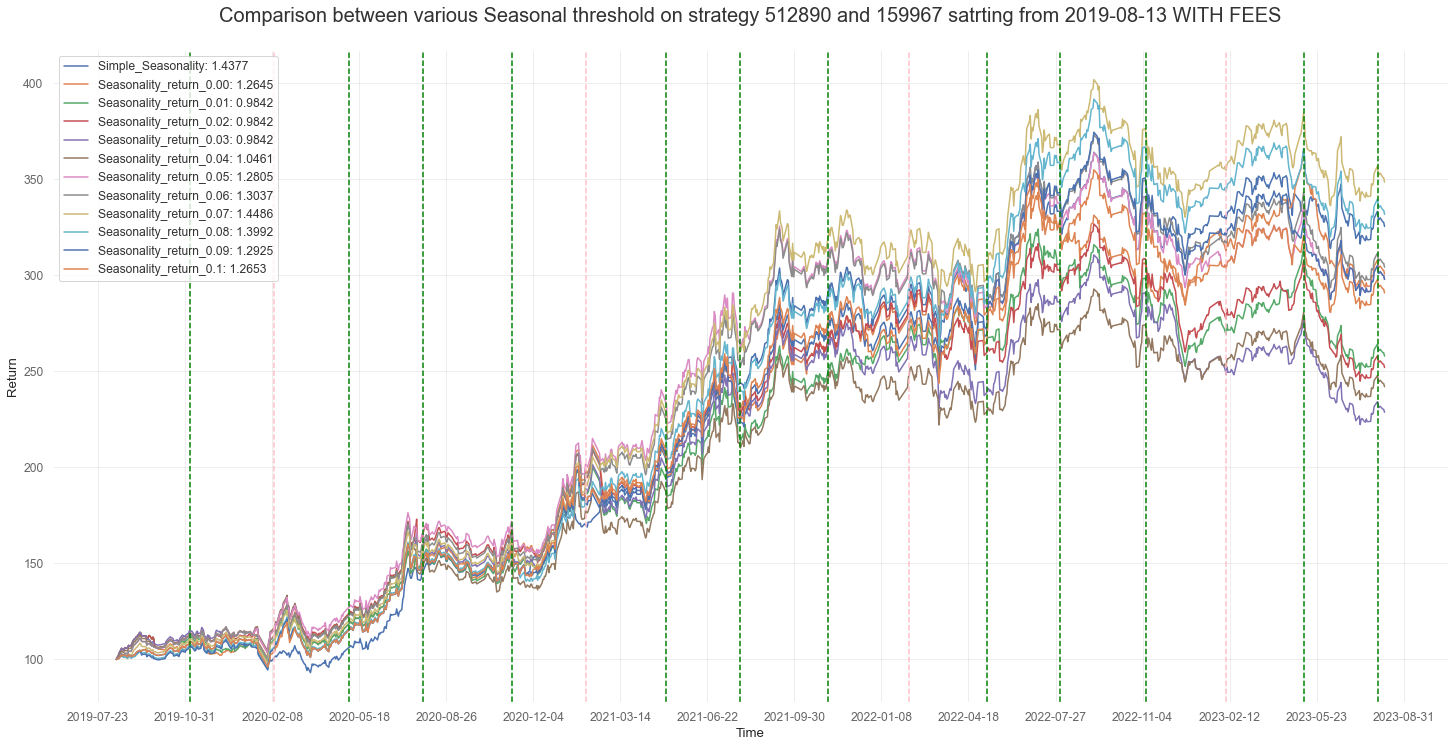

In [1809]:
_ = plt.figure(figsize=(25, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(seasonal_df_count['Seasonal_result'].index),seasonal_df_count['Seasonal_result'].values)
_ = plt.plot(np.array(df_21_count['signal_return_21'].index),df_21_count['signal_return_21'].values)
_ = plt.plot(np.array(df_1['Seasonal_result'].index),df_1['Seasonal_result'].values)
_ = plt.plot(np.array(df_2['Seasonal_result'].index),df_2['Seasonal_result'].values)
_ = plt.plot(np.array(df_3['Seasonal_result'].index),df_3['Seasonal_result'].values)
_ = plt.plot(np.array(df_4['Seasonal_result'].index),df_4['Seasonal_result'].values)
_ = plt.plot(np.array(df_5['Seasonal_result'].index),df_5['Seasonal_result'].values)
_ = plt.plot(np.array(df_6['Seasonal_result'].index),df_6['Seasonal_result'].values)
_ = plt.plot(np.array(df_7['Seasonal_result'].index),df_7['Seasonal_result'].values)
_ = plt.plot(np.array(df_8['Seasonal_result'].index),df_8['Seasonal_result'].values)
_ = plt.plot(np.array(df_9['Seasonal_result'].index),df_9['Seasonal_result'].values)
_ = plt.plot(np.array(df_10['Seasonal_result'].index),df_10['Seasonal_result'].values)


_ = plt.legend([f'Simple_Seasonality: {round(Test.get_Sharpe(seasonal_df_count, "Seasonal_result"),4)}',
                f'Seasonality_return_0.00: {round(Test.get_Sharpe(df_21_count, "signal_return_21"),4)}',
                f'Seasonality_return_0.01: {round(Test.get_Sharpe(df_3, "Seasonal_result"),4)}',
                f'Seasonality_return_0.02: {round(Test.get_Sharpe(df_3, "Seasonal_result"),4)}',
                f'Seasonality_return_0.03: {round(Test.get_Sharpe(df_3, "Seasonal_result"),4)}', 
                f'Seasonality_return_0.04: {round(Test.get_Sharpe(df_4, "Seasonal_result"),4)}',
                f'Seasonality_return_0.05: {round(Test.get_Sharpe(df_5, "Seasonal_result"),4)}',
                f'Seasonality_return_0.06: {round(Test.get_Sharpe(df_6, "Seasonal_result"),4)}',
                f'Seasonality_return_0.07: {round(Test.get_Sharpe(df_7, "Seasonal_result"),4)}',
                f'Seasonality_return_0.08: {round(Test.get_Sharpe(df_8, "Seasonal_result"),4)}',
                f'Seasonality_return_0.09: {round(Test.get_Sharpe(df_9, "Seasonal_result"),4)}',
                f'Seasonality_return_0.1: {round(Test.get_Sharpe(df_10, "Seasonal_result"),4)}']) 


for i in [116, 359, 602, 845]:
    plt.axvline(x=seasonal_df.index[i], color='pink', linestyle='--')
for i in [55, 174, 233, 299, 417, 477, 541, 660, 719, 784, 904, 963]:
    plt.axvline(x=seasonal_df.index[i], color='green', linestyle='--')


plt.title('Comparison between various Seasonal threshold on strategy 512890 and 159967 satrting from 2019-08-13 WITH FEES\n', fontsize=20)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

# 帮王丁打工的部分

In [372]:
cnxn_jydb = pyodbc.connect('Driver={SQL Server};Server=192.168.0.144;Database=jydb;uid=zxing;pwd=zxing321')

def read_jydb(sql_query):
    return pd.read_sql(sql_query, cnxn_jydb)

def get_etf_daybar(secucode, begindate, enddate):
    sql_query = f"""
    SELECT b.[SecuCode] as 'secucode'
          ,[TradingDay] as 'tradingday'
          ,[OpenPrice] as 'open'
          ,[HighPrice] as 'high'
          ,[LowPrice] as 'low'
          ,[ClosePrice] as 'close'
          ,[TurnoverVolume] as 'volume'
          ,[TurnoverValue] as 'turnover'
          ,[PrevClosePrice] as 'prev_close'
    FROM [jydb].[dbo].QT_FundsPerformanceHis a ,SecuMain b
    where b.SecuCode = '{secucode}' and (TradingDay between '{begindate}' and '{enddate}') 
    and b.InnerCode = a.InnerCode and b.SecuCategory = 8
    order by TradingDay asc
    """

    df = read_jydb(sql_query)
    df['str_date'] = df['tradingday'].apply(lambda x: x.strftime('%Y%m%d'))
    df.set_index('tradingday', inplace=True, drop=True)
    return df

In [408]:
name = '510050'

df = get_etf_daybar(f'{name}', '20050204', '20230803')
df = df [['open', 'high', 'low', 'close', 'prev_close']]

# Specify the directory path and file name for saving the Feather file
directory_path = r"C:\Users\ps\PycharmProjects\TreeEngine"
file_name = f"{name}.pkl"

# Create the directory if it doesn't exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Save the DataFrame to a Feather file
df.to_pickle(os.path.join(directory_path, file_name))


In [401]:
df_510050 = pd.read_pickle(r"C:\Users\ps\PycharmProjects\TreeEngine\510500.pkl")
df_510050['510500'] = df_510050[['close']]
df_510050 = df_510050[['510500']]
df_510050

510500
tradingday        
2013-03-15   0.970
2013-03-18   0.954
2013-03-19   0.960
2013-03-20   0.985
2013-03-21   0.995
...            ...
2023-07-28   6.157
2023-07-31   6.196
2023-08-01   6.201
2023-08-02   6.179
2023-08-03   6.200

[2527 rows x 1 columns]

In [414]:
df_510050 = pd.read_pickle(r"C:\Users\ps\PycharmProjects\TreeEngine\510050.pkl")
df_510050['510050'] = df_510050[['close']]
df_510050 = df_510050[['510050']]

df_510300 = pd.read_pickle(r"C:\Users\ps\PycharmProjects\TreeEngine\510300.pkl")
df_510300['510300'] = df_510300[['close']]
df_510300 = df_510300[['510300']]

df_159915 = pd.read_pickle(r"C:\Users\ps\PycharmProjects\TreeEngine\159915.pkl")
df_159915['159915'] = df_159915[['close']]
df_159915 = df_159915[['159915']]

df_159901 = pd.read_pickle(r"C:\Users\ps\PycharmProjects\TreeEngine\159901.pkl")
df_159901['159901'] = df_159901[['close']]
df_159901 = df_159901[['159901']]

df_588000 = pd.read_pickle(r"C:\Users\ps\PycharmProjects\TreeEngine\588000.pkl")
df_588000['588000'] = df_588000[['close']]
df_588000 = df_588000[['588000']]

df_510500 = pd.read_pickle(r"C:\Users\ps\PycharmProjects\TreeEngine\510500.pkl")
df_510500['510500'] = df_510500[['close']]
df_510500 = df_510500[['510500']]



In [415]:
len(df_510050), len(df_510300), len(df_159915), len(df_159901), len(df_588000), len(df_510500)

(4487, 2722, 2831, 4203, 661, 2527)

In [416]:
result = pd.concat([df_588000, df_510050, df_510300, df_159915, df_159901, df_510500], ignore_index=False, axis=1)
result = result.iloc[-661:,:]
result

588000  510050  510300  159915  159901  510500
tradingday                                                
2020-11-16   1.465   3.429   4.973   2.620   7.305   7.039
2020-11-17   1.436   3.430   4.964   2.572   7.275   6.992
2020-11-18   1.424   3.435   4.957   2.534   7.212   6.986
2020-11-19   1.438   3.460   4.999   2.556   7.307   7.025
2020-11-20   1.435   3.465   5.014   2.576   7.318   7.084
...            ...     ...     ...     ...     ...     ...
2023-07-28   1.007   2.727   4.068   2.163   2.941   6.157
2023-07-31   1.015   2.731   4.084   2.182   2.960   6.196
2023-08-01   1.014   2.723   4.066   2.168   2.941   6.201
2023-08-02   1.012   2.698   4.037   2.164   2.930   6.179
2023-08-03   1.015   2.723   4.073   2.187   2.953   6.200

[661 rows x 6 columns]

In [420]:
result.columns

Index(['588000', '510050', '510300', '159915', '159901', '510500'], dtype='object')

In [417]:
# Specify the directory path and file name for saving the Feather file
directory_path = r"C:\Users\ps\PycharmProjects\TreeEngine"
file_name = "five_ETFs.pkl"

# Create the directory if it doesn't exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Save the DataFrame to a Feather file
result.to_pickle(os.path.join(directory_path, file_name))

In [418]:
test_df_two = pd.read_pickle(r"C:\Users\ps\PycharmProjects\TreeEngine\five_ETFs.pkl")
test_df_two

588000  510050  510300  159915  159901  510500
tradingday                                                
2020-11-16   1.465   3.429   4.973   2.620   7.305   7.039
2020-11-17   1.436   3.430   4.964   2.572   7.275   6.992
2020-11-18   1.424   3.435   4.957   2.534   7.212   6.986
2020-11-19   1.438   3.460   4.999   2.556   7.307   7.025
2020-11-20   1.435   3.465   5.014   2.576   7.318   7.084
...            ...     ...     ...     ...     ...     ...
2023-07-28   1.007   2.727   4.068   2.163   2.941   6.157
2023-07-31   1.015   2.731   4.084   2.182   2.960   6.196
2023-08-01   1.014   2.723   4.066   2.168   2.941   6.201
2023-08-02   1.012   2.698   4.037   2.164   2.930   6.179
2023-08-03   1.015   2.723   4.073   2.187   2.953   6.200

[661 rows x 6 columns]

In [422]:
import pandas as pd

# Create a sample DataFrame
data = {
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
}

df = pd.DataFrame(data)

# Retrieve a specific column as a DataFrame using loc
specific_column_df = df.loc[:, ['B']]

print(specific_column_df)


   B
0  4
1  5
2  6


In [343]:
test = Rolling.get_index_data('000300')
df_000300 = pd.DataFrame()
df_000300['tradingday'] = test['TradingDay']
df_000300['open'] = test['OpenPrice']
df_000300['high'] = test['HighPrice']
df_000300['low'] = test['LowPrice']
df_000300['close'] = test['ClosePrice']
df_000300['prev_close'] = test['PrevClosePrice']
df_000300.set_index('tradingday', inplace=True)


In [342]:
test = Rolling.get_index_data('000852')
df_000852 = pd.DataFrame()
df_000852['tradingday'] = test['TradingDay']
df_000852['open'] = test['OpenPrice']
df_000852['high'] = test['HighPrice']
df_000852['low'] = test['LowPrice']
df_000852['close'] = test['ClosePrice']
df_000852['prev_close'] = test['PrevClosePrice']
df_000852.set_index('tradingday', inplace=True)

In [445]:
import pandas as pd
import os

# Assuming you have the DataFrame 'df' defined and you want to save it to 'test.feather'

# # Reset the index of the DataFrame
# df = df.reset_index()

# Specify the directory path and file name for saving the Feather file
directory_path = r"C:\Users\ps\PycharmProjects\TreeEngine"
file_name = "commodity_trimmed.pkl"

# Create the directory if it doesn't exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Save the DataFrame to a Feather file
result.to_pickle(os.path.join(directory_path, file_name))


In [276]:
df = df[['etf_510050', 'etf_510300', 'etf_159915','etf_159901']].iloc[2000:,:]


In [278]:
df.columns

Index(['index', 'etf_510050', 'etf_510300', 'etf_159915', 'etf_159901'], dtype='object')

In [426]:
name = 'AG'
df_AG = pd.read_pickle(fr"\\192.168.0.88\Public\OptionDesk\DATA\ResearchData\FactorModel\day\{name}\{name}_main.pkl")

name = 'AL'
df_AL = pd.read_pickle(fr"\\192.168.0.88\Public\OptionDesk\DATA\ResearchData\FactorModel\day\{name}\{name}_main.pkl")

name = 'AU'
df_AU = pd.read_pickle(fr"\\192.168.0.88\Public\OptionDesk\DATA\ResearchData\FactorModel\day\{name}\{name}_main.pkl")

name = 'C'
df_SC = pd.read_pickle(fr"\\192.168.0.88\Public\OptionDesk\DATA\ResearchData\FactorModel\day\{name}\{name}_main.pkl")

name = 'CF'
df_SC = pd.read_pickle(fr"\\192.168.0.88\Public\OptionDesk\DATA\ResearchData\FactorModel\day\{name}\{name}_main.pkl")

name = 'CU'
df_SC = pd.read_pickle(fr"\\192.168.0.88\Public\OptionDesk\DATA\ResearchData\FactorModel\day\{name}\{name}_main.pkl")

name = 'I'
df_SC = pd.read_pickle(fr"\\192.168.0.88\Public\OptionDesk\DATA\ResearchData\FactorModel\day\{name}\{name}_main.pkl")

name = 'M'
df_SC = pd.read_pickle(fr"\\192.168.0.88\Public\OptionDesk\DATA\ResearchData\FactorModel\day\{name}\{name}_main.pkl")

name = 'MA'
df_SC = pd.read_pickle(fr"\\192.168.0.88\Public\OptionDesk\DATA\ResearchData\FactorModel\day\{name}\{name}_main.pkl")

name = 'OI'
df_SC = pd.read_pickle(fr"\\192.168.0.88\Public\OptionDesk\DATA\ResearchData\FactorModel\day\{name}\{name}_main.pkl")

name = 'P'
df_SC = pd.read_pickle(fr"\\192.168.0.88\Public\OptionDesk\DATA\ResearchData\FactorModel\day\{name}\{name}_main.pkl")

name = 'RB'
df_SC = pd.read_pickle(fr"\\192.168.0.88\Public\OptionDesk\DATA\ResearchData\FactorModel\day\{name}\{name}_main.pkl")

name = 'RU'
df_SC = pd.read_pickle(fr"\\192.168.0.88\Public\OptionDesk\DATA\ResearchData\FactorModel\day\{name}\{name}_main.pkl")

name = 'SC'
df_SC = pd.read_pickle(fr"\\192.168.0.88\Public\OptionDesk\DATA\ResearchData\FactorModel\day\{name}\{name}_main.pkl")

name = 'SR'
df_SC = pd.read_pickle(fr"\\192.168.0.88\Public\OptionDesk\DATA\ResearchData\FactorModel\day\{name}\{name}_main.pkl")

name = 'TA'
df_SC = pd.read_pickle(fr"\\192.168.0.88\Public\OptionDesk\DATA\ResearchData\FactorModel\day\{name}\{name}_main.pkl")






In [427]:
result = pd.DataFrame()
result['AU'] = df_AU['close']
result['CU'] = df_CU['close']
result['I'] = df_I['close']
result['SC'] = df_SC['close']

In [443]:
result = result.iloc[2483:,:]

In [444]:
result

AU       CU      I     SC
TradingDay                               
2018-03-26  276.15  49000.0  439.0  429.9
2018-03-27  275.80  49620.0  444.0  424.0
2018-03-28  274.20  49260.0  438.5  410.4
2018-03-29  271.05  49880.0  441.0  409.7
2018-03-30  271.55  50180.0  443.5  420.3
...            ...      ...    ...    ...
2023-05-18  449.40  65760.0  746.5  518.0
2023-05-19  447.62  65550.0  736.0  523.9
2023-05-22  449.54  64860.0  716.0  507.0
2023-05-23  447.62  64220.0  707.0  515.5
2023-05-24  449.90  63850.0  682.5  527.0

[1254 rows x 4 columns]

In [446]:
result.columns

Index(['AU', 'CU', 'I', 'SC'], dtype='object')

In [448]:
name = '510050'

df = get_etf_daybar(f'{name}', '20050204', '20230803')
df_mine = Rolling.get_ETF_data(f'{name}')

In [449]:
df_mine.iloc[]

InnerCode InfoPublDate InfoSource    EndDate            NV  UnitNV  \
0          2997   2004-12-31      基金净值表 2004-12-30  5.435331e+09   1.000   
1          2997   2005-01-01    基金资产净值表 2004-12-31  5.415310e+09   0.996   
2          2997   2005-01-08    基金资产净值表 2005-01-07  5.332593e+09   0.981   
3          2997   2005-01-15    基金资产净值表 2005-01-14  5.344723e+09   0.983   
4          2997   2005-01-22    基金资产净值表 2005-01-21  5.367499e+09   0.988   
...         ...          ...        ...        ...           ...     ...   
4519       2997   2023-08-02       华夏基金 2023-08-01           NaN   2.725   
4520       2997   2023-08-03       华夏基金 2023-08-02           NaN   2.699   
4521       2997   2023-08-04    华夏基金APP 2023-08-03           NaN   2.724   
4522       2997   2023-08-05       华夏基金 2023-08-04           NaN   2.728   
4523       2997   2023-08-08    华夏基金APP 2023-08-07           NaN   2.713   

      AccumulatedUnitNV  
0                 1.000  
1                 0.996  
2                 0.981  
3                 0.983  
4                 0.988  
...                 ...  
4519              3.963  
4520              3.933  
4521              3.962  
4522              3.967  
4523              3.949  

[4524 rows x 7 columns]

In [452]:
df = df.sort_index()

In [453]:
df

secucode   open   high    low  close       volume      turnover  \
tradingday                                                                   
2005-02-23   510050  0.881  0.882  0.866  0.876  126974.2542  1.111793e+09   
2005-02-24   510050  0.876  0.876  0.868  0.876   45161.4223  3.941412e+08   
2005-02-25   510050  0.877  0.887  0.875  0.880   50646.0695  4.465980e+08   
2005-02-28   510050  0.878  0.879  0.870  0.872   18796.5193  1.644675e+08   
2005-03-01   510050  0.870  0.873  0.865  0.867   20809.4456  1.805736e+08   
...             ...    ...    ...    ...    ...          ...           ...   
2023-07-28   510050  2.637  2.736  2.637  2.727  111756.6551  3.017760e+09   
2023-07-31   510050  2.746  2.783  2.723  2.731   97658.5156  2.682261e+09   
2023-08-01   510050  2.727  2.750  2.716  2.723   71185.8665  1.941419e+09   
2023-08-02   510050  2.718  2.731  2.690  2.698   85880.7185  2.322575e+09   
2023-08-03   510050  2.696  2.725  2.690  2.723   80158.4392  2.171835e+09   

            prev_close  str_date  
tradingday                        
2005-02-23       0.887  20050223  
2005-02-24       0.876  20050224  
2005-02-25       0.876  20050225  
2005-02-28       0.880  20050228  
2005-03-01       0.872  20050301  
...                ...       ...  
2023-07-28       2.653  20230728  
2023-07-31       2.727  20230731  
2023-08-01       2.731  20230801  
2023-08-02       2.723  20230802  
2023-08-03       2.698  20230803  

[4487 rows x 9 columns]

In [363]:
import requests
import time

url = 'http://api.github.com/users/ssaunier'
max_retries = 3
retry_delay = 5

for _ in range(max_retries):
    try:
        response = requests.get(url).json()
        print(response['name'])
        break  # Break the loop if successful
    except requests.exceptions.SSLError as e:
        print("SSL Error:", e)
        print("Retrying in", retry_delay, "seconds...")
        time.sleep(retry_delay)
else:
    print("Max retries exceeded. Could not fetch data.")


Sébastien Saunier


# Some Adjustments(1)

In [1941]:
Daily_Return = Rolling.get_data(['512890', '159967'])
data_table = Rolling.single_window_table(Daily_Return, [21], 2)
data_table = data_table.iloc[124:-4,:]
data_table['signal_return_21'] = data_table['signal_return_21']/data_table['signal_return_21'][0]*100

Here at starting from the longest period


In [1942]:
position_num1 = -4
position_num2 = -2
modified_arr_name = 'arr'
return_column_name = 'signal_return_21'

df_21_og = position_change_count(data_table, position_num1, position_num2, modified_arr_name, return_column_name)

This strategy changes 19 positions annually and the total Position change is 75.0
The final return after fees is 301.28% which is 33.14% annually
Additional return: 191.28%
Additional annual return: 29.25%
Max Drawdown: -20.25%
Annualized Volatility: 25.0%
Sharpe: 1.2656
Win Rate: 53.04%



In [1943]:
data_table['etf_512890_return'] = np.cumprod(data_table['etf_512890_day_return']+1, axis=0)*100
data_table['etf_512890_return'] = data_table['etf_512890_return']/data_table['etf_512890_return'][0]*100
data_table['etf_512890_day_arr'] = 1 + data_table['etf_512890_day_return']

data_table['etf_159967_return'] = np.cumprod(data_table['etf_159967_day_return']+1, axis=0)*100
data_table['etf_159967_return'] = data_table['etf_159967_return']/data_table['etf_159967_return'][0]*100
data_table['etf_159967_day_arr'] = 1 + data_table['etf_159967_day_return']

In [1944]:
position_num1 = 100
position_num2 = 100
modified_arr_name = 'etf_512890_day_arr'
return_column_name = 'etf_512890_return'

data_table = position_change_count(data_table, position_num1, position_num2, modified_arr_name, return_column_name)

The final return after fees is 173.36% which is 15.35% annually
Additional return: 63.36%
Additional annual return: 11.46%
Max Drawdown: -16.52%
Annualized Volatility: 18.0%
Sharpe: 0.8962
Win Rate: 51.8%



In [1945]:
position_num1 = 100
position_num2 = 100
modified_arr_name = 'etf_159967_day_arr'
return_column_name = 'etf_159967_return'

data_table = position_change_count(data_table, position_num1, position_num2, modified_arr_name, return_column_name)

The final return after fees is 175.06% which is 15.64% annually
Additional return: 65.06%
Additional annual return: 11.75%
Max Drawdown: -43.42%
Annualized Volatility: 30.0%
Sharpe: 0.639
Win Rate: 52.42%



In [1946]:
test = Rolling.get_index_data('000300')
test.set_index('TradingDay', inplace=True)
test = test.sort_index()

df_000300 = pd.DataFrame(index=test.index)

df_000300['close'] = test['ClosePrice']
df_000300['prev_close'] = test['PrevClosePrice']
df_000300 = df_000300.iloc[len(df_000300)-len(data_table)-4:-4,:]
df_000300['daily_return'] = (df_000300['close']-df_000300['prev_close'])/df_000300['prev_close']


df_000300['000300_return'] = np.cumprod(df_000300['daily_return']+1, axis=0)*100
df_000300['000300_return'] = df_000300['000300_return']/df_000300['000300_return'][0]*100

df_000300['daily_arr']  = df_000300['daily_return'] + 1

In [1947]:
position_num1 = 100
position_num2 = 100
modified_arr_name = 'daily_arr'
return_column_name = '000300_return'

data_000300 = position_change_count(df_000300, position_num1, position_num2, modified_arr_name, return_column_name)

The final return after fees is 107.48% which is 1.89% annually
Additional return: -2.52%
Additional annual return: -2.0%
Max Drawdown: -39.59%
Annualized Volatility: 19.0%
Sharpe: 0.1937
Win Rate: 51.08%



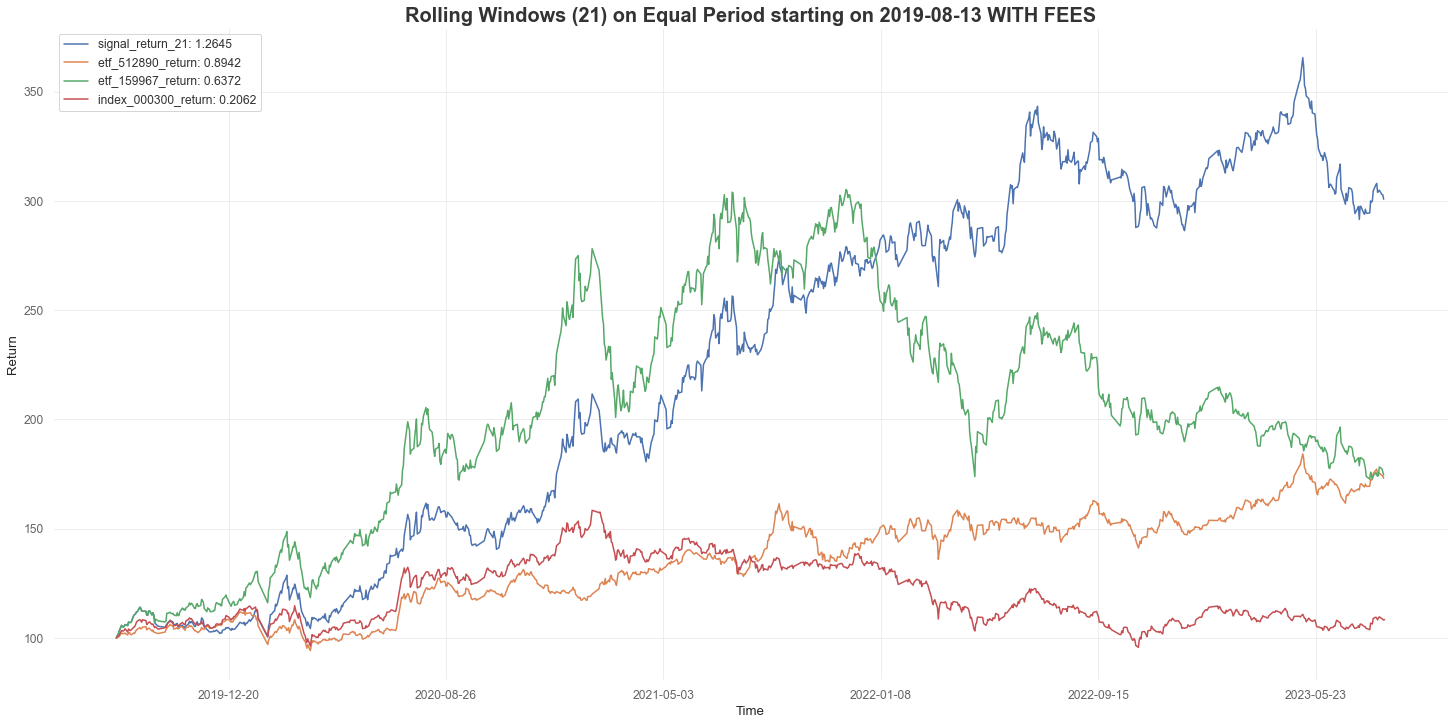

In [1876]:
_ = plt.figure(figsize=(25, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(df_21_og['signal_return_21'].index),df_21_og['signal_return_21'].values)
_ = plt.plot(np.array(data_table['etf_512890_return'].index),data_table['etf_512890_return'] .values)
_ = plt.plot(np.array(data_table['etf_159967_return'].index),data_table['etf_159967_return'].values)
_ = plt.plot(np.array(data_000300['000300_return'].index),data_000300['000300_return'].values)


_ = plt.legend([f'signal_return_21: {round(Test.get_Sharpe(df_21_og, "signal_return_21"), 4)}', f'etf_512890_return: {round(Test.get_Sharpe(data_table, "etf_512890_return"), 4)}', 
                f'etf_159967_return: {round(Test.get_Sharpe(data_table, "etf_159967_return"), 4)}', f'index_000300_return: {round(Test.get_Sharpe(data_000300, "000300_return"), 4)}'])

plt.title('Rolling Windows (21) on Equal Period starting on 2019-08-13 WITH FEES', fontsize=20, fontweight='bold')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(250))

In [1948]:
data_table

etf_512890  etf_159967  etf_512890_day_return  \
EndDate                                                     
2019-08-13      1.0970      1.0336              -0.004989   
2019-08-14      1.0989      1.0446               0.001732   
2019-08-15      1.1033      1.0496               0.004004   
2019-08-16      1.1028      1.0645              -0.000453   
2019-08-19      1.1224      1.0933               0.017773   
...                ...         ...                    ...   
2023-08-04      1.9246      1.8425               0.001770   
2023-08-07      1.9122      1.8334              -0.006443   
2023-08-08      1.9112      1.8199              -0.000523   
2023-08-09      1.8986      1.8050              -0.006593   
2023-08-10      1.9018      1.8094               0.001685   

            etf_159967_day_return  etf_512890_day_return_21  \
EndDate                                                       
2019-08-13              -0.008537                  0.963126   
2019-08-14               0.010642                  0.964709   
2019-08-15               0.004787                  0.976804   
2019-08-16               0.014196                  0.966013   
2019-08-19               0.027055                  0.990120   
...                           ...                       ...   
2023-08-04               0.022191                  1.048486   
2023-08-07              -0.004939                  1.038111   
2023-08-08              -0.007363                  1.035320   
2023-08-09              -0.008187                  1.032072   
2023-08-10               0.002438                  1.018640   

            etf_159967_day_return_21  signal_512890  signal_159967  \
EndDate                                                              
2019-08-13                  0.993942            0.0            1.0   
2019-08-14                  1.003940            0.0            1.0   
2019-08-15                  1.024900            0.0            1.0   
2019-08-16                  1.028502            0.0            1.0   
2019-08-19                  1.071548            0.0            1.0   
...                              ...            ...            ...   
2023-08-04                  0.987724            1.0            0.0   
2023-08-07                  0.975213            1.0            0.0   
2023-08-08                  0.965055            1.0            0.0   
2023-08-09                  0.976573            1.0            0.0   
2023-08-10                  0.958927            1.0            0.0   

            signal_return_21       arr  position_change  Previous_Peak  \
EndDate                                                                  
2019-08-13        100.000000  0.991463              0.0     100.000000   
2019-08-14        101.064241  1.010642              0.0     101.064241   
2019-08-15        101.547988  1.004787              0.0     101.547988   
2019-08-16        102.989551  1.014196              0.0     102.989551   
2019-08-19        105.775929  1.027055              0.0     105.775929   
...                      ...       ...              ...            ...   
2023-08-04        304.890246  1.001770              0.0     305.224458   
2023-08-07        302.925869  0.993557              0.0     305.224458   
2023-08-08        302.767452  0.999477              0.0     305.224458   
2023-08-09        300.771392  0.993407              0.0     305.224458   
2023-08-10        301.278328  1.001685              0.0     305.224458   

            Drawdown  etf_512890_return  etf_512890_day_arr  \
EndDate                                                       
2019-08-13  0.000000         100.000000            0.995011   
2019-08-14  0.000000         100.173200            1.001732   
2019-08-15  0.000000         100.574294            1.004004   
2019-08-16  0.000000         100.528715            0.999547   
2019-08-19  0.000000         102.315406            1.017773   
...              ...                ...                 ...   
2023-08-04 -0.415969

# Some Adjustment(2)

In [1920]:
Daily_Return = Rolling.get_data(['512480', '588080', '515790', '159869', '159865', '512170', '512690', '512980', '515080', '516950'])
data_table = Rolling.single_window_table(Daily_Return, [21], 10)
data_table = data_table.iloc[791:,:]
data_table['signal_return_21'] = data_table['signal_return_21']/data_table['signal_return_21'][0]*100

Here at starting from the longest period


In [1878]:
data_table

etf_512980  etf_512480  etf_588080  etf_515790  etf_159869  \
EndDate                                                                  
2021-05-14      0.8037      1.9642      0.9301      1.0746      0.9410   
2021-05-17      0.8112      1.9694      0.9504      1.1062      0.9387   
2021-05-18      0.8170      1.9568      0.9451      1.1015      0.9411   
2021-05-19      0.8159      1.9824      0.9482      1.1194      0.9402   
2021-05-20      0.8232      1.9690      0.9510      1.1077      0.9532   
...                ...         ...         ...         ...         ...   
2023-08-09      0.8243      1.7346      0.6870      1.1538      1.1952   
2023-08-10      0.8258      1.7398      0.6884      1.1672      1.2050   
2023-08-11      0.8143      1.6998      0.6739      1.1407      1.1938   
2023-08-14      0.8383      1.6864      0.6679      1.1332      1.2407   
2023-08-15      0.8184      1.6476      0.6586      1.1040      1.2040   

            etf_159865  etf_512170  etf_512690  etf_515080  etf_516950  ...  \
EndDate                                                                 ...   
2021-05-14      0.8901      2.5506      2.6960      1.4458      1.0073  ...   
2021-05-17      0.8963      2.6196      2.7482      1.4445      1.0087  ...   
2021-05-18      0.8935      2.6034      2.7612      1.4523      1.0068  ...   
2021-05-19      0.8836      2.5794      2.7322      1.4519      1.0009  ...   
2021-05-20      0.8893      2.6121      2.7920      1.4334      0.9978  ...   
...                ...         ...         ...         ...         ...  ...   
2023-08-09      0.7045      1.2600      2.3740      1.7090      1.1351  ...   
2023-08-10      0.7075      1.2645      2.3700      1.7152      1.1346  ...   
2023-08-11      0.6906      1.2450      2.3316      1.6922      1.1063  ...   
2023-08-14      0.6882      1.2423      2.3104      1.6913      1.1174  ...   
2023-08-15      0.6862      1.2324      2.3064      1.7013      1.1159  ...   

            signal_588080  signal_515790  signal_159869  signal_159865  \
EndDate                                                                  
2021-05-14            0.0            0.0            0.0            0.0   
2021-05-17            0.0            0.0            0.0            0.0   
2021-05-18            0.0            0.0            0.0            0.0   
2021-05-19            0.0            0.0            0.0            0.0   
2021-05-20            0.0            0.0            0.0            0.0   
...                   ...            ...            ...            ...   
2023-08-09            0.0            0.0            0.0            0.0   
2023-08-10            0.0            0.0            0.0            0.0   
2023-08-11            0.0            0.0            0.0            0.0   
2023-08-14            0.0            0.0            0.0            0.0   
2023-08-15            0.0            0.0            0.0            0.0   

            signal_512170  signal_512690  signal_515080  signal_516950  \
EndDate                                                                  
2021-05-14            1.0            0.0            0.0            0.0   
2021-05-17            1.0            0.0            0.0            0.0   
2021-05-18            1.0            0.0            0.0            0.0   
2021-05-19            1.0            0.0            0.0            0.0   
2021-05-20            1.0            0.0            0.0            0.0   
...                   ...            ...            ...            ...   
2023-08-09            0.0            1.0            0.0            0.0   
2023-08-10            0.0            1.0            0.0            0.0   
2023-08-11            0.0            1.0            0.0            0.0   
2023-08-14            0.0            1.0            0.0            0.0   
2023-08-15            0.0            1.0            0.0            0.0   

            signal_return_21       arr  
EndDate                                 
2021-05-14   

In [1926]:
test = Rolling.get_index_data('000300')
test.set_index('TradingDay', inplace=True)
test = test.sort_index()

df_000300 = pd.DataFrame(index=test.index)

df_000300['close'] = test['ClosePrice']
df_000300['prev_close'] = test['PrevClosePrice']
df_000300 = df_000300.iloc[len(df_000300)-len(data_table)+1:-1,:]
df_000300['daily_return'] = (df_000300['close']-df_000300['prev_close'])/df_000300['prev_close']


df_000300['000300_return'] = np.cumprod(df_000300['daily_return']+1, axis=0)*100
df_000300['000300_return'] = df_000300['000300_return']/df_000300['000300_return'][0]*100

df_000300['daily_arr']  = df_000300['daily_return'] + 1

In [1927]:
df_000300

close  prev_close  daily_return  000300_return  daily_arr
TradingDay                                                               
2021-05-14  5110.5901   4992.9738      0.023556     100.000000   1.023556
2021-05-17  5184.9853   5110.5901      0.014557     101.455707   1.014557
2021-05-18  5187.6013   5184.9853      0.000505     101.506894   1.000505
2021-05-19  5172.2720   5187.6013     -0.002955     101.206943   0.997045
2021-05-20  5186.4120   5172.2720      0.002734     101.483623   1.002734
...               ...         ...           ...            ...        ...
2023-08-09  3967.5652   3979.7322     -0.003057      77.634189   0.996943
2023-08-10  3975.7166   3967.5652      0.002055      77.793690   1.002055
2023-08-11  3884.2538   3975.7166     -0.023005      76.004018   0.976995
2023-08-14  3855.9061   3884.2538     -0.007298      75.449332   0.992702
2023-08-15  3846.5357   3855.9061     -0.002430      75.265980   0.997570

[550 rows x 5 columns]

In [1928]:
position_num1 = 100
position_num2 = 100
modified_arr_name = 'daily_arr'
return_column_name = '000300_return'

data_000300 = position_change_count(df_000300, position_num1, position_num2, modified_arr_name, return_column_name)

The final return after fees is 75.27% which is -12.21% annually
Additional return: -34.73%
Additional annual return: -16.1%
Max Drawdown: -34.31%
Annualized Volatility: 18.0%
Sharpe: -0.6553
Win Rate: 47.45%



In [1929]:
position_num1 = -12
position_num2 = -2
modified_arr_name = 'arr'
return_column_name = 'signal_return_21'

multi_industry = position_change_count(data_table, position_num1, position_num2, modified_arr_name, return_column_name)

This strategy changes 60 positions annually and the total Position change is 133.0
The final return after fees is 69.12% which is -15.52% annually
Additional return: -40.88%
Additional annual return: -19.41%
Max Drawdown: -59.05%
Annualized Volatility: 37.0%
Sharpe: -0.2764
Win Rate: 47.28%



In [1932]:
data_table['etf_512980_return'] = np.cumprod(data_table['etf_512980_day_return']+1, axis=0)*100
data_table['etf_512980_return'] = data_table['etf_512980_return']/data_table['etf_512980_return'][0]*100

data_table['etf_512480_return'] = np.cumprod(data_table['etf_512480_day_return']+1, axis=0)*100
data_table['etf_512480_return'] = data_table['etf_512480_return']/data_table['etf_512480_return'][0]*100


data_table['etf_588080_return'] = np.cumprod(data_table['etf_588080_day_return']+1, axis=0)*100
data_table['etf_588080_return'] = data_table['etf_588080_return']/data_table['etf_588080_return'][0]*100


data_table['etf_515790_return'] = np.cumprod(data_table['etf_515790_day_return']+1, axis=0)*100
data_table['etf_515790_return'] = data_table['etf_515790_return']/data_table['etf_515790_return'][0]*100


data_table['etf_159869_return'] = np.cumprod(data_table['etf_159869_day_return']+1, axis=0)*100
data_table['etf_159869_return'] = data_table['etf_159869_return']/data_table['etf_159869_return'][0]*100



data_table['etf_159865_return'] = np.cumprod(data_table['etf_159865_day_return']+1, axis=0)*100
data_table['etf_159865_return'] = data_table['etf_159865_return']/data_table['etf_159865_return'][0]*100


data_table['etf_512170_return'] = np.cumprod(data_table['etf_512170_day_return']+1, axis=0)*100
data_table['etf_512170_return'] = data_table['etf_512170_return']/data_table['etf_512170_return'][0]*100


data_table['etf_512690_return'] = np.cumprod(data_table['etf_512690_day_return']+1, axis=0)*100
data_table['etf_512690_return'] = data_table['etf_512690_return']/data_table['etf_512690_return'][0]*100

data_table['etf_515080_return'] = np.cumprod(data_table['etf_515080_day_return']+1, axis=0)*100
data_table['etf_515080_return'] = data_table['etf_515080_return']/data_table['etf_515080_return'][0]*100

data_table['etf_516950_return'] = np.cumprod(data_table['etf_516950_day_return']+1, axis=0)*100
data_table['etf_516950_return'] = data_table['etf_516950_return']/data_table['etf_516950_return'][0]*100



In [1933]:
Sharpe_adj_signal_return_21 = Test.get_Sharpe(data_table, 'signal_return_21')
Sharpe_etf_512980_return = Test.get_Sharpe(data_table, 'etf_512980_return')
Sharpe_etf_512480_return = Test.get_Sharpe(data_table, 'etf_512480_return')

Sharpe_etf_588080_return = Test.get_Sharpe(data_table, 'etf_588080_return')
Sharpe_etf_515790_return = Test.get_Sharpe(data_table, 'etf_515790_return')

Sharpe_etf_159869_return = Test.get_Sharpe(data_table, 'etf_159869_return')
Sharpe_etf_159865_return = Test.get_Sharpe(data_table, 'etf_159865_return')

Sharpe_etf_512170_return = Test.get_Sharpe(data_table, 'etf_512170_return')
Sharpe_etf_512690_return = Test.get_Sharpe(data_table, 'etf_512690_return')

Sharpe_etf_515080_return = Test.get_Sharpe(data_table, 'etf_515080_return')
Sharpe_etf_516950_return = Test.get_Sharpe(data_table, 'etf_516950_return')

Sharpe_000300_return = Test.get_Sharpe(df_000300, '000300_return')

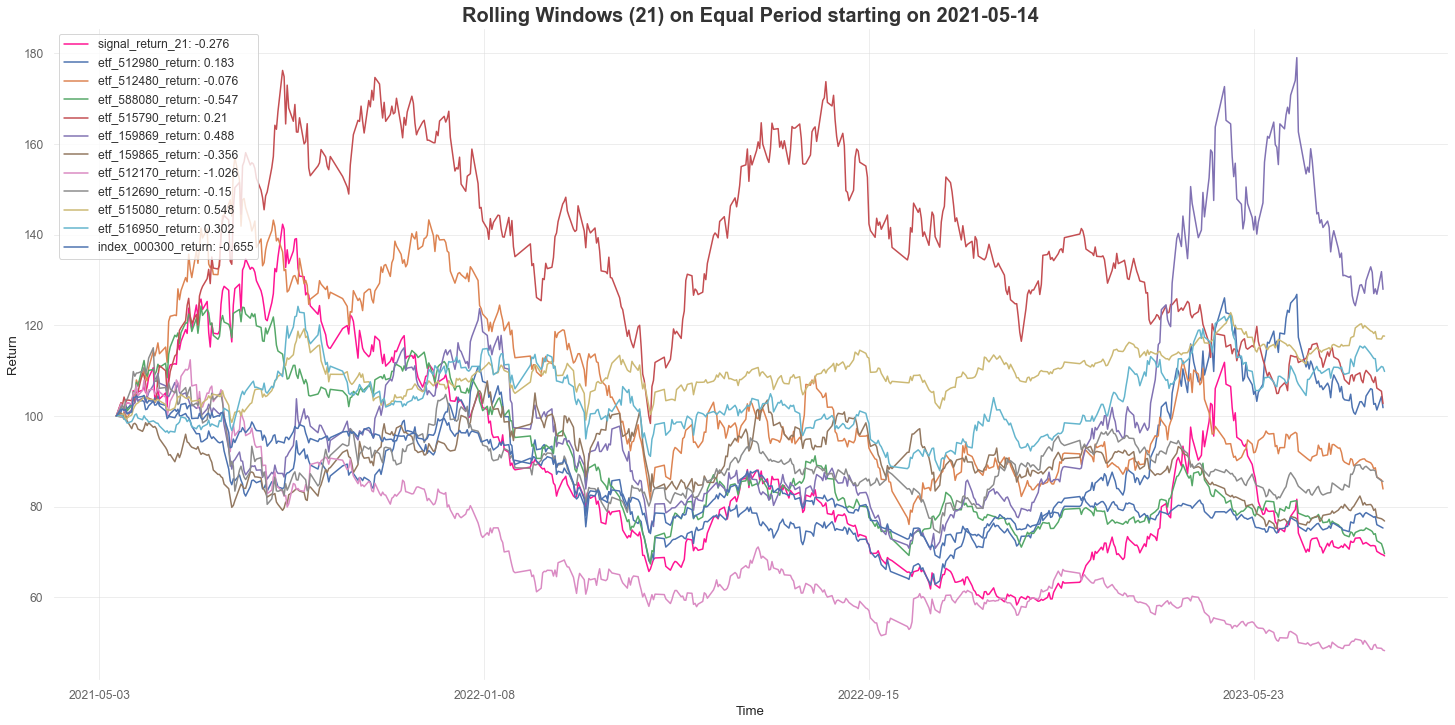

In [1935]:
_ = plt.figure(figsize=(25, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(data_table['signal_return_21'].index),data_table['signal_return_21'].values, color='#FF1493')

_ = plt.plot(np.array(data_table['etf_512980_return'].index),data_table['etf_512980_return'] .values)
_ = plt.plot(np.array(data_table['etf_512480_return'].index),data_table['etf_512480_return'].values)
_ = plt.plot(np.array(data_table['etf_588080_return'].index),data_table['etf_588080_return'] .values)
_ = plt.plot(np.array(data_table['etf_515790_return'].index),data_table['etf_515790_return'].values)
_ = plt.plot(np.array(data_table['etf_159869_return'].index),data_table['etf_159869_return'] .values
)
_ = plt.plot(np.array(data_table['etf_159865_return'].index),data_table['etf_159865_return'].values)
_ = plt.plot(np.array(data_table['etf_512170_return'].index),data_table['etf_512170_return'] .values)
_ = plt.plot(np.array(data_table['etf_512690_return'].index),data_table['etf_512690_return'].values)
_ = plt.plot(np.array(data_table['etf_515080_return'].index),data_table['etf_515080_return'] .values)
_ = plt.plot(np.array(data_table['etf_516950_return'].index),data_table['etf_516950_return'].values)

_ = plt.plot(np.array(df_000300['000300_return'].index),df_000300['000300_return'].values)





_ = plt.legend([f'signal_return_21: {round(Sharpe_adj_signal_return_21, 3)}', f'etf_512980_return: {round(Sharpe_etf_512980_return, 3)}', 
                f'etf_512480_return: {round(Sharpe_etf_512480_return, 3)}', f'etf_588080_return: {round(Sharpe_etf_588080_return, 3)}', 
                f'etf_515790_return: {round(Sharpe_etf_515790_return, 3)}', f'etf_159869_return: {round(Sharpe_etf_159869_return, 3)}', 
                f'etf_159865_return: {round(Sharpe_etf_159865_return, 3)}', f'etf_512170_return: {round(Sharpe_etf_512170_return, 3)}', 
                f'etf_512690_return: {round(Sharpe_etf_512690_return, 3)}', f'etf_515080_return: {round(Sharpe_etf_515080_return, 3)}', 
                f'etf_516950_return: {round(Sharpe_etf_516950_return, 3)}', f'index_000300_return: {round(Sharpe_000300_return, 3)}']) 


plt.title('Rolling Windows (21) on Equal Period starting on 2021-05-14', fontsize=20, fontweight='bold')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(250))

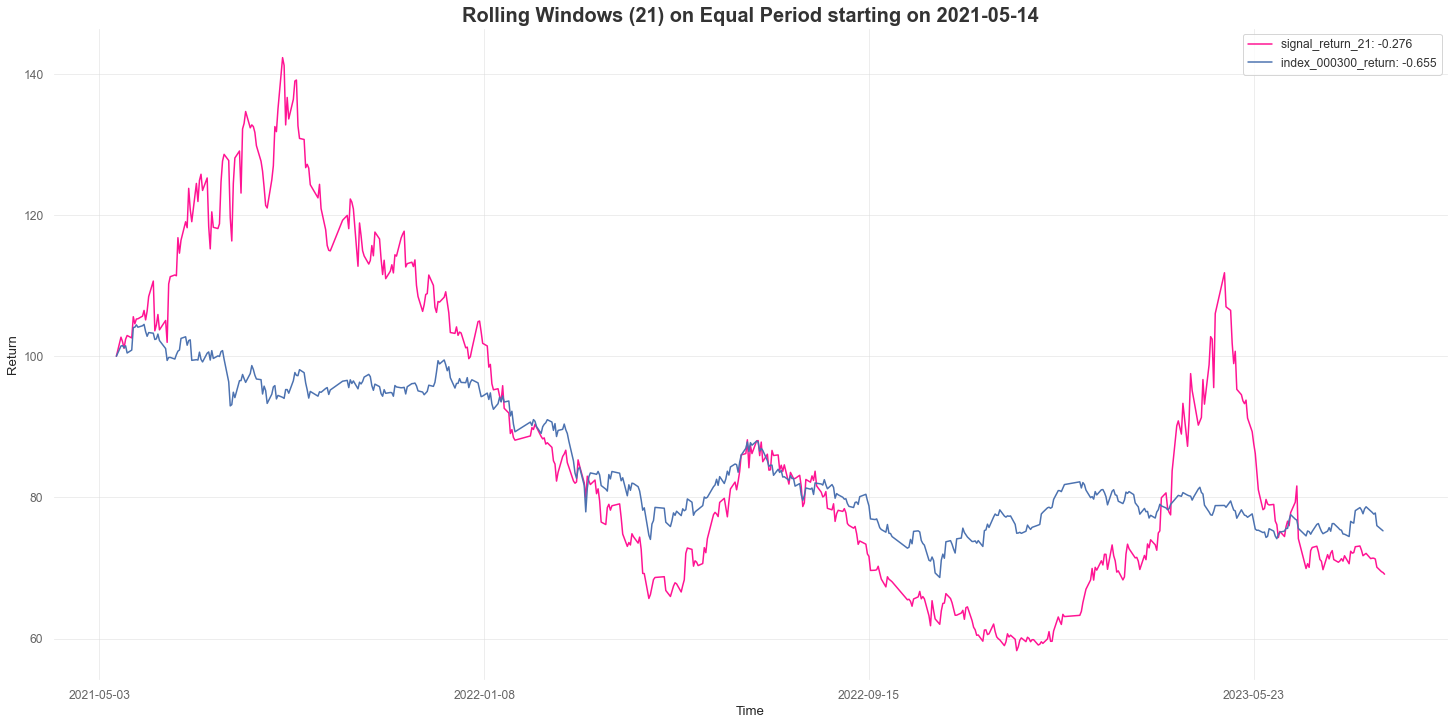

In [1936]:
_ = plt.figure(figsize=(25, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(data_table['signal_return_21'].index),data_table['signal_return_21'].values, color='#FF1493')
_ = plt.plot(np.array(df_000300['000300_return'].index),df_000300['000300_return'].values)





_ = plt.legend([f'signal_return_21: {round(Sharpe_adj_signal_return_21, 3)}', f'index_000300_return: {round(Sharpe_000300_return, 3)}']) 


plt.title('Rolling Windows (21) on Equal Period starting on 2021-05-14', fontsize=20, fontweight='bold')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(250))

# Some Adjustment(3)

In [1937]:
Daily_Return = Rolling.get_data(['512480', '588080', '515790', '159869', '159865', '512170', '512690', '512980', '515080', '516950'])
window_list = [3,6,9,12,15,18,21,24,27]
target_num = 10


plot_df = Rolling.rolling_optimization_table(Daily_Return, window_list, target_num)

Here at starting from the longest period


In [1938]:
def rolling_optimization_table_mod(data, window_list, target_num):
        """

        :param data: DataFrame from get_data
        :param window_list: [3,6,9,12,15,18,21,24,27]
        :param target_num: len(list_of_codes)

        :return: data_table
        """
        # parameter type: list, DataFrame, int
        
        data_table = pd.DataFrame()
        A = target_num
        for i in window_list:
            data_x = data.copy()
            signal_name = []
            
            for num, name in enumerate(data_x.columns[A:]):
                data_x[f'{name}_{str(i)}'] = data_x[data_x.columns[num]].rolling(window=i).apply(lambda x: x[-1]/x[0])
                signal_name.append(f'signal_{data_x.columns[num][4:]}')
            
            data_x = data_x.iloc[i:,:]
            for name in signal_name:
                data_x[name] = [0] * len(data_x)
            
            for row in range(len(data_x)):
                value = data_x.iloc[row][2*A:3*A].max()
                series = data_x.iloc[row]
                try:
                    position = series[2*A:3*A][series == value].idxmax()
                except:
                    continue
                old_position = series.index.get_loc(position)
                new_position = old_position + A
                data_x.loc[data_x.index[row],series.index[new_position]] = 1
            
            for name in data_x.columns[-A:]:
                data_x[name] = data_x[name].shift(1)
            
            data_x = data_x[1:]
            
            data_x[f'signal_return_{str(i)}'] = [0] * len(data_x)
            arr = []

            for row in range(len(data_x)):
                value = data_x.iloc[row][3*A:4*A].max()
                series = data_x.iloc[row]
                ## find the position of signal with 1 
                position = series[3*A:4*A][series == value].idxmax()
                old_position = series.index.get_loc(position)
                new_position = old_position - 2*A
                arr.append(series[new_position] + 1)
                
            data_x['arr'] = arr
            data_x[f'signal_return_{str(i)}'] = np.cumprod(arr, axis=0)*100

            #-----------------------modified sector---------------------------------------#
            position_count_df = data_x.iloc[:,-2-target_num:-2]
            data_x['position_change'] = position_count_df.diff().abs().sum(axis=1)
            data_x['adjusted_arr'] = data_x['arr'] - data_x['position_change']*0.015
            data_x[f'adj_signal_return_{str(i)}'] = np.cumprod(data_x['adjusted_arr'], axis=0)*100

            data_x[f'adj_signal_return_{str(i)}'] = (100/data_x[f'adj_signal_return_{str(i)}'].values[0]) * data_x[f'adj_signal_return_{str(i)}']
            data_table[f'signal_return_{str(i)}'] = data_x[f'adj_signal_return_{str(i)}']
        return data_table, data_x

In [1939]:
len(data_table)

552

# Some Adjustments(4)

In [2028]:
def apply_RSI(target_num, window_list, data_table):
        """
        :param list_of_codes: ['510050', '512890']
        :param window_list: 
        :param data_table: DataFrame

        :return: DataFrame
        """
        
        for name in data_table.iloc[:,:target_num].columns:
            data_table[f'{name}_RSI'] = rsi(data_table[name], window=window_list[0])
        data_table = data_table.iloc[window_list[0]:,:]
        return data_table

In [2029]:
def RSI(data, window_list, target_num):
        """
        :param data: DataFrame from get_data
        :param window_list: [21]
        :param target_num: 2 

        :return: data_list
        """
        # parameter type: list, DataFrame, int
        A = target_num
        for i in window_list:
            data_x = data.copy()
            _data = data.copy()
            data_RSI = apply_RSI(target_num, window_list, _data)
            
            signal_name = []
            for num, name in enumerate(data_x.columns[A:]):
                data_x[f'{name}_{str(i)}'] = data_x[data_x.columns[num]].rolling(window=i).apply(lambda x: x[-1]/x[0])
                signal_name.append(f'signal_{data_x.columns[num][4:]}')
            
            data_x = data_x.iloc[i:,:]
            for name in signal_name:
                data_x[name] = [0] * len(data_x)
    
            ############################################## Modified Zone for RSI ##################################################
            for row in range(len(data_x)):
                a = data_x.iloc[row][2*A:3*A]
                b = data_RSI.iloc[row][2*A:3*A]

                RSI_dict = {}
                for item1, item2 in zip(a, b):
                    RSI_dict[item1] = item2

                target = max(RSI_dict)

                if RSI_dict[target] >= 70:
                    if min(RSI_dict.values()) >= 70:
                        target = target
                    else:
                        target = next((key for key, value in sorted(RSI_dict.items(), key=lambda x: x[1], reverse=True) if value < 70), None)
                series = data_x.iloc[row]
                value_index = series[series == target].index.tolist()
                try:
                    position = value_index[0]
                except:
                    continue
                old_position = series.index.get_loc(position)
                new_position = old_position + A
                data_x.loc[data_x.index[row],series.index[new_position]] = 1
            
            #############################################################################################################
            
            for name in data_x.columns[-A:]:
                data_x[name] = data_x[name].shift(1)
            
            data_x = data_x[1:]
            
            data_x[f'signal_return_{str(i)}'] = [0] * len(data_x)
            arr = []
            
            for row in range(len(data_x)):
                value = data_x.iloc[row][3*A:4*A].max()
                series = data_x.iloc[row]
                ## find the position of signal with 1 
                position = series[3*A:4*A][series == value].idxmax()
                old_position = series.index.get_loc(position)
                new_position = old_position - 2*A
                arr.append(series[new_position] + 1)
                
            data_x['arr'] = arr
            data_x[f'signal_return_{str(i)}'] = np.cumprod(arr, axis=0)*100

            
                        #-----------------------modified sector---------------------------------------#
            position_count_df = data_x.iloc[:,-2-target_num:-2]
            data_x['position_change'] = position_count_df.diff().abs().sum(axis=1)
            data_x['position_change'] = data_x['position_change']/2
            data_x['adjusted_arr'] = data_x['arr'] - data_x['position_change']*0.003
            data_x[f'adj_signal_return_{str(i)}'] = np.cumprod(data_x['adjusted_arr'], axis=0)*100

            data_x[f'adj_signal_return_{str(i)}'] = (100/data_x[f'adj_signal_return_{str(i)}'].values[0]) * data_x[f'adj_signal_return_{str(i)}']
        return data_x

In [2030]:
    def get_data(list_of_codes, period=None, list_of_types=None):
        """
        :param list_of_codes:
        :param period: ('full', 'equal')
        :param list_of_types: 1. 'ETF', 2. 'INDEX'

        :return: DataFrame
        """
        def compare_index_difference(df1, df2):
            index1 = set(df1.index)
            index2 = set(df2.index)

            missing_indices_df1 = index2 - index1
            missing_indices_df2 = index1 - index2

            return missing_indices_df1, missing_indices_df2
            
        # parameter type: list
        item_list = []
        for i in range(len(list_of_codes)):
            if list_of_types is None:
    #             print("Length of names and types does not match. Please input the list_of_types") 
                etf_data = Rolling.get_ETF_data(list_of_codes[i])
                etf_data = etf_data[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
                etf_data = etf_data.rename(columns={'AccumulatedUnitNV': f"etf_{str(list_of_codes[i])}"})
                etf_data = etf_data[~etf_data.index.duplicated(keep='first')]
                item_list.append(etf_data)
            else:
                if list_of_types[i] == 'INDEX':
                    index_data = Rolling.get_index_data(list_of_codes[i])
                    index_data = index_data[['TradingDay', 'ClosePrice']].set_index('TradingDay')
                    index_data = index_data.rename(columns={'ClosePrice': f"index_{str(list_of_codes[i])}"})
                    index_data = index_data[~etf_data.index.duplicated(keep='first')]
                    item_list.append(index_data)
                if list_of_types[i] == 'ETF':
                    etf_data = Rolling.get_ETF_data(list_of_codes[i])
                    etf_data = etf_data[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
                    etf_data = etf_data.rename(columns={'AccumulatedUnitNV': f"etf_{str(list_of_codes[i])}"})
                    etf_data = etf_data[~etf_data.index.duplicated(keep='first')]
                    item_list.append(etf_data)
            
            
        ## DataFrame Length Manipulation
        if period == "equal":
            # print('Here at period == equal')
            shortest_length = len(item_list[0]) + 1
            shortest_index = -1
            # Find the shortest DataFrame
            list_of_index = []
            for i, df in enumerate(item_list):
                list_of_index.append(i)
                if len(df) < shortest_length:
                    shortest_length = len(df)
                    shortest_index = i
            # Align all length based on the shortest DF
            for i, df in enumerate(item_list):
                if i == shortest_index:
                    continue
                item_list[i] = df.drop(compare_index_difference(df, item_list[shortest_index])[1])

            data = pd.concat([item_list[0], item_list[1]], axis=1)

            for index in list_of_index[2:]:
                data = pd.concat([data, item_list[index]], axis=1)
            data = data.dropna().iloc[:]
            data.index = pd.to_datetime(data.index)

            # 计算每日涨跌幅和滚动收益率
            for column in data.columns:
                data[f'{column}_day_return'] = data[column].rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])
            return data
    
        else:
            # print('Here at starting from the longest period')
            longest_length = len(item_list[0])
            longest_index = 0

            # Find the longest DataFrame
            list_of_index = []
            for i, df in enumerate(item_list):
                list_of_index.append(i)
                if len(df) > longest_length:
                    longest_length = len(df)
                    longest_index = i

            # Align all length based on the shortest DF
            data = item_list[longest_index]
            for i, df in enumerate(item_list):
                if i == longest_index:
                    continue
                data = pd.concat([data, df], axis=1)
            data.index = pd.to_datetime(data.index)
            data = data


            # 计算每日涨跌幅和滚动收益率
            for column in data.columns:
                data[f'{column}_day_return'] = data[column].rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])
            data = data[1:]
            return data

In [2031]:
def rolling_optimization_table_mod(data, window_list, target_num):
        """

        :param data: DataFrame from get_data
        :param window_list: [3,6,9,12,15,18,21,24,27]
        :param target_num: len(list_of_codes)

        :return: data_table
        """
        # parameter type: list, DataFrame, int
        
        data_table = pd.DataFrame()
        A = target_num
        for i in window_list:
            data_x = data.copy()
            signal_name = []
            
            for num, name in enumerate(data_x.columns[A:]):
                data_x[f'{name}_{str(i)}'] = data_x[data_x.columns[num]].rolling(window=i).apply(lambda x: x[-1]/x[0])
                signal_name.append(f'signal_{data_x.columns[num][4:]}')
            
            data_x = data_x.iloc[i:,:]
            for name in signal_name:
                data_x[name] = [0] * len(data_x)
            
            for row in range(len(data_x)):
                value = data_x.iloc[row][2*A:3*A].max()
                series = data_x.iloc[row]
                try:
                    position = series[2*A:3*A][series == value].idxmax()
                except:
                    continue
                old_position = series.index.get_loc(position)
                new_position = old_position + A
                data_x.loc[data_x.index[row],series.index[new_position]] = 1
            
            for name in data_x.columns[-A:]:
                data_x[name] = data_x[name].shift(1)
            
            data_x = data_x[1:]
            
            data_x[f'signal_return_{str(i)}'] = [0] * len(data_x)
            arr = []

            for row in range(len(data_x)):
                value = data_x.iloc[row][3*A:4*A].max()
                series = data_x.iloc[row]
                ## find the position of signal with 1 
                position = series[3*A:4*A][series == value].idxmax()
                old_position = series.index.get_loc(position)
                new_position = old_position - 2*A
                arr.append(series[new_position] + 1)
                
            data_x['arr'] = arr
            data_x[f'signal_return_{str(i)}'] = np.cumprod(arr, axis=0)*100

            #-----------------------modified sector---------------------------------------#
            position_count_df = data_x.iloc[:,-2-target_num:-2]
            data_x['position_change'] = position_count_df.diff().abs().sum(axis=1)
            data_x['position_change'] = data_x['position_change']/2

            data_x['adjusted_arr'] = data_x['arr'] - data_x['position_change']*0.003
            data_x[f'adj_signal_return_{str(i)}'] = np.cumprod(data_x['adjusted_arr'], axis=0)*100

            data_x[f'adj_signal_return_{str(i)}'] = (100/data_x[f'adj_signal_return_{str(i)}'].values[0]) * data_x[f'adj_signal_return_{str(i)}']
            data_table[f'signal_return_{str(i)}'] = data_x[f'adj_signal_return_{str(i)}']

        return data_table

In [2032]:
data = get_data(['159967', '512890'])
window_list = [21]

RSI_df = RSI(data, window_list, 2)

In [2033]:

RSI_df = RSI(data, window_list, 2)
RSI_df = RSI_df.iloc[124:-5,:]
RSI_df['adj_signal_return_21'] = RSI_df['adj_signal_return_21']/RSI_df['adj_signal_return_21'][0] * 100

OG_df = rolling_optimization_table_mod(data, window_list, 2)
OG_df = OG_df.iloc[-len(RSI_df)-5:-5,:]
OG_df['signal_return_21'] = OG_df['signal_return_21']/OG_df['signal_return_21'][0] * 100

In [2034]:
RSI_df['etf_512890_return'] = np.cumprod(RSI_df['etf_512890_day_return']+1, axis=0)*100
RSI_df['etf_512890_return'] = RSI_df['etf_512890_return']/RSI_df['etf_512890_return'][0]*100

RSI_df['etf_159967_return'] = np.cumprod(RSI_df['etf_159967_day_return']+1, axis=0)*100
RSI_df['etf_159967_return'] = RSI_df['etf_159967_return']/RSI_df['etf_159967_return'][0]*100

In [2035]:
Sharpe_adj_signal_return_21 = Test.get_Sharpe(RSI_df, 'adj_signal_return_21')
Sharpe_etf_512980_return = Test.get_Sharpe(RSI_df, 'etf_512890_return')
Sharpe_etf_512480_return = Test.get_Sharpe(RSI_df, 'etf_159967_return')
Sharpe_OG_return = Test.get_Sharpe(OG_df, 'signal_return_21')

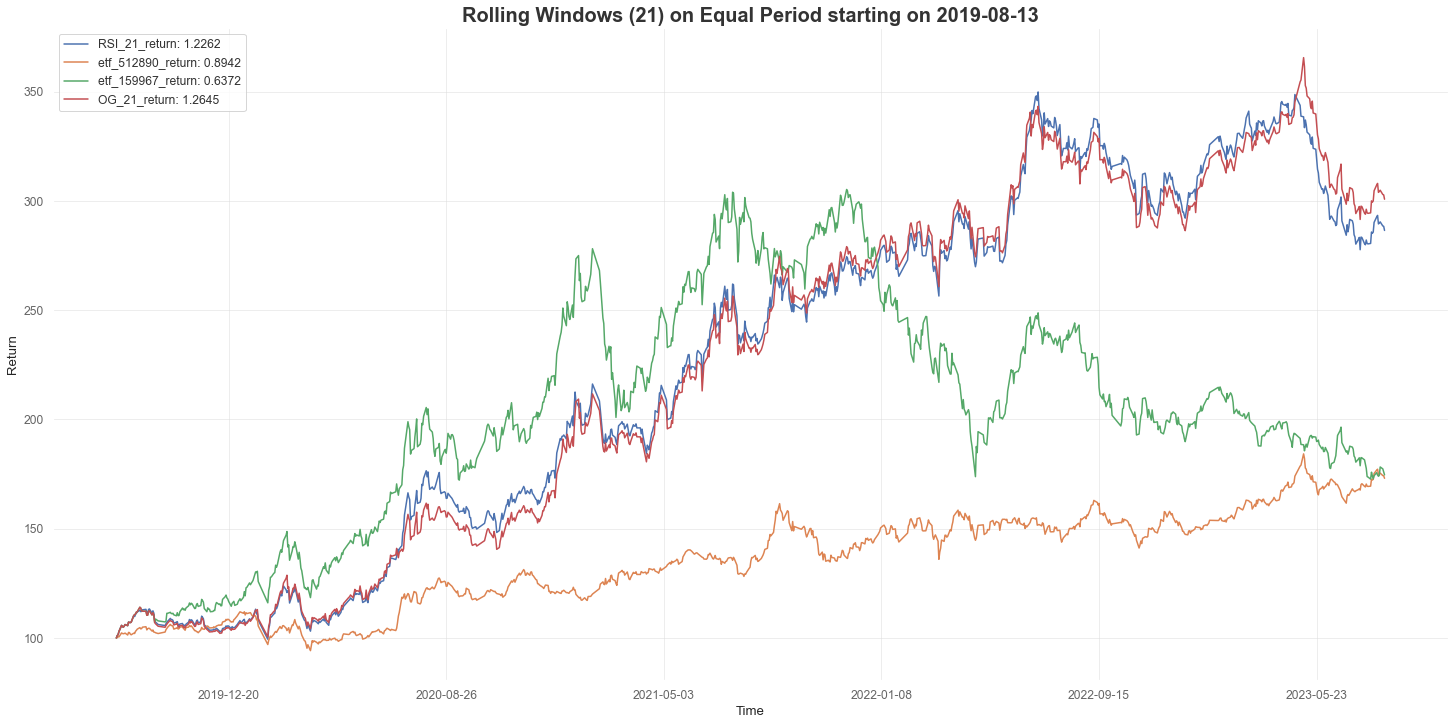

In [2036]:
_ = plt.figure(figsize=(25, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(RSI_df['adj_signal_return_21'].index),RSI_df['adj_signal_return_21'].values)
_ = plt.plot(np.array(RSI_df['etf_512890_return'].index),RSI_df['etf_512890_return'].values)
_ = plt.plot(np.array(RSI_df['etf_159967_return'].index),RSI_df['etf_159967_return'].values)

_ = plt.plot(np.array(OG_df['signal_return_21'].index),OG_df['signal_return_21'].values)



_ = plt.legend([f'RSI_21_return: {round(Sharpe_adj_signal_return_21, 4)}', f'etf_512890_return: {round(Sharpe_etf_512980_return, 4)}',
                f'etf_159967_return: {round(Sharpe_etf_512480_return, 4)}', f'OG_21_return: {round(Sharpe_OG_return, 4)}'])

plt.title('Rolling Windows (21) on Equal Period starting on 2019-08-13', fontsize=20, fontweight='bold')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(250))

In [2037]:
position_num1 = 100
position_num2 = 100
modified_arr_name = 'adjusted_arr'
return_column_name = 'adj_signal_return_21'

df_21_og = position_change_count(RSI_df, position_num1, position_num2, modified_arr_name, return_column_name)

The final return after fees is 286.48% which is 31.45% annually
Additional return: 176.48%
Additional annual return: 27.56%
Max Drawdown: -20.63%
Annualized Volatility: 25.0%
Sharpe: 1.2262
Win Rate: 53.09%



In [2038]:
RSI_df['position_change'].sum()

107.0

In [1960]:
RSI_df.columns

Index(['etf_512890', 'etf_159967', 'etf_512890_day_return',
       'etf_159967_day_return', 'etf_512890_day_return_21',
       'etf_159967_day_return_21', 'signal_512890', 'signal_159967',
       'signal_return_21', 'arr', 'position_change', 'adjusted_arr',
       'adj_signal_return_21', 'etf_512890_return', 'etf_159967_return'],
      dtype='object')

In [2024]:
107/len(RSI_df)*252

27.797938144329898

# Section 4. Adjustment

In [2058]:
list_of_codes = ['510050', '510300', '159915', '159901', '588000', '510500']
window_list = [21]
data = Rolling.get_data(list_of_codes)
data_2016 = data.iloc[2666:,:]

OPT_table = OPT.opt_strat_table(data_2016, window_list, len(list_of_codes))
OG_table = Rolling.single_window_table(data_2016, window_list, len(list_of_codes))

data_2016 = data.iloc[2666:,:]
RSI_OPT_table = OPT.OPT_RSI(data_2016, [21], len(list_of_codes), 70, 40)

data_2016 = data.iloc[2666:,:]
RSI_OPT_table_best = OPT.OPT_RSI(data_2016, [12], len(list_of_codes), 60, 30)

Here at starting from the longest period


In [2059]:
data_2016['etf_510050_return'] = data_2016['etf_510050']*(100/data_2016.loc[:,"etf_510050"][0])
data_2016['etf_510300_return'] = data_2016['etf_510300']*(100/data_2016.loc[:,"etf_510300"][0])
data_2016['etf_159915_return'] = data_2016['etf_159915']*(100/data_2016.loc[:,"etf_159915"][0])
data_2016['etf_159901_return'] = data_2016['etf_159901']*(100/data_2016.loc[:,"etf_159901"][0])
data_2016['etf_510500_return'] = data_2016['etf_510500']*(100/data_2016.loc[:,"etf_510500"][0])
data_2016['etf_588000_return'] = data_2016['etf_588000']*(100/data_2016.loc[:,"etf_588000"][1192])

In [2060]:
result = pd.DataFrame()
result['etf_510050_return'] = data_2016['etf_510050_return'] 
result['etf_510300_return'] = data_2016['etf_510300_return']
result['etf_159915_return'] = data_2016['etf_159915_return']
result['etf_159901_return'] = data_2016['etf_159901_return']
result['etf_510500_return'] = data_2016['etf_510500_return']
result['etf_588000_return'] = data_2016['etf_588000_return'] 
result['OG_Signal (No Sell Short)'] = OG_table["signal_return_21"]
result['New_Signal (Include Sell Short)'] = OPT_table["signal_return_21"]
result['New_Signal (Short + RSI)'] = RSI_OPT_table["signal_return_21"]
result['New_Signal (best)'] = RSI_OPT_table_best["signal_return_12"]

Sharpe_510050 = Test.get_Sharpe(result, 'etf_510050_return')
Sharpe_510300 = Test.get_Sharpe(result, 'etf_510300_return')
Sharpe_159915 = Test.get_Sharpe(result, 'etf_159915_return')
Sharpe_159901 = Test.get_Sharpe(result, 'etf_159901_return')
Sharpe_510500 = Test.get_Sharpe(result, 'etf_510500_return')
Sharpe_588000 = Test.get_Sharpe(result, 'etf_588000_return')
Sharpe_OG = Test.get_Sharpe(result, 'OG_Signal (No Sell Short)')
Sharpe_New = Test.get_Sharpe(result, 'New_Signal (Include Sell Short)')
Sharpe_New_RSI = Test.get_Sharpe(result, 'New_Signal (Short + RSI)')
Sharpe_New_Best = Test.get_Sharpe(result, 'New_Signal (best)')

In [2061]:
New_Sig = round(OPT_table.loc[:,"signal_return_21"][-1],2)
print(f'1. Given The New Signal WITHOUT RSI has a return of {New_Sig}% in 7 years, we can approximately calculate the strategy produces an estimated return of {round(np.power(New_Sig/100,1/7)*100-100,2)}% per year along with a Sharpe of {round(Sharpe_New,3)}\n')

New_Sig_RSI = round(RSI_OPT_table.loc[:,'signal_return_21'][-1],2)
print(f'2. Given The New Signal WITH RSI has a return of {New_Sig_RSI}% in 7 years, we can approximately calculate the strategy produces an estimated return of {round(np.power(New_Sig_RSI/100,1/7)*100-100,2)}% per year along with a Sharpe of {round(Sharpe_New_RSI,3)}\n')

New_Sig_Best = round(RSI_OPT_table_best.loc[:,'signal_return_12'][-1],2)
print(f'2. Given The Best Signal here has a return of {New_Sig_Best}% in 7 years, we can approximately calculate the strategy produces an estimated return of {round(np.power(New_Sig_Best/100,1/7)*100-100,2)}% per year along with a Sharpe of {round(Sharpe_New_Best,3)}')

1. Given The New Signal WITHOUT RSI has a return of 374.11% in 7 years, we can approximately calculate the strategy produces an estimated return of 20.74% per year along with a Sharpe of 1.031

2. Given The New Signal WITH RSI has a return of 291.61% in 7 years, we can approximately calculate the strategy produces an estimated return of 16.52% per year along with a Sharpe of 0.937

2. Given The Best Signal here has a return of 517.29% in 7 years, we can approximately calculate the strategy produces an estimated return of 26.46% per year along with a Sharpe of 1.494


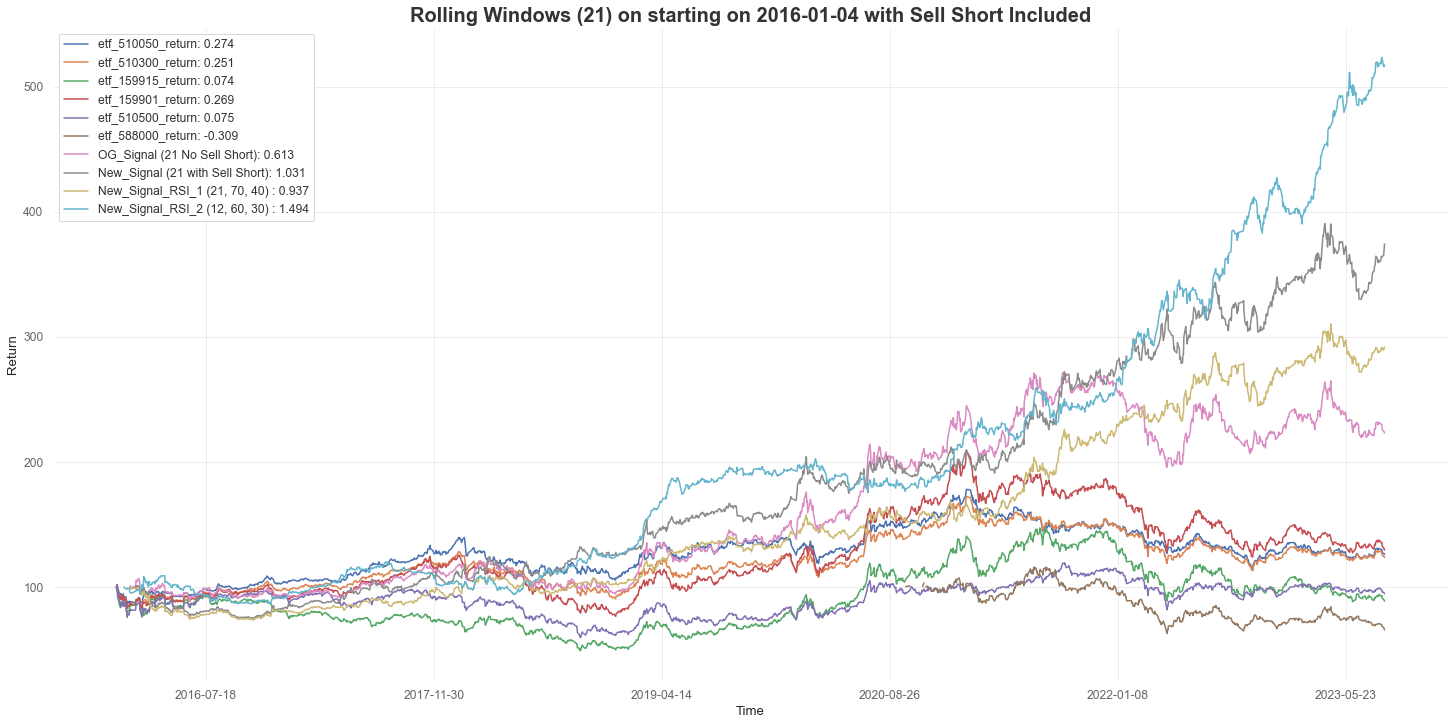

In [2062]:
_ = plt.figure(figsize=(25, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(data_2016['etf_510050_return'].index),data_2016['etf_510050_return'].values)
_ = plt.plot(np.array(data_2016['etf_510300_return'].index),data_2016['etf_510300_return'] .values)
_ = plt.plot(np.array(data_2016['etf_159915_return'].index),data_2016['etf_159915_return'].values)
_ = plt.plot(np.array(data_2016['etf_159901_return'].index),data_2016['etf_159901_return'].values)
_ = plt.plot(np.array(data_2016['etf_510500_return'].index),data_2016['etf_510500_return'].values)
_ = plt.plot(np.array(data_2016['etf_588000_return'].index),data_2016['etf_588000_return'].values)




_ = plt.plot(np.array(OG_table["signal_return_21"].index),OG_table["signal_return_21"].values)
_ = plt.plot(np.array(OPT_table["signal_return_21"].index),OPT_table["signal_return_21"].values)
_ = plt.plot(np.array(RSI_OPT_table["signal_return_21"].index),RSI_OPT_table["signal_return_21"].values)
_ = plt.plot(np.array(RSI_OPT_table_best["signal_return_12"].index),RSI_OPT_table_best["signal_return_12"].values)


_ = plt.legend([f'etf_510050_return: {round(Sharpe_510050, 3)}', f'etf_510300_return: {round(Sharpe_510300, 3)}', 
                f'etf_159915_return: {round(Sharpe_159915, 3)}', f'etf_159901_return: {round(Sharpe_159901, 3)}',
                f'etf_510500_return: {round(Sharpe_510500, 3)}', f'etf_588000_return: {round(Sharpe_588000, 3)}',
                f"OG_Signal (21 No Sell Short): {round(Sharpe_OG, 3)}", f"New_Signal (21 with Sell Short): {round(Sharpe_New, 3)}", 
                f"New_Signal_RSI_1 (21, 70, 40) : {round(Sharpe_New_RSI, 3)}", f"New_Signal_RSI_2 (12, 60, 30) : {round(Sharpe_New_Best, 3)}"]) 


# _ = plt.legend([f'etf_510050_return: {round(Sharpe_510050, 3)}', f'etf_510300_return: {round(Sharpe_510300, 3)}', 
#                 f'etf_159915_return: {round(Sharpe_159915, 3)}', f'etf_159901_return: {round(Sharpe_159901, 3)}',
#                 f'etf_510500_return: {round(Sharpe_510500, 3)}', f'etf_588000_return: {round(Sharpe_588000, 3)}',
#                 f"OG_Signal (21 No Sell Short): {round(Sharpe_OG, 3)}", f"New_Signal (21 with Sell Short): {round(Sharpe_New, 3)}"]) 
                
plt.title('Rolling Windows (21) on starting on 2016-01-04 with Sell Short Included', fontsize=20, fontweight='bold')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(500))

In [2076]:
position_num1 = 100
position_num2 = 100
modified_arr_name = 'arr'
return_column_name = 'signal_return_21'

OPT_test = position_change_count(OPT_table, position_num1, position_num2, modified_arr_name, return_column_name)

The final return after fees is 374.11% which is 19.78% annually
Additional return: 264.11%
Additional annual return: 15.89%
Max Drawdown: -25.74%
Annualized Volatility: 19.0%
Sharpe: 1.0373
Win Rate: 53.47%



In [2077]:
OG_test = position_change_count(OG_table, position_num1, position_num2, modified_arr_name, return_column_name)

The final return after fees is 223.1% which is 11.6% annually
Additional return: 113.1%
Additional annual return: 7.71%
Max Drawdown: -28.11%
Annualized Volatility: 22.0%
Sharpe: 0.6165
Win Rate: 50.92%



In [2053]:
RSI_OPT_table_test = position_change_count(RSI_OPT_table, position_num1, position_num2, modified_arr_name, return_column_name)

This strategy changes 118 positions annually and the total Position change is 863.0
The final return after fees is 27.54% which is -16.17% annually
Additional return: -82.46%
Additional annual return: -20.06%
Max Drawdown: -73.4%
Annualized Volatility: 17.0%
Sharpe: -0.9396
Win Rate: 44.14%



In [2075]:
RSI_OPT_table_best_test = position_change_count(RSI_OPT_table_best, position_num1, position_num2, modified_arr_name, return_column_name)

This strategy changes 178 positions annually and the total Position change is 1313.0
The final return after fees is 17.76% which is -20.97% annually
Additional return: -92.24%
Additional annual return: -24.86%
Max Drawdown: -83.72%
Annualized Volatility: 16.0%
Sharpe: -1.3918
Win Rate: 40.57%



In [2081]:
annual_return = 100*((364.06/100)**(1/(len(OG_table)/252))-1)
annual_return

19.336376966903067